# **Drug Consumption Classification**

## **Dataset Information**
| Feature Name          | Description                                                                                                               |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------|
| `Gender`               | Indicates the gender of the participant.                                                                                  |
| `Education`             | Indicates the level of education of participant.                                                                          |
| `Country`               | Indicates the country of current residence of the participant.                                                            |
| `Ethnicity`             | Indicates the ethnicity of the participant.                                                                               |
| `NScore`                | Indicates the level of Neuroticism. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.                        |
| `EScore`                | Indicates the level of Extraversion. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.                                                           |
| `OScore`                | Indicates the level of Openness to experience. A person with a high level of openness to experience in a personality test enjoys trying new things.      |
| `Ascore`                | Indicates the level of Agreeableness. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.                                       |
| `Cscore`                | Indicates the level of Conscientiousness. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously.                                                                           |
| `Impulsive`             | Indicates the level of impulsiveness.  If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first.                                                                                                                |
| `Sensation`             | Indicates the level of sensation seeking. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations.                                                                                                                                         |            

## **Imports**

In [1]:
import time
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              HistGradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, mean_squared_error)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings("ignore")

## **Data Preprocessing**

In this section, we will load the dataset and perform some basic data preprocessing steps, like checking for missing values and outliers, encoding categorical variables, and splitting the data into training and testing sets. Furthermore, we will perform some exploratory data analysis to understand the data better.
Also, we will perform feature scaling to scale the features to a similar range.

### **Loading the Dataset**

In [3]:
initial_dataset = pd.read_csv('data/drug_consumption.csv')

In [4]:
initial_dataset.head(10)

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
5   6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
6   7  1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207   
7   8  0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886   
8   9  0.49788  0.48246   -0.05921  0.24923   -0.31685  0.62967  2.57309   
9  10  1.82213 -0.48246    1.16365  0.96082   -0.31685 -0.24649  0.00332   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   
5 -1.55521  2.03972  ...      CL0     CL0       CL0    CL0  CL0  CL0   
6 -0.45174 -0.30172  ...      CL0     CL0       CL0    CL0  CL0  CL0   
7 -0.84732 -0.30172  ...      CL0     CL0       CL0    CL0  CL0  CL0   
8 -0.97631  0.76096  ...      CL0     CL0       CL0    CL0  CL0  CL0   
9 -1.42424  0.59042  ...      CL0     CL0       CL0    CL0  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  
5       CL0      CL6   CL0  CL0  
6       CL0      CL6   CL0  CL0  
7       CL0      CL0   CL0  CL0  
8       CL0      CL6   CL0  CL0  
9       CL0      CL6   CL0  CL0  

[10 rows x 32 columns]

In [5]:
initial_dataset.describe()

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity       Nscore       Escore       Oscore       Ascore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.309577     0.000047    -0.000163    -0.000534    -0.000245   
std       0.166226     0.998106     0.997448     0.996229     0.997440   
min      -1.107020    -3.464360    -3.273930    -3.273930    -3.464360   
25%      -0.316850    -0.678250    -0.695090    -0.717270    -0.606330   
50%      -0.316850     0.042570     0.003320    -0.019280    -0.017290   
75%      -0.316850     0.629670     0.637790     0.723300     0.760960   
max       1.907250     3.273930     3.273930     2.901610     3.464360   

            Cscore    Impulsive           SS  
count  1885.000000  1885.000000  1885.000000  
mean     -0.000386     0.007216    -0.003292  
std       0.997523     0.954435     0.963701  
min      -3.464360    -2.555240    -2.078480  
25%      -0.652530    -0.711260    -0.525930  
50%      -0.006650    -0.217120     0.079870  
75%       0.584890     0.529750     0.765400  
max       3.464360     2.901610     1.921730

### **Checking for Missing Values**

As we can see below, there are no missing values in the dataset.

In [6]:
initial_dataset = initial_dataset.dropna()
initial_dataset.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### **Checking for Outliers**

Our dataset contains a column with a ficticious drug name called `Semer`. This is used to detect outliers in the dataset. We will remove every row that does not contain the value `CL0` in the Semer column. After that, we will remove the Semer column from the dataset.

In [7]:
initial_dataset = initial_dataset[initial_dataset['Semer'] == 'CL0']
initial_dataset = initial_dataset.drop('Semer', axis=1)

### **Delete Meaningless Columns**

The `ID` column is meaningless and does not provide any useful information for our analysis. Therefore, we will remove it from the dataset.

In [8]:
initial_dataset = initial_dataset.drop('ID', axis=1)

In [9]:
replacer = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6,
}

dataset = initial_dataset.replace(replacer)
dataset[['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']].astype('category')

Alcohol Amphet Amyl Benzos Caff Cannabis Choc Coke Crack Ecstasy Heroin  \
0          5      2    0      2    6        0    5    0     0       0      0   
1          5      2    2      0    6        4    6    3     0       4      0   
2          6      0    0      0    6        3    4    0     0       0      0   
3          4      0    0      3    5        2    4    2     0       0      0   
4          4      1    1      0    6        3    6    0     0       1      0   
...      ...    ...  ...    ...  ...      ...  ...  ...   ...     ...    ...   
1880       5      0    0      0    4        5    4    0     0       0      0   
1881       5      0    0      0    5        3    4    0     0       2      0   
1882       4      6    5      5    6        6    6    4     0       4      0   
1883       5      0    0      0    6        6    5    0     0       3      0   
1884       4      3    0      3    6        3    6    3     0       3      0   

     Ketamine Legalh LSD Meth Mushrooms Nicotine VSA  
0           0      0   0    0         0        2   0  
1           2      0   2    3         0        4   0  
2           0      0   0    0         1        0   0  
3           2      0   0    0         0        2   0  
4           0      1   0    0         2        2   0  
...       ...    ...  ..  ...       ...      ...  ..  
1880        0      3   3    0         0        0   5  
1881        0      3   5    4         4        5   0  
1882        2      0   2    0         2        6   0  
1883        0      3   3    0         3        4   0  
1884        0      3   3    0         3        6   2  

[1877 rows x 18 columns]

In [10]:
initial_dataset.head(5)

Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    Ascore   Cscore  ...  Crack  Ecstasy Heroin Ketamine Legalh  LSD Meth  \
0 -0.91699 -0.00665  ...    CL0      CL0    CL0      CL0    CL0  CL0  CL0   
1  0.76096 -0.14277  ...    CL0      CL4    CL0      CL2    CL0  CL2  CL3   
2 -1.62090 -1.01450  ...    CL0      CL0    CL0      CL0    CL0  CL0  CL0   
3  0.59042  0.58489  ...    CL0      CL0    CL0      CL2    CL0  CL0  CL0   
4 -0.30172  1.30612  ...    CL0      CL1    CL0      CL0    CL1  CL0  CL0   

  Mushrooms Nicotine  VSA  
0       CL0      CL2  CL0  
1       CL0      CL4  CL0  
2       CL1      CL0  CL0  
3       CL0      CL2  CL0  
4       CL2      CL2  CL0  

[5 rows x 30 columns]

<Axes: >

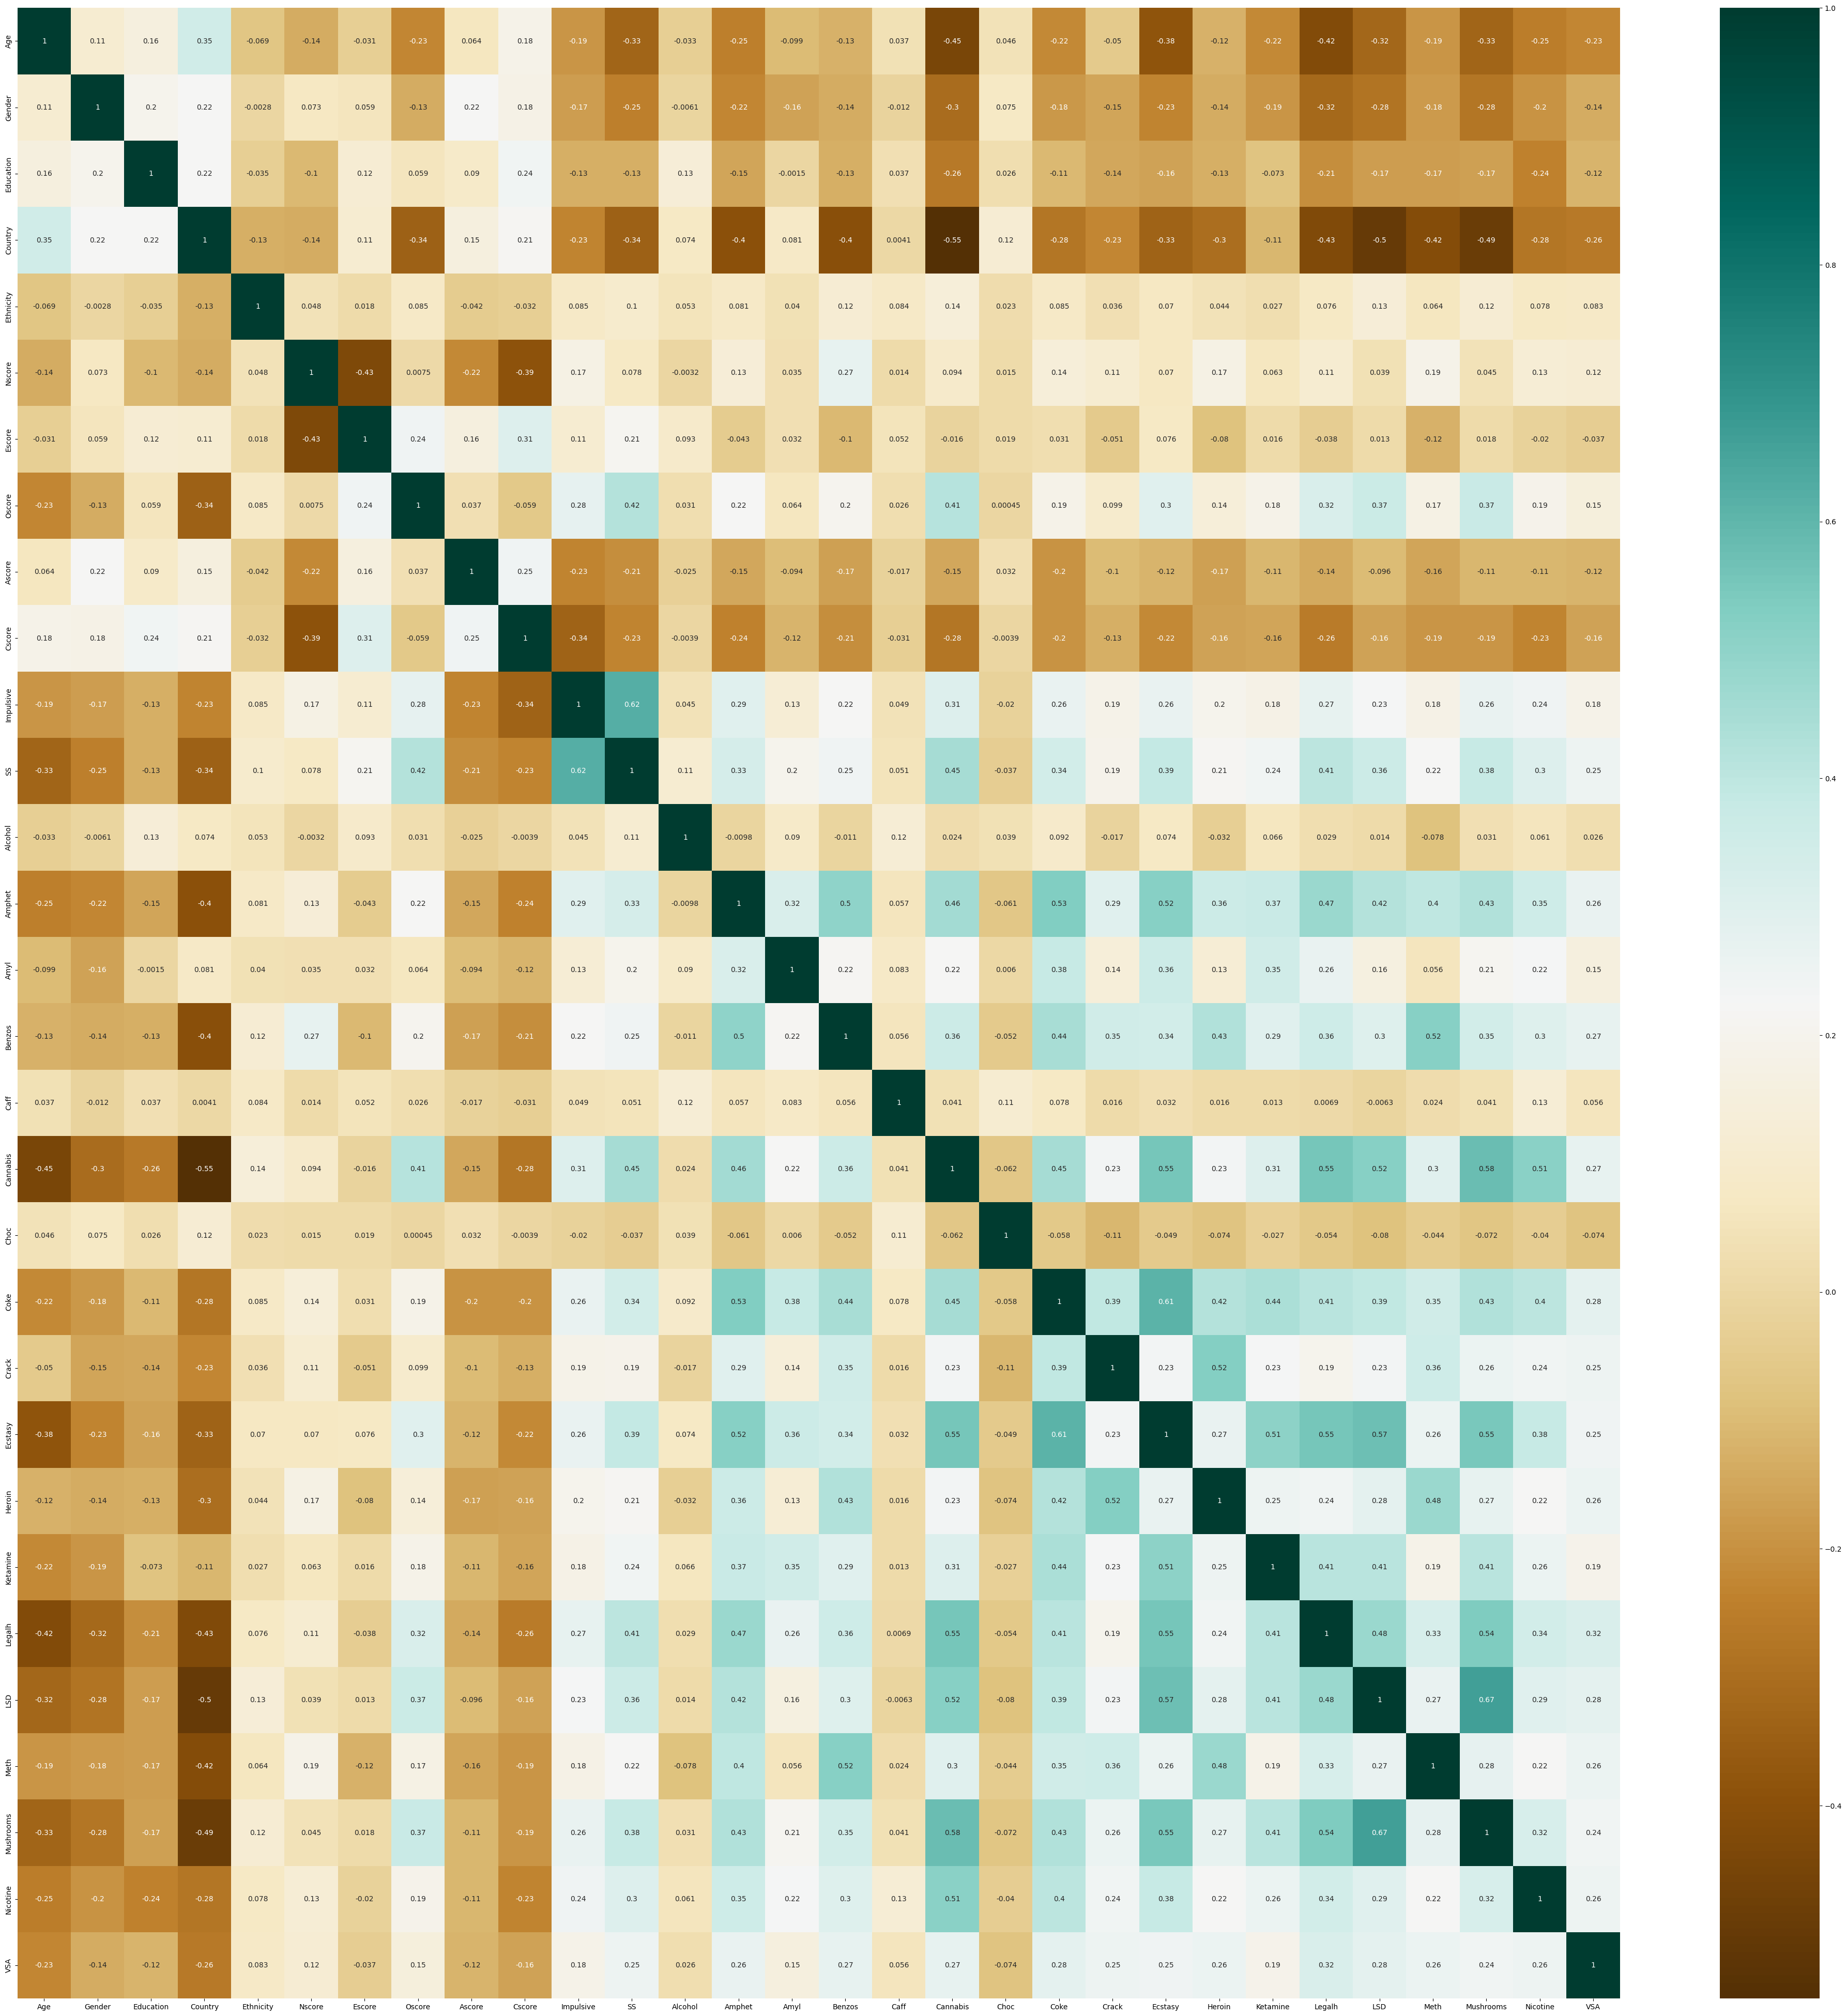

In [11]:
plt.figure(figsize=(50, 50))
sns.heatmap(dataset.corr(), annot = True, cmap = 'BrBG')

### **Replacing the float values with the actual values**

The dataset contains normalized values for the features. We will replace these normalized values with the actual values to make the data more interpretable and, also to perform our own normalization later.

In [12]:
age_col = {
    -0.95197: '18-24',
    -0.07854: '25 - 34',
    0.49788: '35 - 44',
    1.09449: '45 - 54',
    1.82213: '55 - 64',
    2.59171: '65+'
}
dataset['Age'] = dataset['Age'].replace(age_col)
dataset['Age'].astype('category')

gender_col = {
    0.48246: 'Female',
    -0.48246: 'Male'
}
dataset['Gender'] = dataset['Gender'].replace(gender_col)

education_col = {
    -2.43591: 'Left School Before 16 years',
    -1.73790: 'Left School at 16 years',
    -1.43719: 'Left School at 17 years',
    -1.22751: 'Left School at 18 years',
    -0.61113: 'Some College,No Certificate Or Degree',
    -0.05921: 'Professional Certificate/ Diploma',
    0.45468: 'University Degree',
    1.16365: 'Masters Degree',
    1.98437: 'Doctorate Degree',
}
dataset['Education'] = dataset['Education'].replace(education_col)
dataset['Education'].astype('category')

country_col = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}
dataset['Country'] = dataset['Country'].replace(country_col)
dataset['Country'].astype('category')

ethnicity_col = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

dataset['Ethnicity'] = dataset['Ethnicity'].replace(ethnicity_col)
dataset['Ethnicity'].astype('category')



0       Mixed-White/Asian
1                   White
2                   White
3                   White
4                   White
              ...        
1880                White
1881                White
1882                White
1883                White
1884                White
Name: Ethnicity, Length: 1877, dtype: category
Categories (7, object): ['Asian', 'Black', 'Mixed-Black/Asian', 'Mixed-White/Asian', 'Mixed-White/Black', 'Other', 'White']

In [13]:
dataset.head(10)

Age  Gender                          Education Country  \
0  35 - 44  Female  Professional Certificate/ Diploma      UK   
1  25 - 34    Male                   Doctorate Degree      UK   
2  35 - 44    Male  Professional Certificate/ Diploma      UK   
3    18-24  Female                     Masters Degree      UK   
4  35 - 44  Female                   Doctorate Degree      UK   
5      65+  Female            Left School at 18 years  Canada   
6  45 - 54    Male                     Masters Degree     USA   
7  35 - 44    Male            Left School at 16 years      UK   
8  35 - 44  Female  Professional Certificate/ Diploma  Canada   
9  55 - 64    Male                     Masters Degree      UK   

           Ethnicity   Nscore   Escore   Oscore   Ascore   Cscore  ...  Crack  \
0  Mixed-White/Asian  0.31287 -0.57545 -0.58331 -0.91699 -0.00665  ...      0   
1              White -0.67825  1.93886  1.43533  0.76096 -0.14277  ...      0   
2              White -0.46725  0.80523 -0.84732 -1.62090 -1.01450  ...      0   
3              White -0.14882 -0.80615 -0.01928  0.59042  0.58489  ...      0   
4              White  0.73545 -1.63340 -0.45174 -0.30172  1.30612  ...      0   
5              White -0.67825 -0.30033 -1.55521  2.03972  1.63088  ...      0   
6              White -0.46725 -1.09207 -0.45174 -0.30172  0.93949  ...      0   
7              White -1.32828  1.93886 -0.84732 -0.30172  1.63088  ...      0   
8              White  0.62967  2.57309 -0.97631  0.76096  1.13407  ...      0   
9              White -0.24649  0.00332 -1.42424  0.59042  0.12331  ...      0   

   Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  Nicotine  VSA  
0        0       0         0       0    0     0          0         2    0  
1        4       0         2       0    2     3          0         4    0  
2        0       0         0       0    0     0          1         0    0  
3        0       0         2       0    0     0          0         2    0  
4        1       0         0       1    0     0          2         2    0  
5        0       0         0       0    0     0          0         6    0  
6        0       0         0       0    0     0          0         6    0  
7        0       0         0       0    0     0          0         0    0  
8        0       0         0       0    0     0          0         6    0  
9        0       0         0       0    0     0          0         6    0  

[10 rows x 30 columns]

### **Encoding Categorical Variables**

Most machine learning algorithms require numerical input data, so we need to encode the categorical variables in our dataset. We will encode the categorical variables in the dataset using one-hot encoding.

In [14]:
nominal_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(dataset[nominal_columns])
encoded_nominal_columns = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns))

Now that we have encoded the categorical variables, we can replace the original columns with the encoded ones.

In [15]:
dataset = dataset.drop(nominal_columns, axis=1)
dataset = pd.concat([encoded_nominal_columns, dataset], axis=1)

In [16]:
dataset.head(10)

Age_18-24  Age_25 - 34  Age_35 - 44  Age_45 - 54  Age_55 - 64  Age_65+  \
0        0.0          0.0          1.0          0.0          0.0      0.0   
1        0.0          1.0          0.0          0.0          0.0      0.0   
2        0.0          0.0          1.0          0.0          0.0      0.0   
3        1.0          0.0          0.0          0.0          0.0      0.0   
4        0.0          0.0          1.0          0.0          0.0      0.0   
5        0.0          0.0          0.0          0.0          0.0      1.0   
6        0.0          0.0          0.0          1.0          0.0      0.0   
7        0.0          0.0          1.0          0.0          0.0      0.0   
8        0.0          0.0          1.0          0.0          0.0      0.0   
9        0.0          0.0          0.0          0.0          1.0      0.0   

   Gender_Female  Gender_Male  Education_Doctorate Degree  \
0            1.0          0.0                         0.0   
1            0.0          1.0                         1.0   
2            0.0          1.0                         0.0   
3            1.0          0.0                         0.0   
4            1.0          0.0                         1.0   
5            1.0          0.0                         0.0   
6            0.0          1.0                         0.0   
7            0.0          1.0                         0.0   
8            1.0          0.0                         0.0   
9            0.0          1.0                         0.0   

   Education_Left School Before 16 years  ...  Crack  Ecstasy  Heroin  \
0                                    0.0  ...    0.0      0.0     0.0   
1                                    0.0  ...    0.0      4.0     0.0   
2                                    0.0  ...    0.0      0.0     0.0   
3                                    0.0  ...    0.0      0.0     0.0   
4                                    0.0  ...    0.0      1.0     0.0   
5                                    0.0  ...    0.0      0.0     0.0   
6                                    0.0  ...    0.0      0.0     0.0   
7                                    0.0  ...    0.0      0.0     0.0   
8                                    0.0  ...    0.0      0.0     0.0   
9                                    0.0  ...    0.0      0.0     0.0   

   Ketamine  Legalh  LSD  Meth  Mushrooms  Nicotine  VSA  
0       0.0     0.0  0.0   0.0        0.0       2.0  0.0  
1       2.0     0.0  2.0   3.0        0.0       4.0  0.0  
2       0.0     0.0  0.0   0.0        1.0       0.0  0.0  
3       2.0     0.0  0.0   0.0        0.0       2.0  0.0  
4       0.0     1.0  0.0   0.0        2.0       2.0  0.0  
5       0.0     0.0  0.0   0.0        0.0       6.0  0.0  
6       0.0     0.0  0.0   0.0        0.0       6.0  0.0  
7       0.0     0.0  0.0   0.0        0.0       0.0  0.0  
8       0.0     0.0  0.0   0.0        0.0       6.0  0.0  
9       0.0     0.0  0.0   0.0        0.0       6.0  0.0  

[10 rows x 56 columns]

### **Remove Columns with Opposite Meaning**

In [17]:
dataset = dataset.drop('Gender_Male', axis=1)

In [18]:
dataset.describe()

Age_18-24  Age_25 - 34  Age_35 - 44  Age_45 - 54  Age_55 - 64  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean      0.339371     0.255727     0.189132     0.156633     0.049547   
std       0.473622     0.436385     0.391717     0.363551     0.217065   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Age_65+  Gender_Female  Education_Doctorate Degree  \
count  1877.000000    1877.000000                 1877.000000   
mean      0.009590       0.499201                    0.047416   
std       0.097483       0.500133                    0.212584   
min       0.000000       0.000000                    0.000000   
25%       0.000000       0.000000                    0.000000   
50%       0.000000       0.000000                    0.000000   
75%       0.000000       1.000000                    0.000000   
max       1.000000       1.000000                    1.000000   

       Education_Left School Before 16 years  \
count                            1877.000000   
mean                                0.014917   
std                                 0.121255   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Education_Left School at 16 years  ...        Crack      Ecstasy  \
count                        1877.000000  ...  1877.000000  1877.000000   
mean                            0.052211  ...     0.295685     1.309536   
std                             0.222511  ...     0.835925     1.647373   
min                             0.000000  ...     0.000000     0.000000   
25%                             0.000000  ...     0.000000     0.000000   
50%                             0.000000  ...     0.000000     0.000000   
75%                             0.000000  ...     0.000000     3.000000   
max                             1.000000  ...     6.000000     6.000000   

            Heroin     Ketamine       Legalh          LSD         Meth  \
count  1877.000000  1877.000000  1877.000000  1877.000000  1877.000000   
mean      0.372403     0.564198     1.353223     1.053277     0.826319   
std       1.034761     1.216341     1.790881     1.484582     1.648379   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     3.000000     2.000000     0.000000   
max       6.000000     6.000000     6.000000     6.000000     6.000000   

         Mushrooms     Nicotine          VSA  
count  1877.000000  1877.000000  1877.000000  
mean      1.177944     3.194992     0.429409  
std       1.459212     2.415814     0.959160  
min       0.000000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.000000     3.000000     0.000000  
75%       2.000000     6.000000     0.000000  
max       6.000000     6.000000     6.000000  

[8 rows x 55 columns]

## **Prediction Algorithms**

In this section, we will train different machine learning models on the dataset and evaluate their performance. 
We will use the following algorithms:
* Logistic Regression
* Random Forest
* Support Vector Machine (SVM)
* Decision Tree
* K-Nearest Neighbors (KNN)
* Naive Bayes
* Gradient Boosting
* Hierarchical Gradient Boosting
* XGBoost
* CatBoost
* AdaBoost


In [19]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Hierarchical Gradient Boosting': HistGradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost' : CatBoostClassifier(verbose=0),
    'AdaBoost' : AdaBoostClassifier(),
}

#### **Define some helper functions**

In [20]:
model_accuracy = {}

model_execution_time = {}

def run_evals(dataset, target, models=models):
    print(f"-------------------------------------------------------------------- {target} --------------------------------------------------------------------\n\n")
    
    global model_accuracy, model_mse
    dataset.dropna(inplace=True)
    
    Y = dataset[target]
    X = dataset.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        print(f'Evaluating {model_name}')
        
        start_time = time.time()
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        execution_time = time.time() - start_time
        
        _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')
        ax1.set_title(f'Confusion Matrix - {model_name}')
        
        report = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        
        report_df['precision'].plot(kind='bar', color=colors, ax=ax2)
        ax2.set_title(f'Precision Score - {model_name}')
        ax2.set_xlabel('Class')
        ax2.set_ylabel('Score')
        
        plt.tight_layout()
        plt.show()
            
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')
        
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Execution Time: {execution_time:.2f} seconds\n\n")
        
        model_accuracy[model_name] = accuracy
        model_execution_time[model_name] = execution_time

#### **Training and Testing the Models**

Now that we have preprocessed the data, we can train the models on the dataset. We will train the models using the training set and evaluate their performance using the testing set. We will use the 'Mushrooms' column as the target variable and the rest of the columns as features. Later, we will compare the performance of the models to select the best one.

In [21]:
target_columns = ['Cannabis', 'LSD', 'Mushrooms']

-------------------------------------------------------------------- Cannabis --------------------------------------------------------------------


Evaluating Logistic Regression


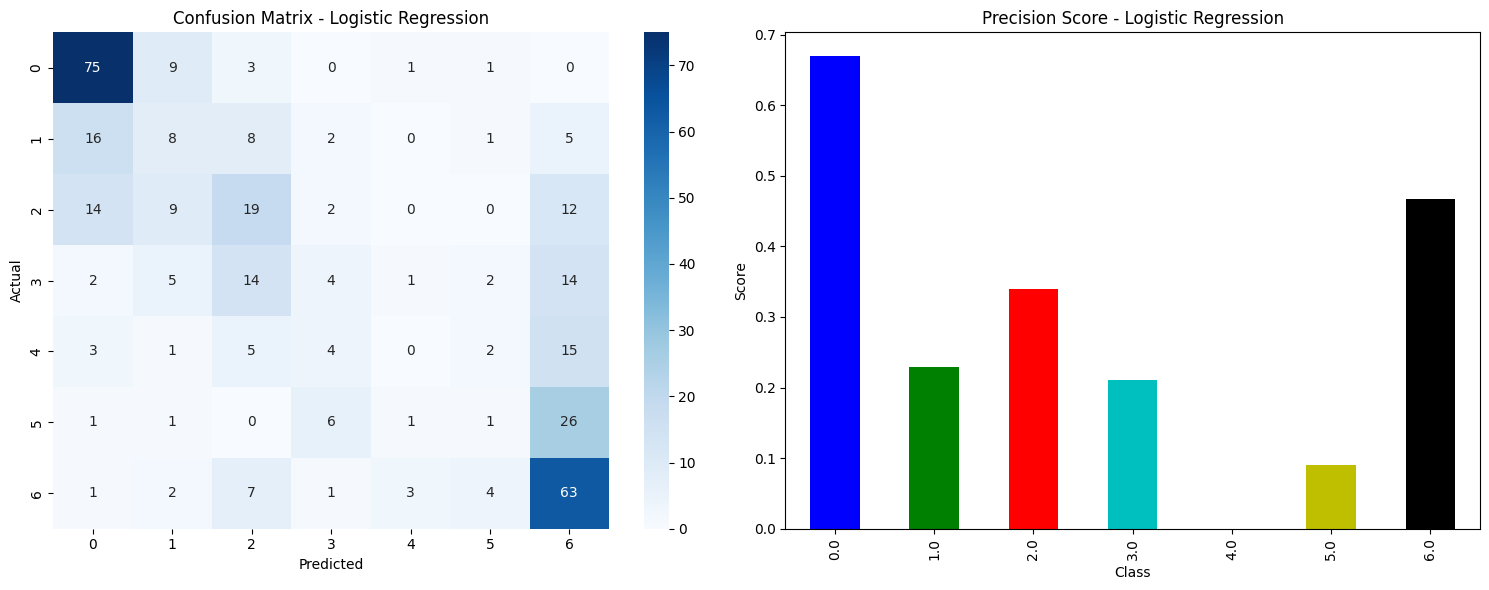

Accuracy: 0.45
Mean Squared Error (MSE): 3.05
Execution Time: 0.40 seconds


Evaluating Random Forest


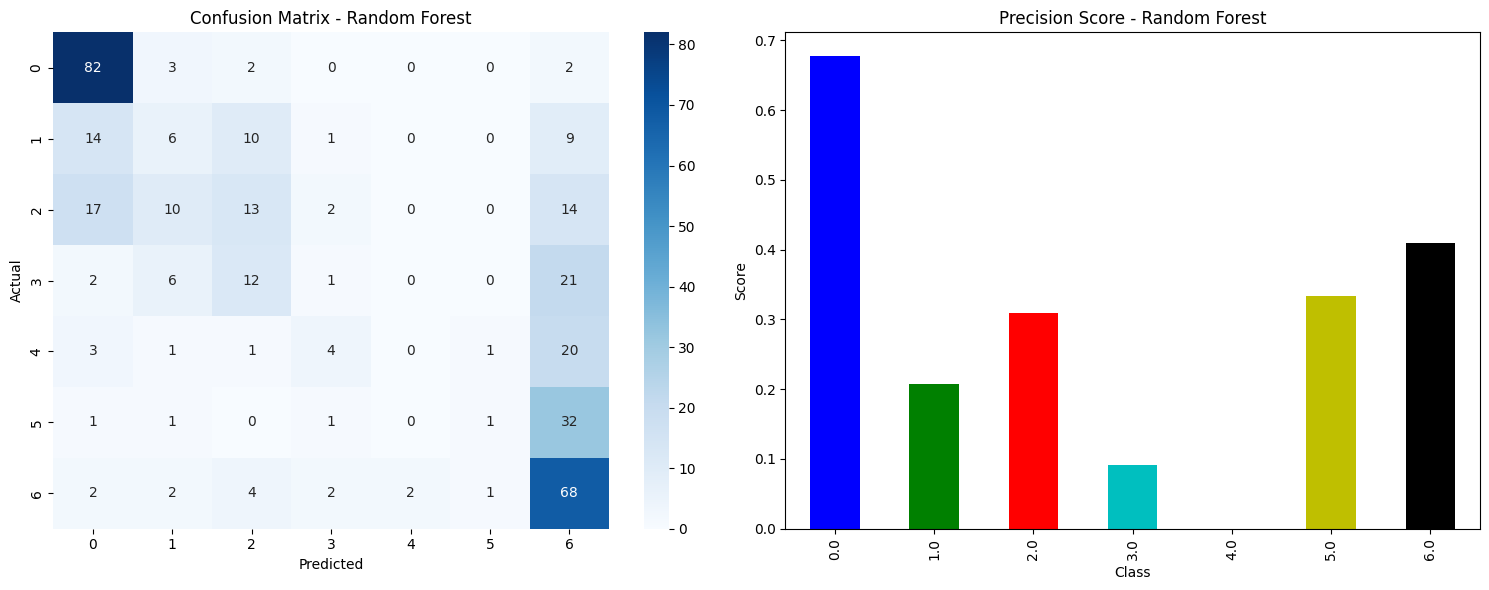

Accuracy: 0.46
Mean Squared Error (MSE): 3.53
Execution Time: 0.43 seconds


Evaluating SVM


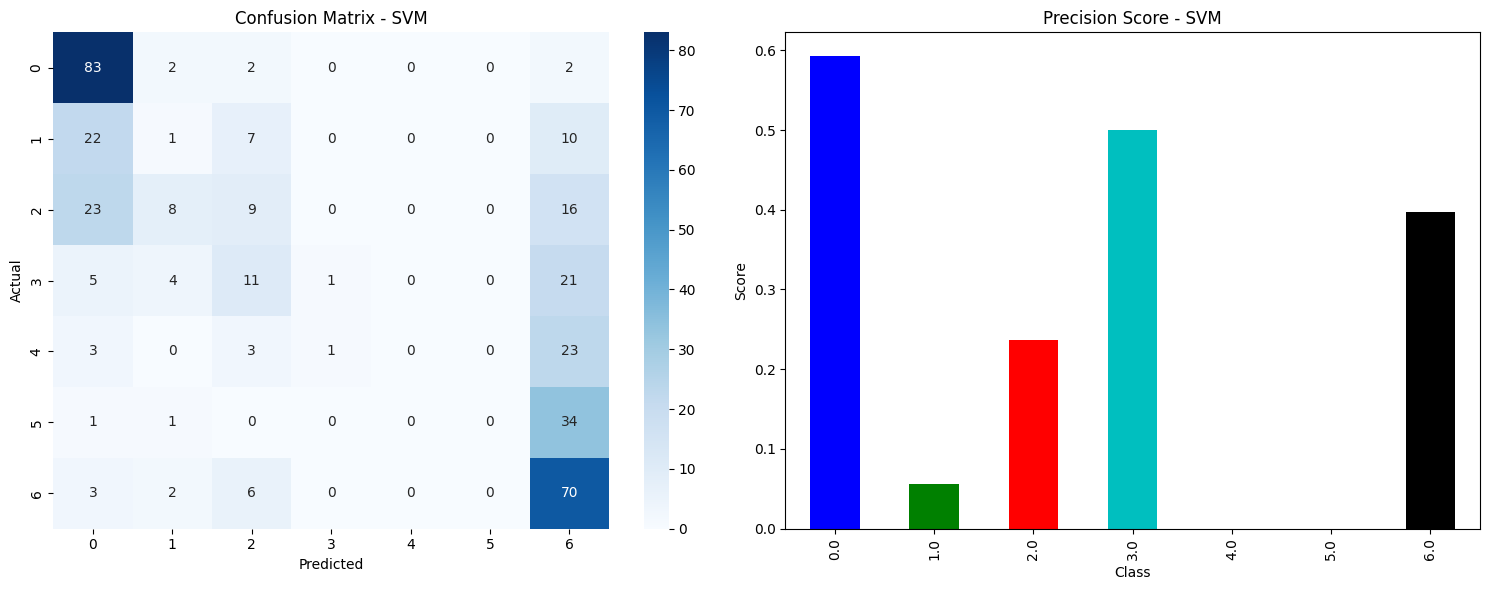

Accuracy: 0.44
Mean Squared Error (MSE): 3.90
Execution Time: 0.27 seconds


Evaluating Decision Tree


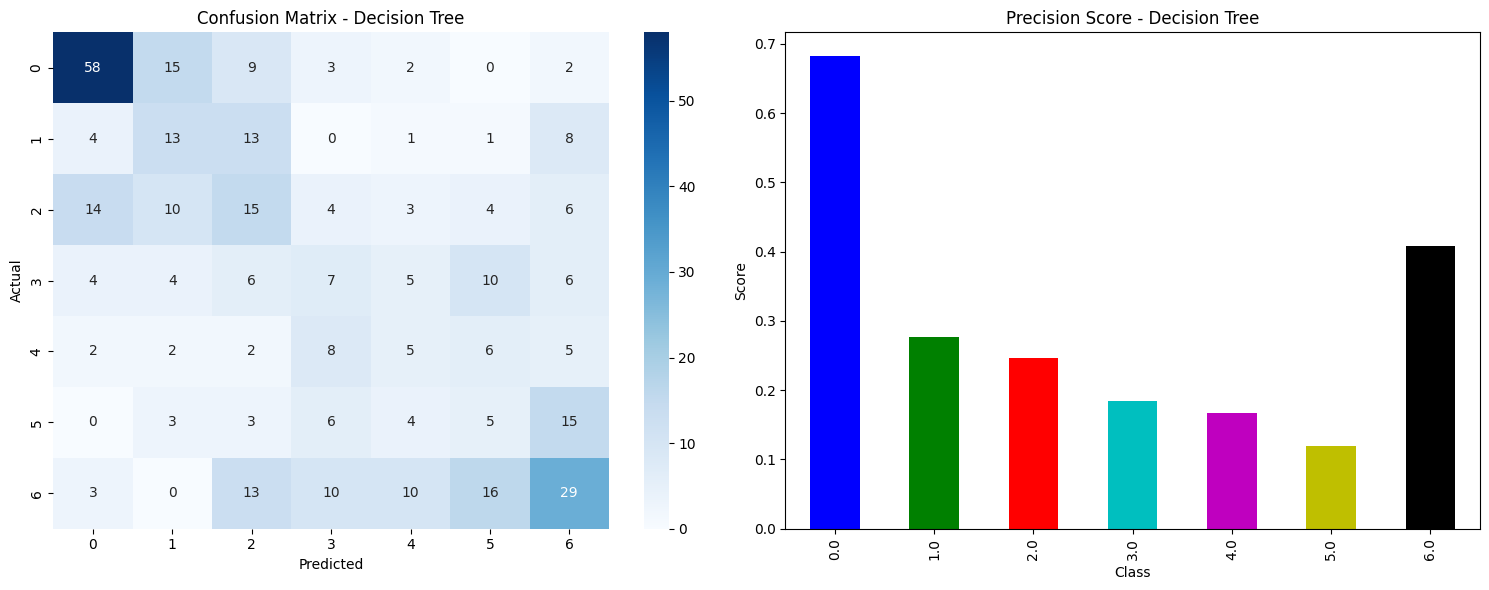

Accuracy: 0.35
Mean Squared Error (MSE): 3.92
Execution Time: 0.03 seconds


Evaluating KNN


Accuracy: 0.37
Mean Squared Error (MSE): 3.60
Execution Time: 0.12 seconds


Evaluating Naive Bayes


Accuracy: 0.25
Mean Squared Error (MSE): 3.63
Execution Time: 0.02 seconds


Evaluating Gradient Boosting


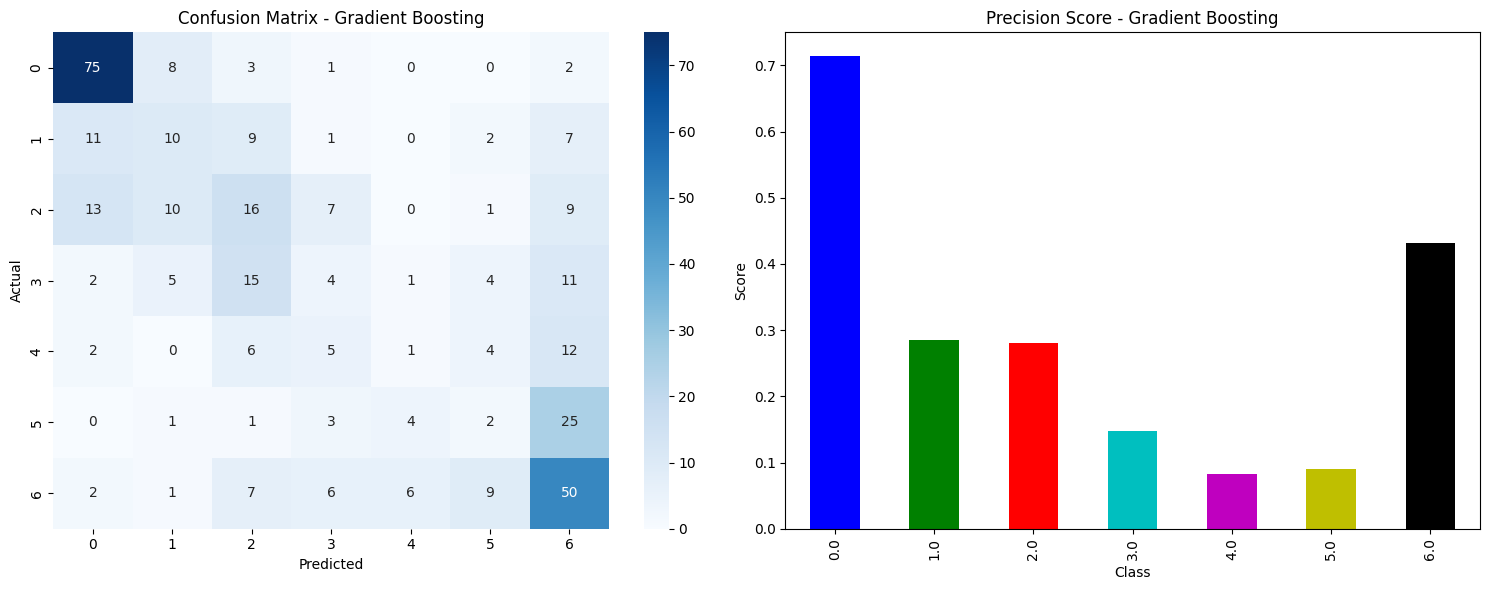

Accuracy: 0.42
Mean Squared Error (MSE): 3.20
Execution Time: 3.44 seconds


Evaluating Hierarchical Gradient Boosting


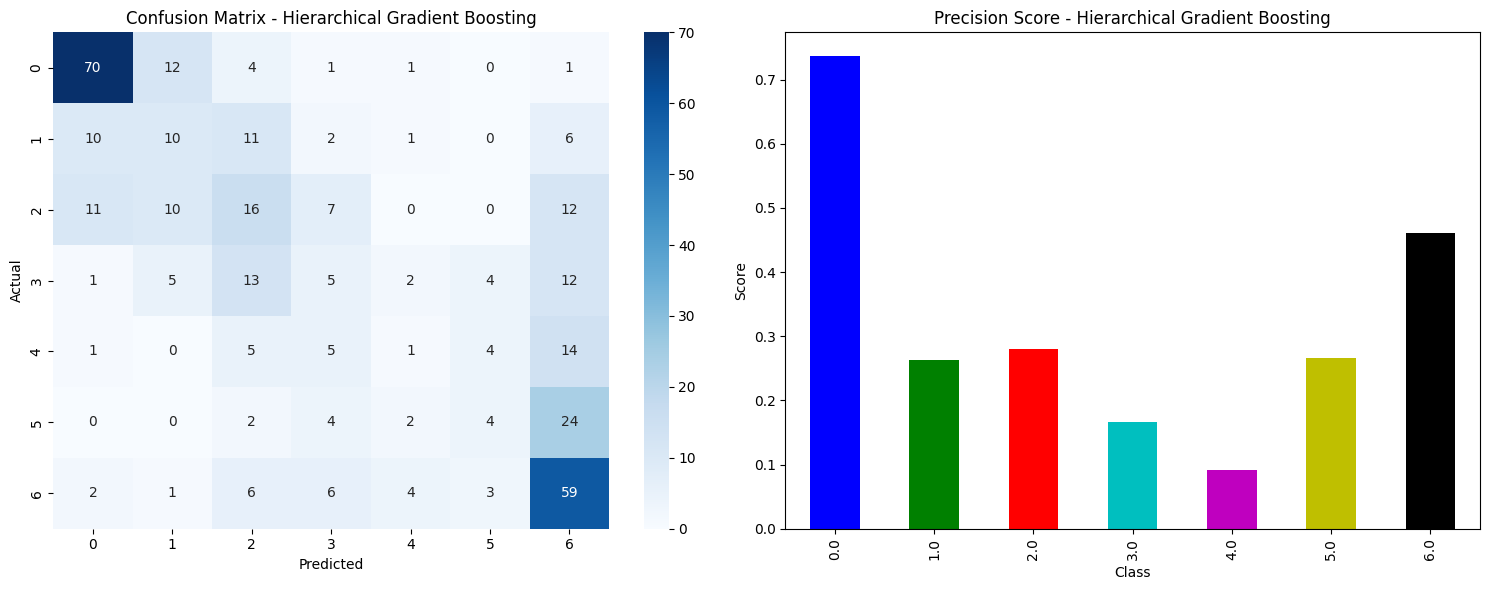

Accuracy: 0.44
Mean Squared Error (MSE): 3.01
Execution Time: 2.86 seconds


Evaluating XGBoost


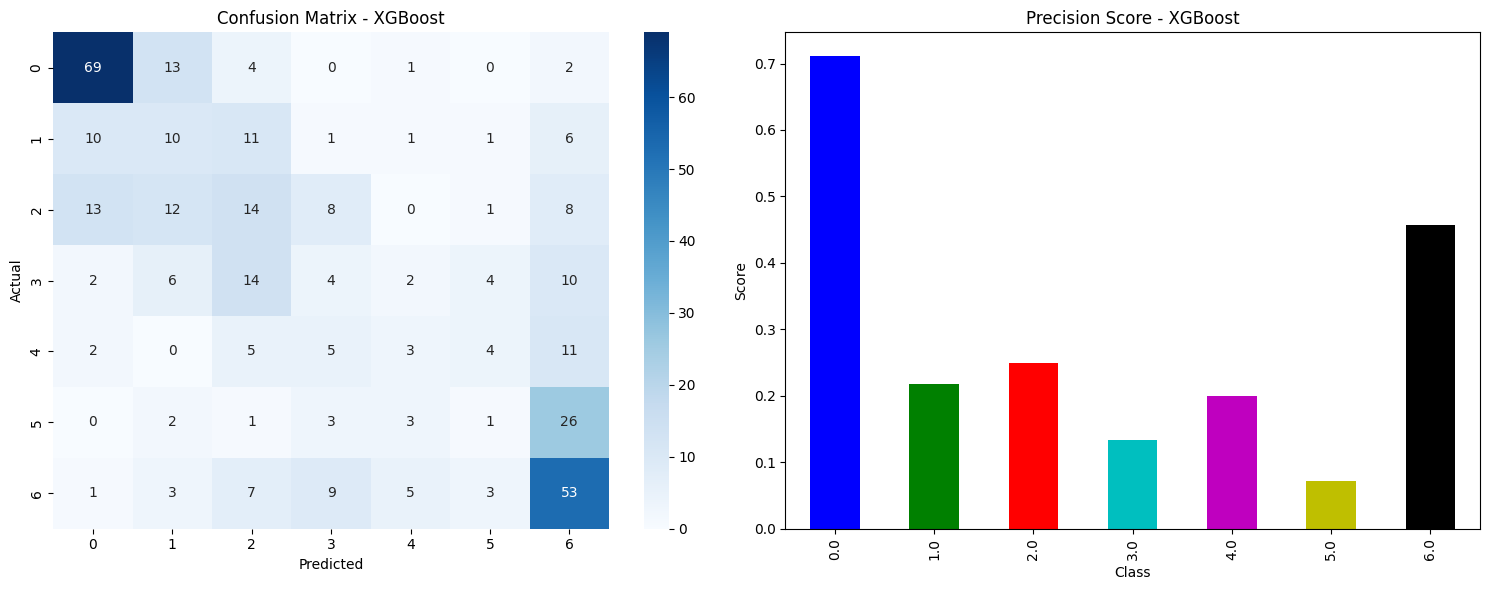

Accuracy: 0.41
Mean Squared Error (MSE): 3.22
Execution Time: 0.80 seconds


Evaluating CatBoost


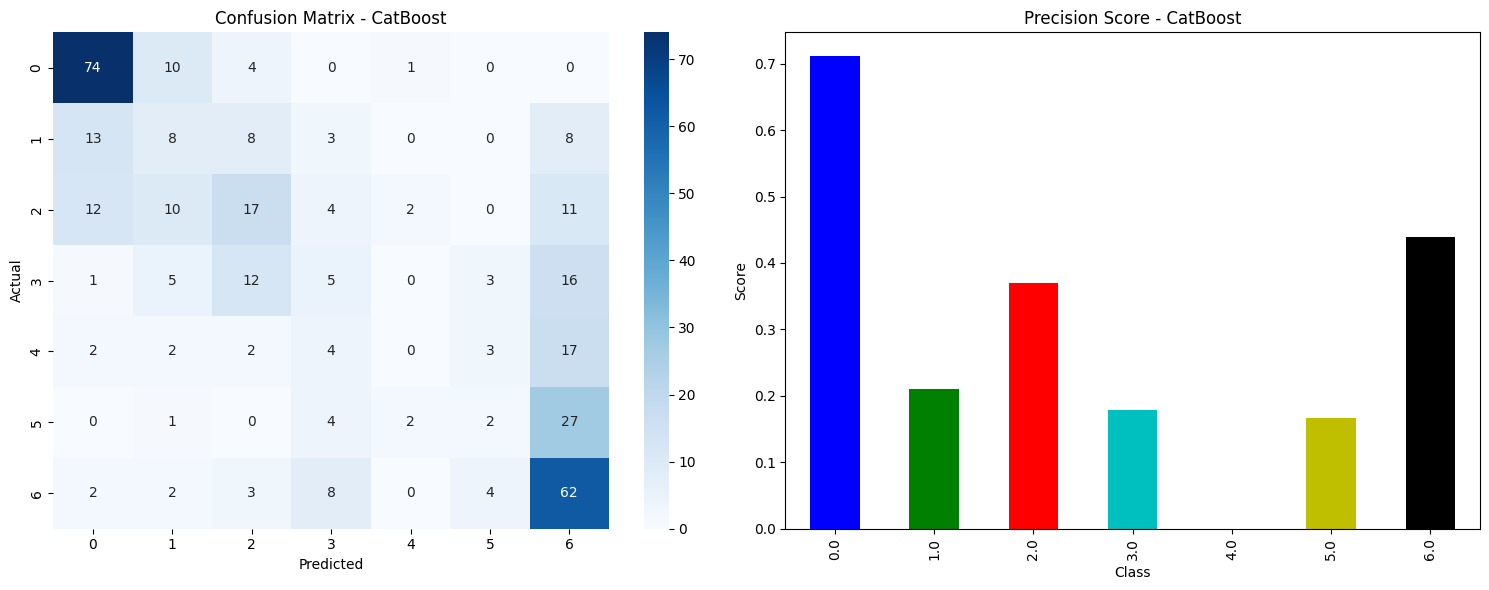

Accuracy: 0.45
Mean Squared Error (MSE): 3.10
Execution Time: 4.18 seconds


Evaluating AdaBoost


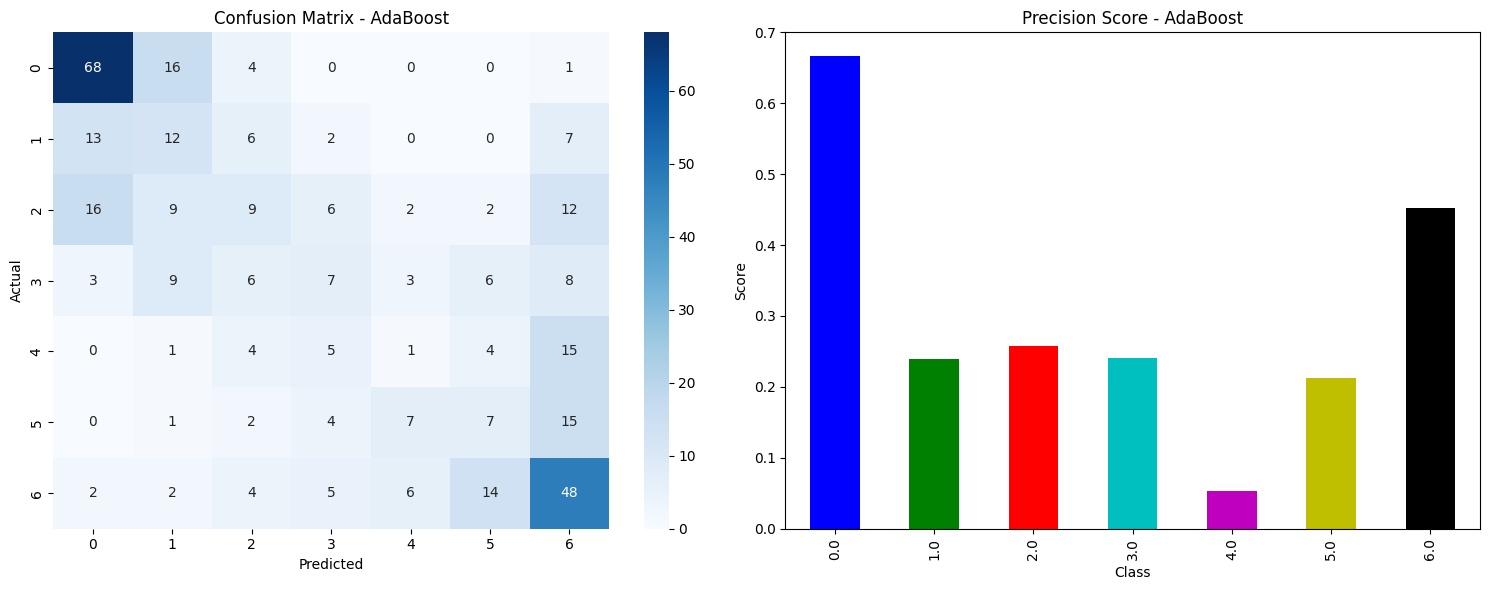

Accuracy: 0.41
Mean Squared Error (MSE): 3.13
Execution Time: 0.20 seconds


-------------------------------------------------------------------- LSD --------------------------------------------------------------------


Evaluating Logistic Regression


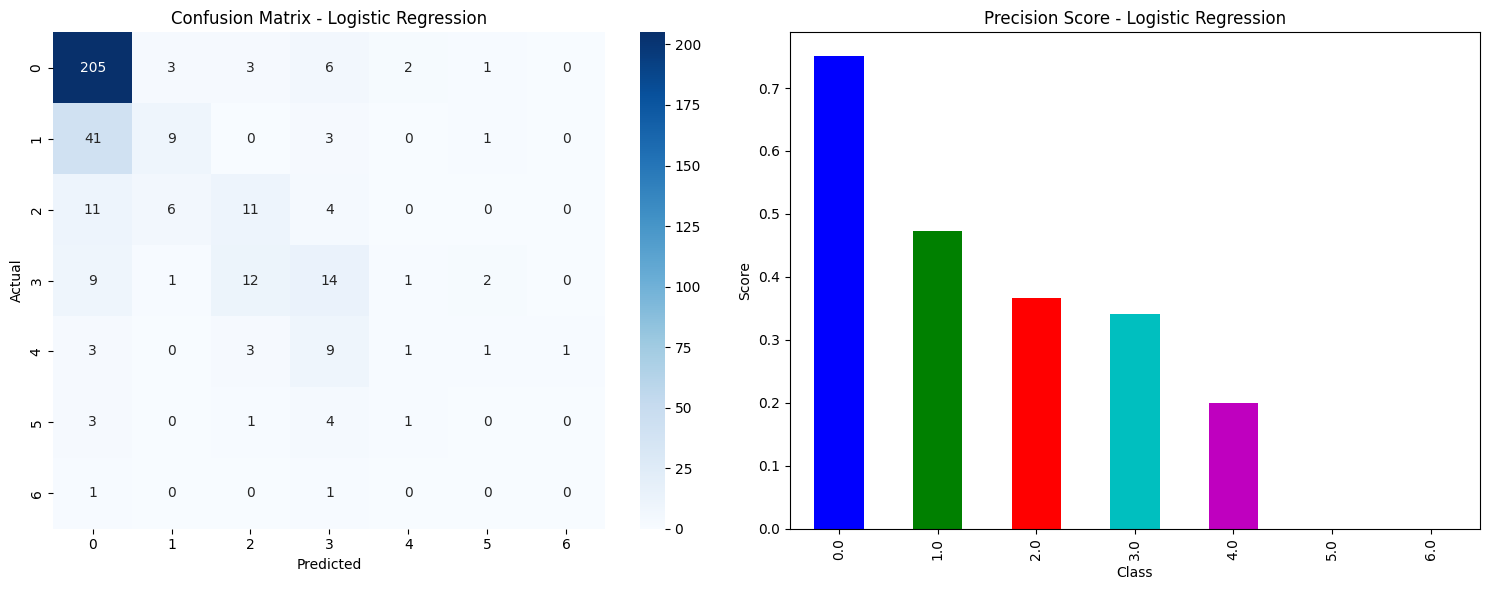

Accuracy: 0.64
Mean Squared Error (MSE): 1.54
Execution Time: 0.81 seconds


Evaluating Random Forest


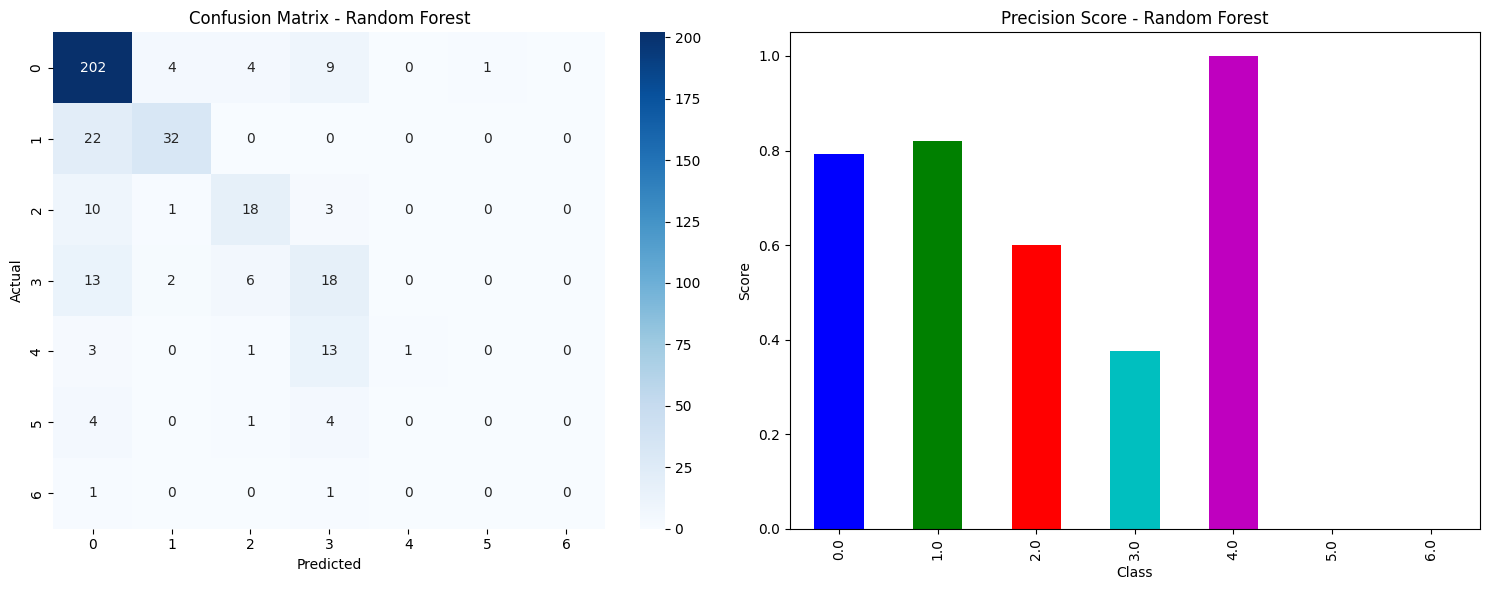

Accuracy: 0.72
Mean Squared Error (MSE): 1.49
Execution Time: 0.68 seconds


Evaluating SVM


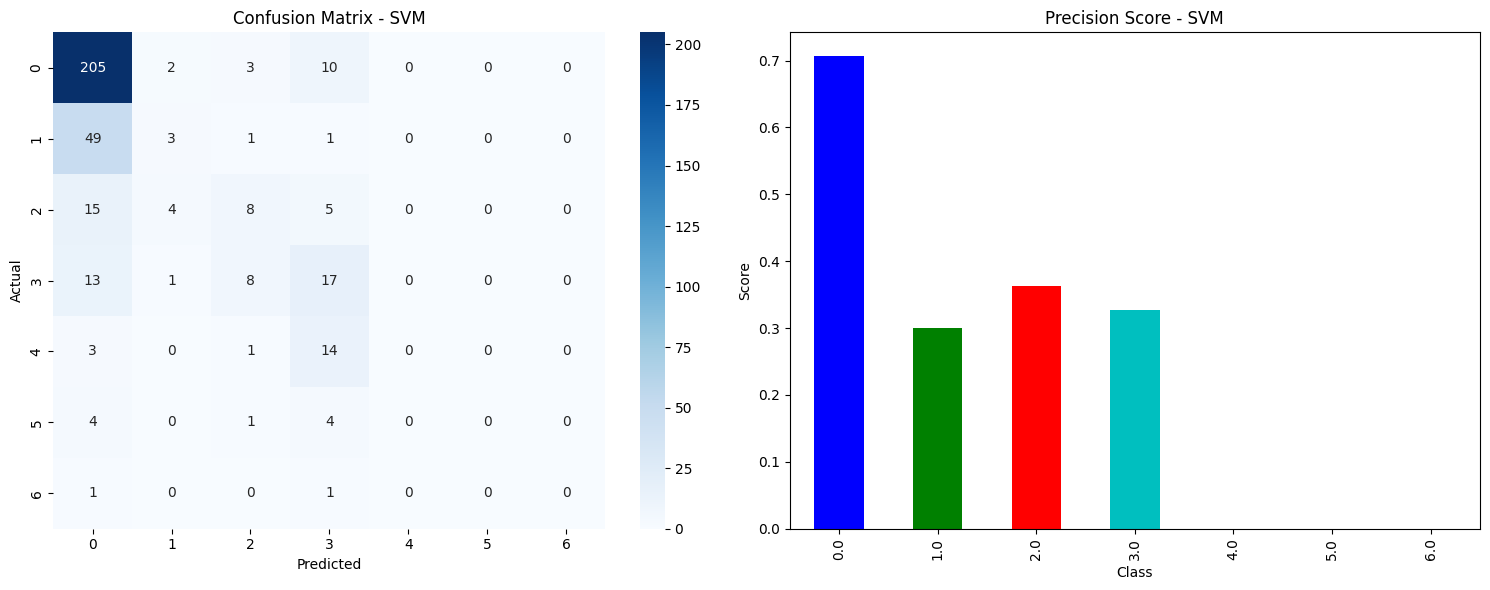

Accuracy: 0.62
Mean Squared Error (MSE): 1.58
Execution Time: 0.41 seconds


Evaluating Decision Tree


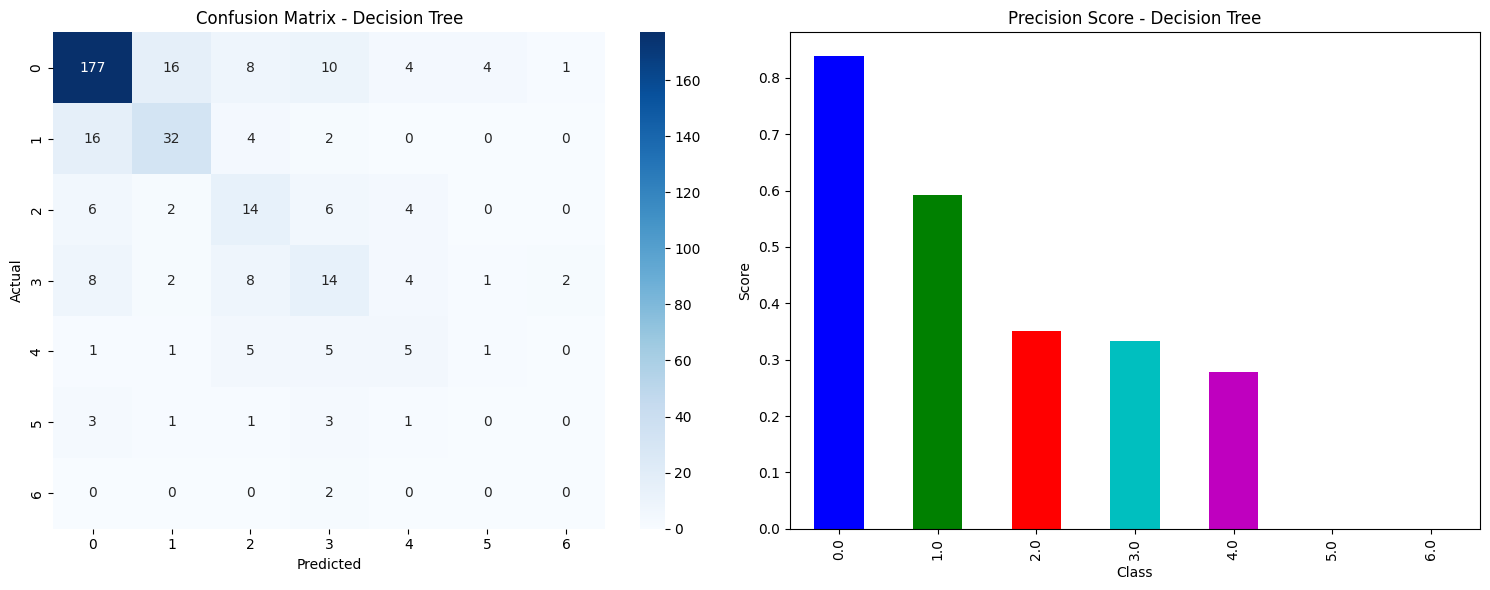

Accuracy: 0.65
Mean Squared Error (MSE): 1.90
Execution Time: 0.02 seconds


Evaluating KNN


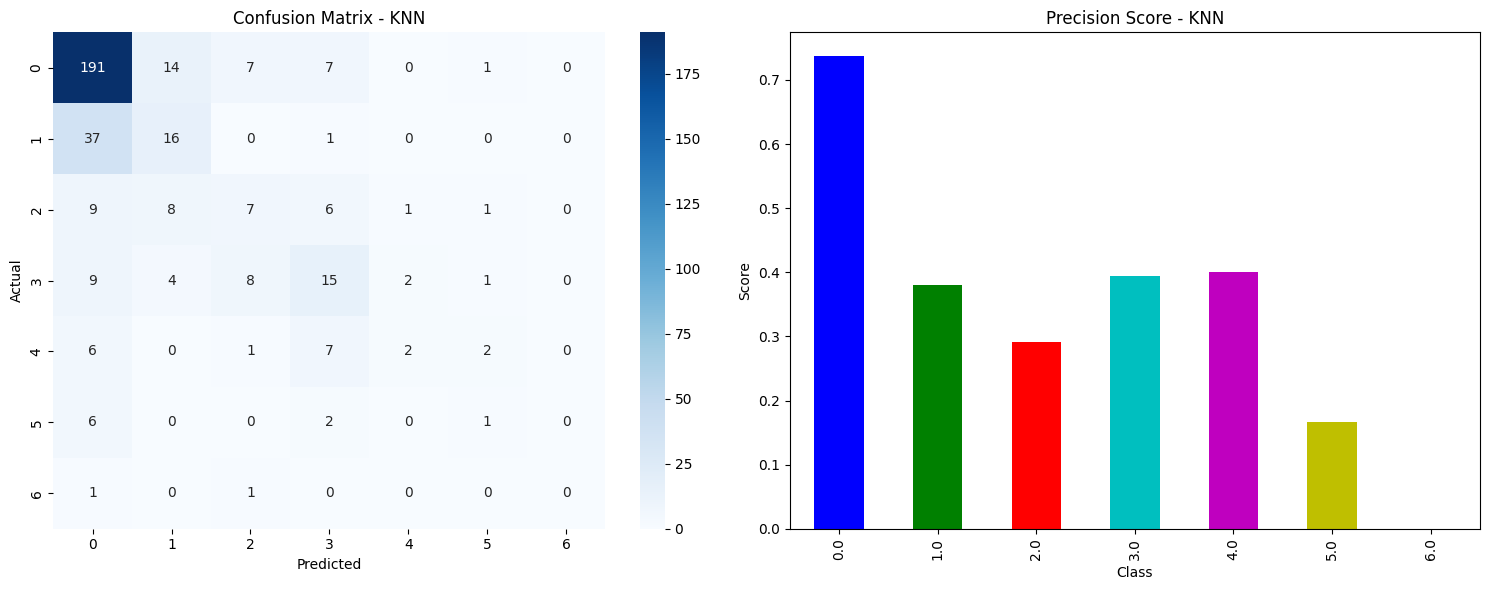

Accuracy: 0.62
Mean Squared Error (MSE): 1.78
Execution Time: 0.04 seconds


Evaluating Naive Bayes


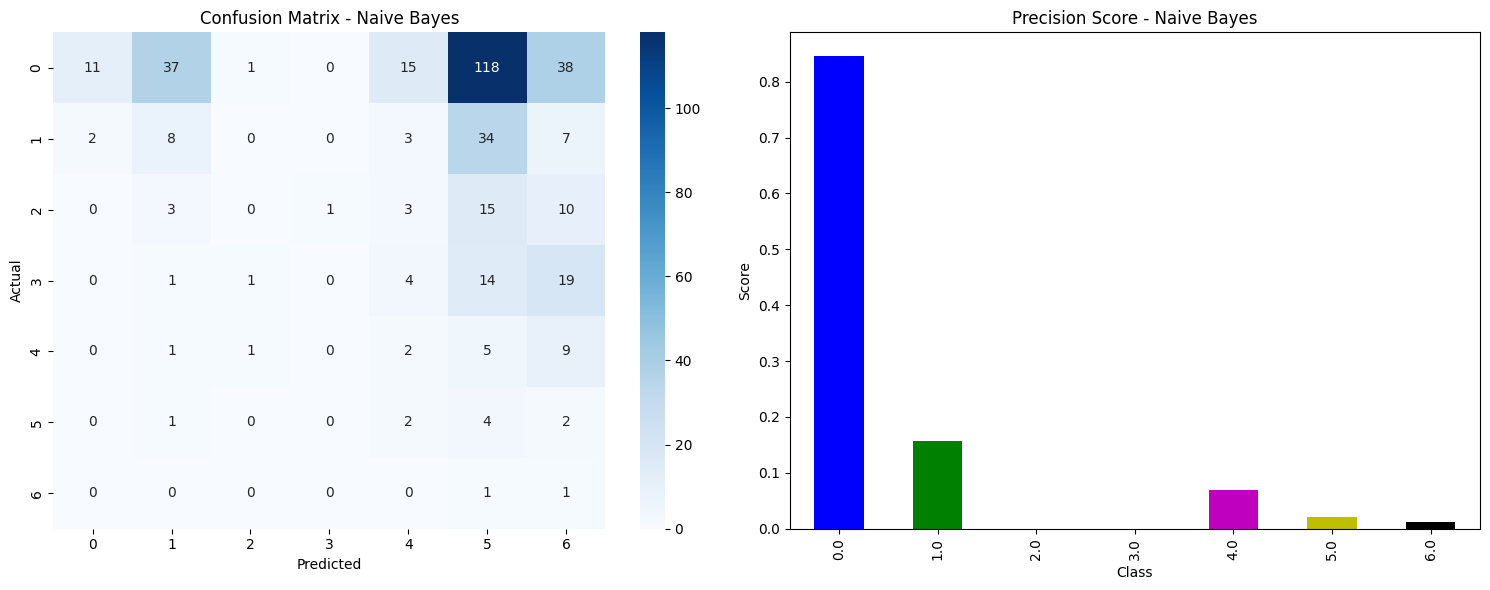

Accuracy: 0.07
Mean Squared Error (MSE): 15.96
Execution Time: 0.01 seconds


Evaluating Gradient Boosting


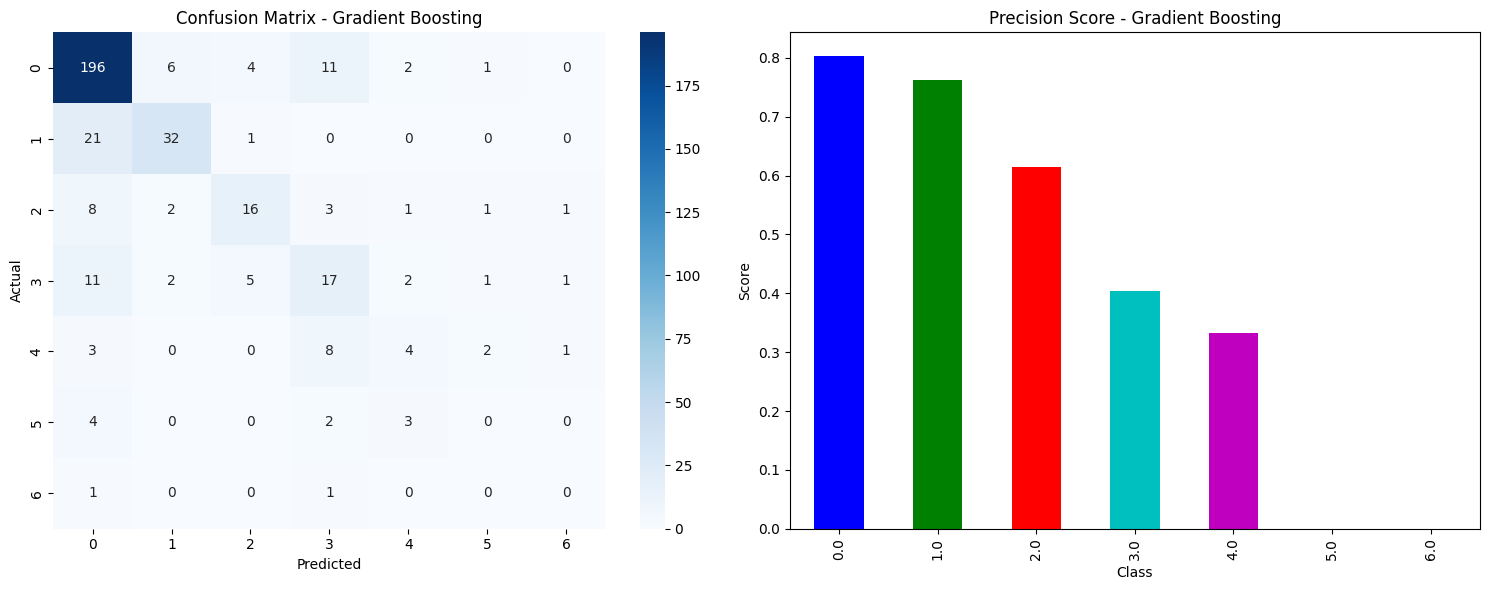

Accuracy: 0.71
Mean Squared Error (MSE): 1.63
Execution Time: 3.35 seconds


Evaluating Hierarchical Gradient Boosting


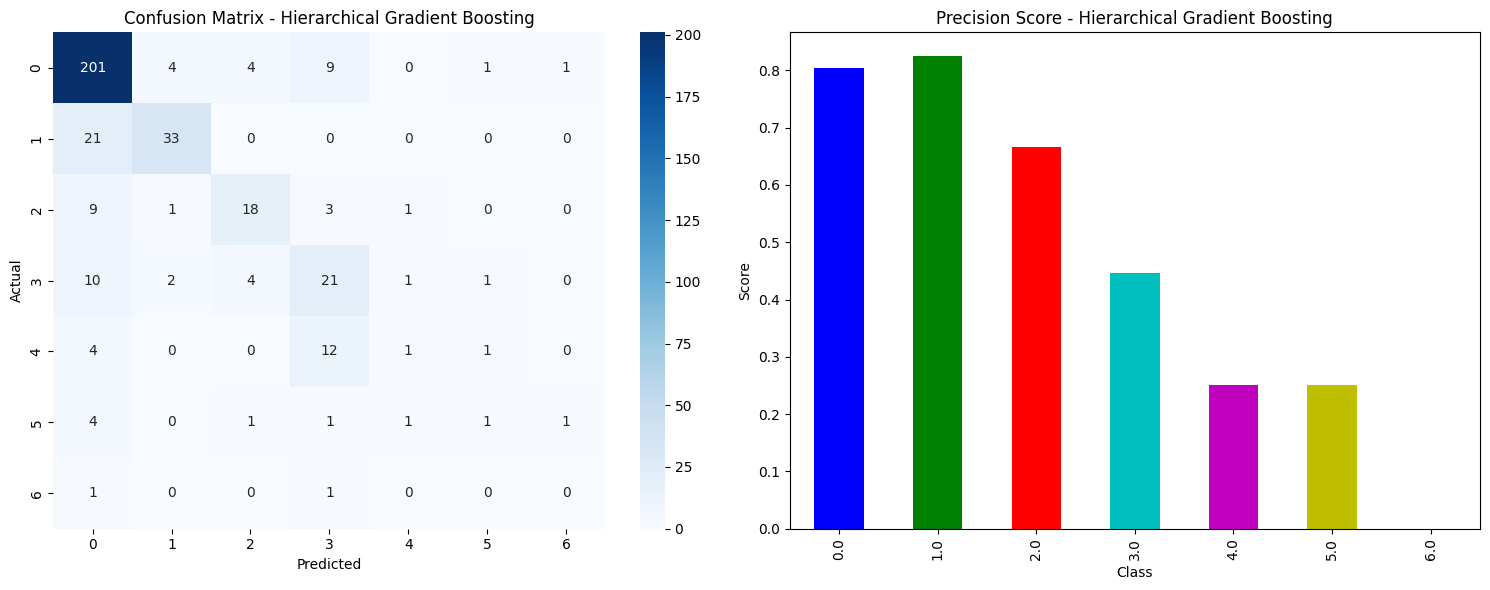

Accuracy: 0.74
Mean Squared Error (MSE): 1.53
Execution Time: 2.94 seconds


Evaluating XGBoost


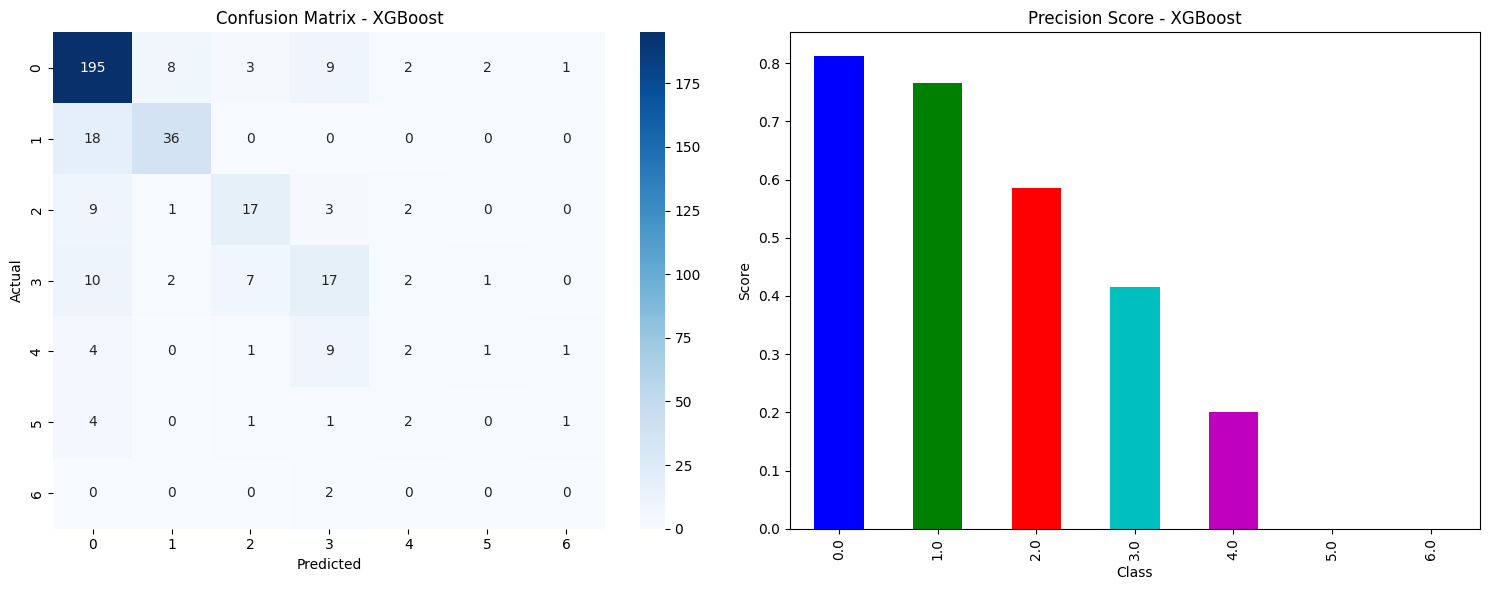

Accuracy: 0.71
Mean Squared Error (MSE): 1.64
Execution Time: 0.68 seconds


Evaluating CatBoost


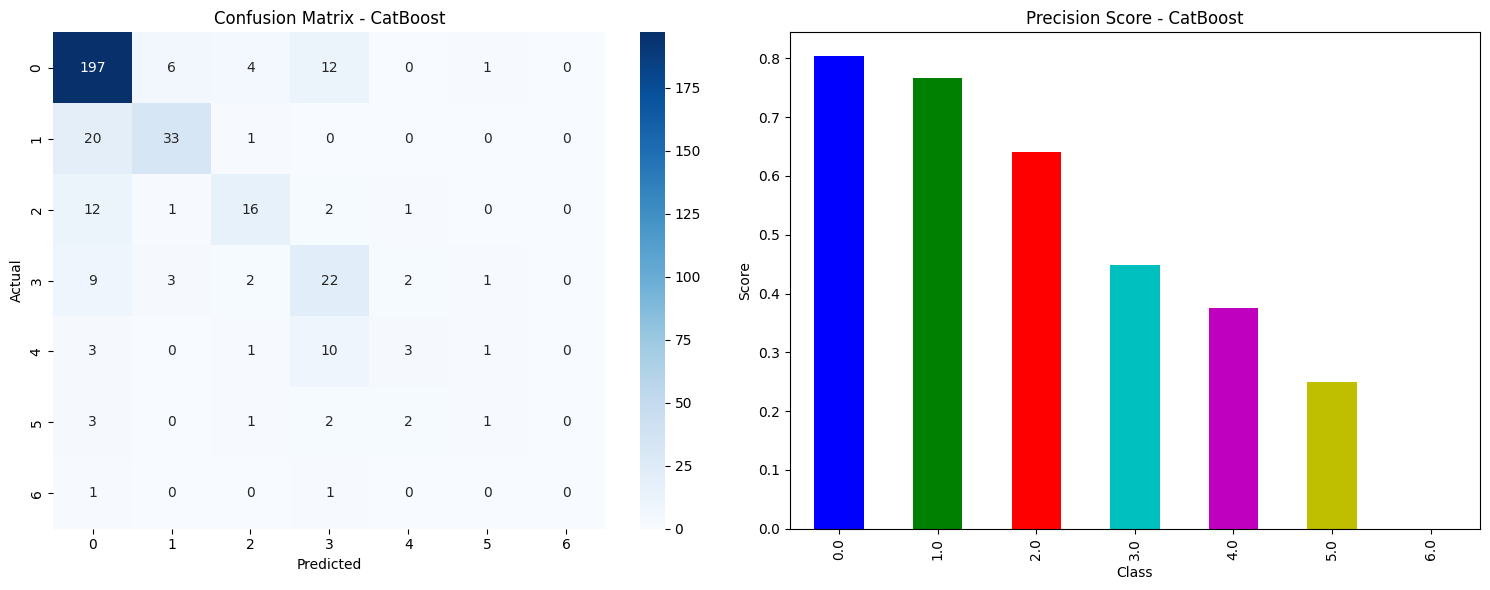

Accuracy: 0.73
Mean Squared Error (MSE): 1.43
Execution Time: 3.93 seconds


Evaluating AdaBoost


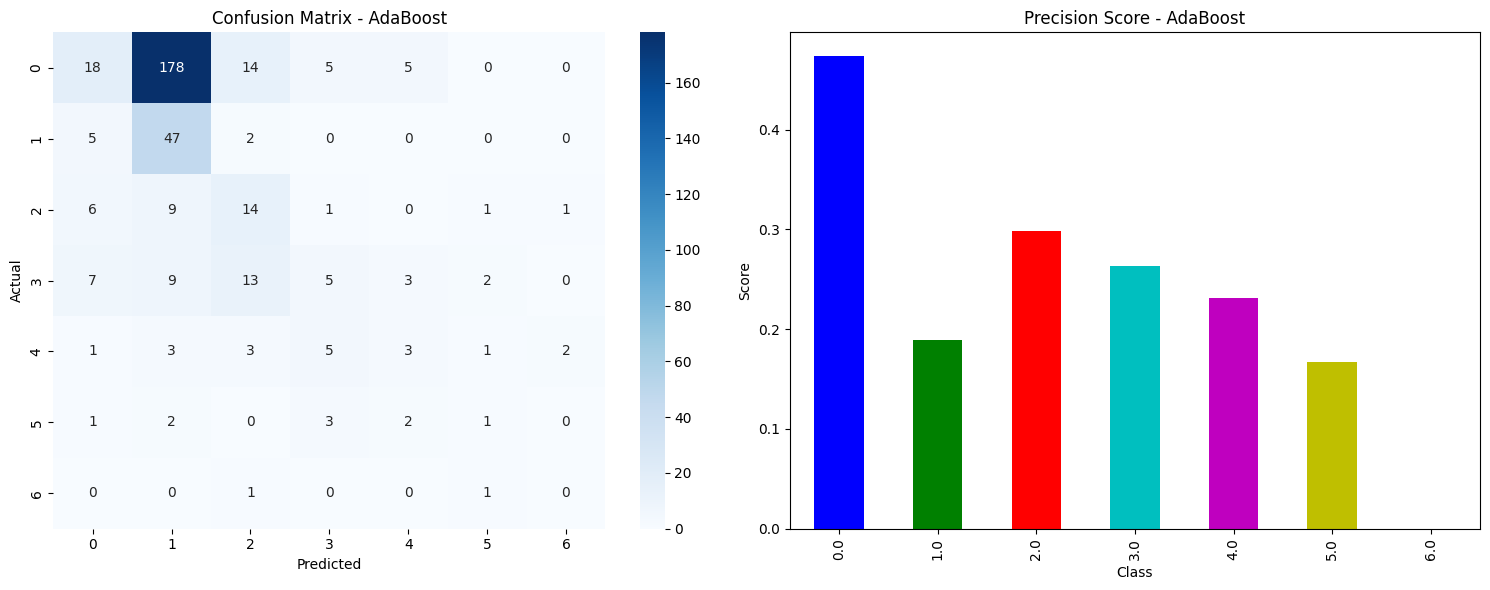

Accuracy: 0.24
Mean Squared Error (MSE): 1.89
Execution Time: 0.20 seconds


-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Logistic Regression


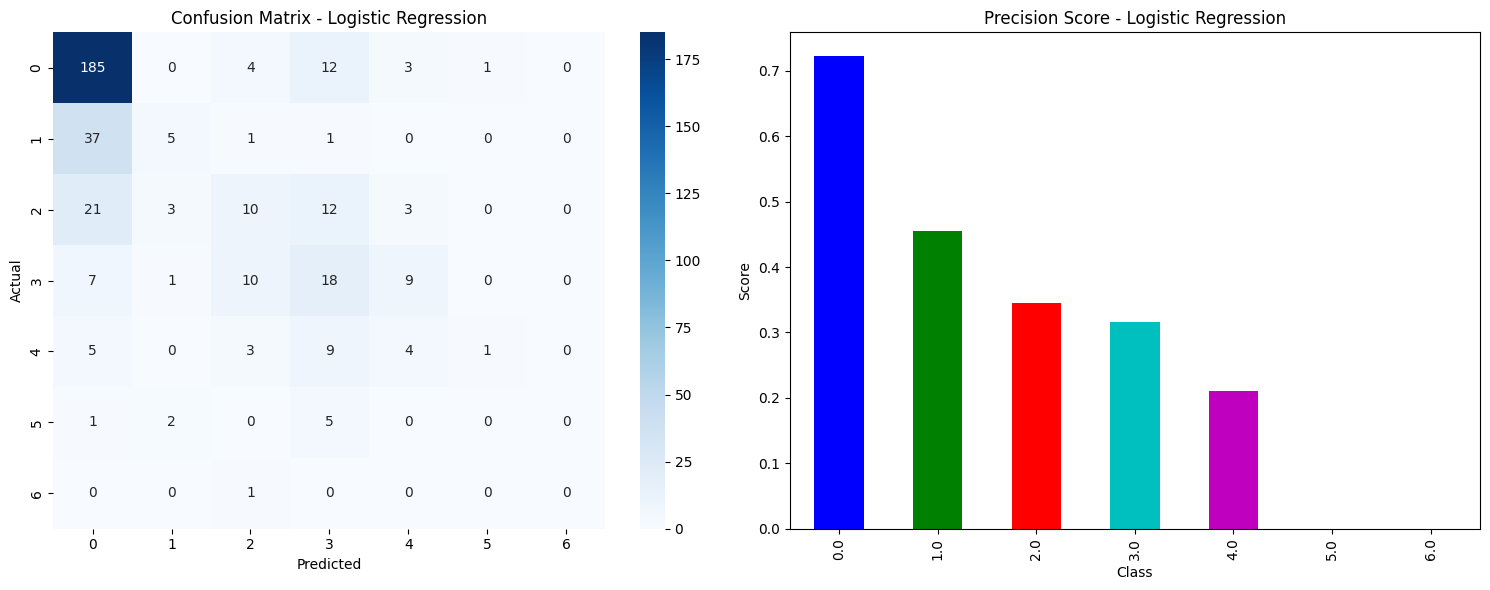

Accuracy: 0.59
Mean Squared Error (MSE): 1.69
Execution Time: 0.74 seconds


Evaluating Random Forest


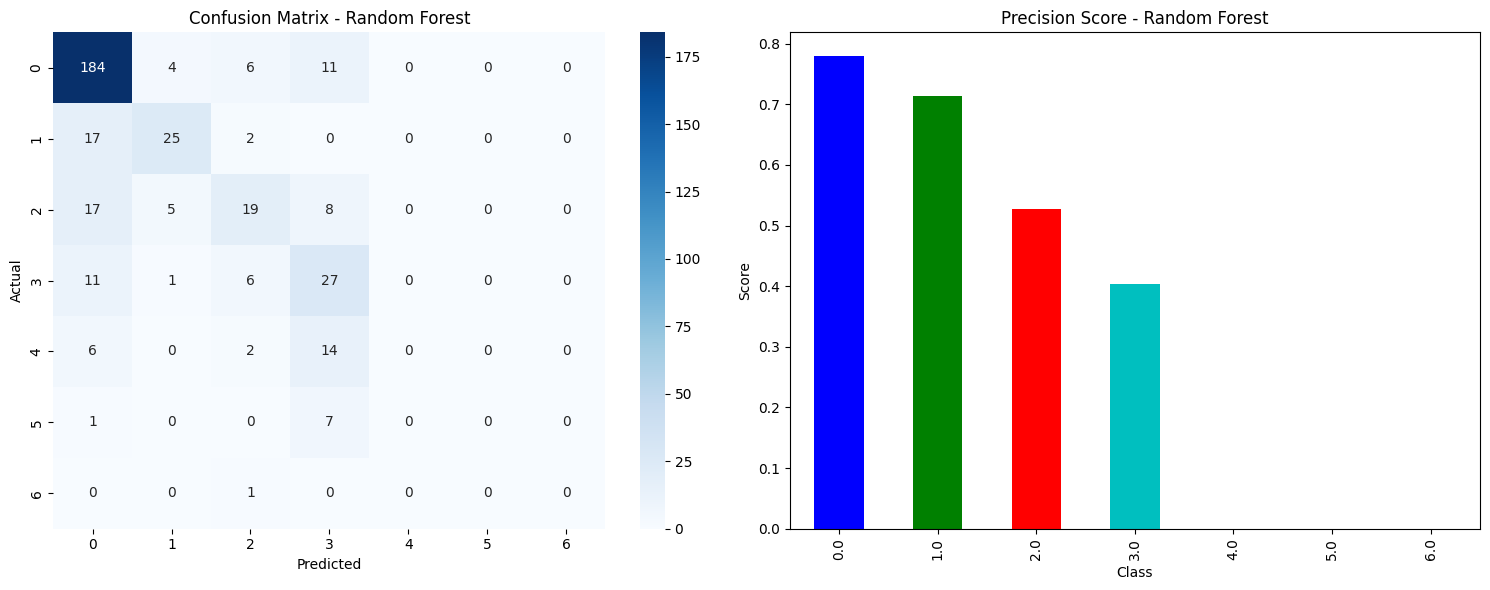

Accuracy: 0.68
Mean Squared Error (MSE): 1.40
Execution Time: 0.48 seconds


Evaluating SVM


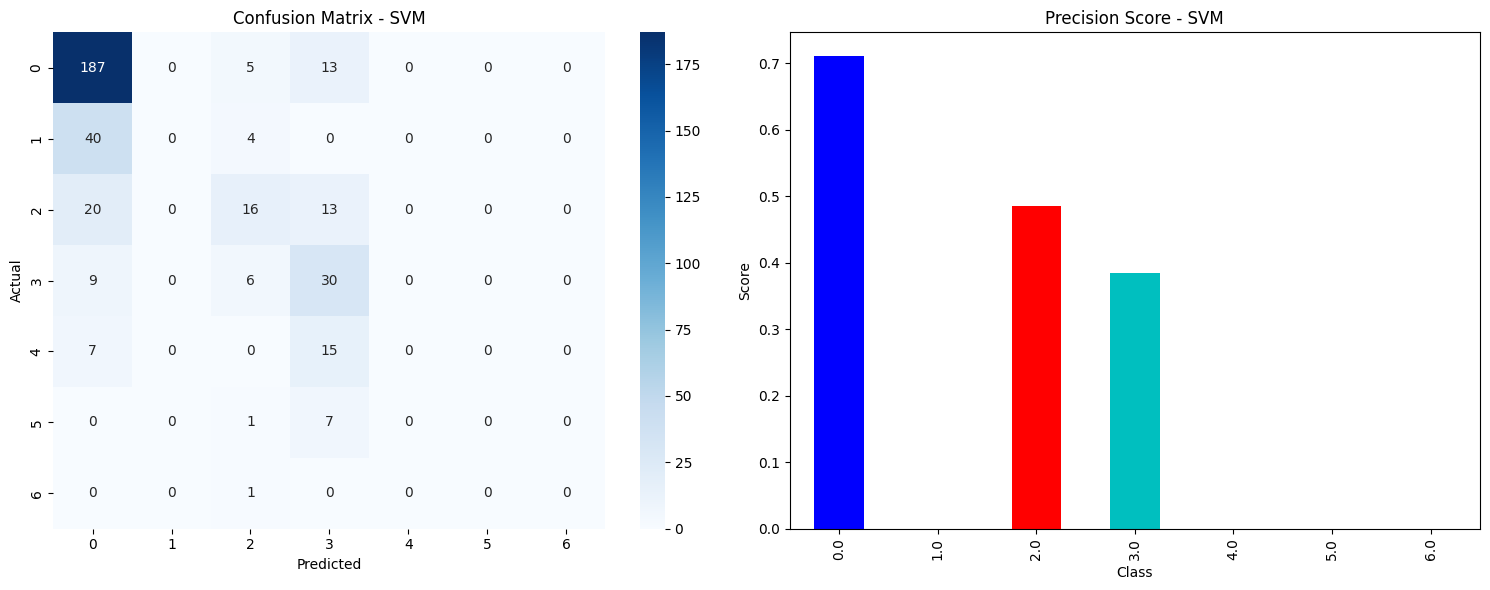

Accuracy: 0.62
Mean Squared Error (MSE): 1.45
Execution Time: 0.24 seconds


Evaluating Decision Tree


Accuracy: 0.60
Mean Squared Error (MSE): 1.83
Execution Time: 0.02 seconds


Evaluating KNN


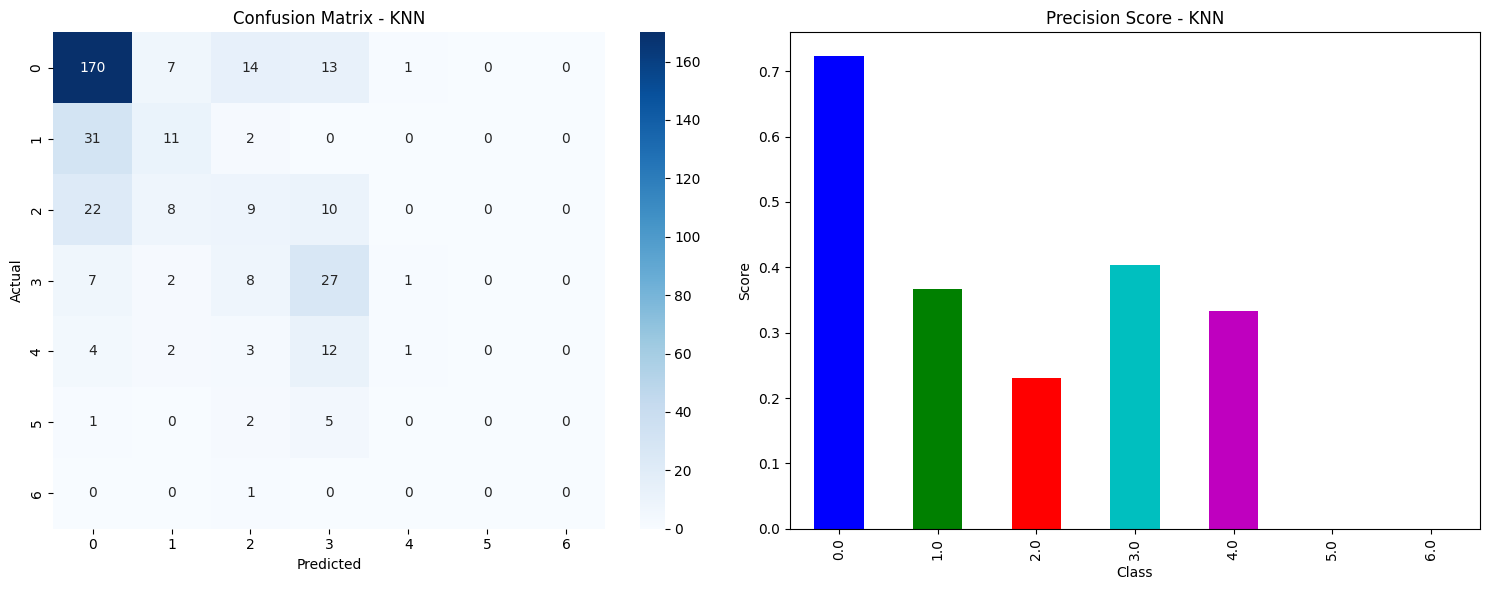

Accuracy: 0.58
Mean Squared Error (MSE): 1.60
Execution Time: 0.03 seconds


Evaluating Naive Bayes


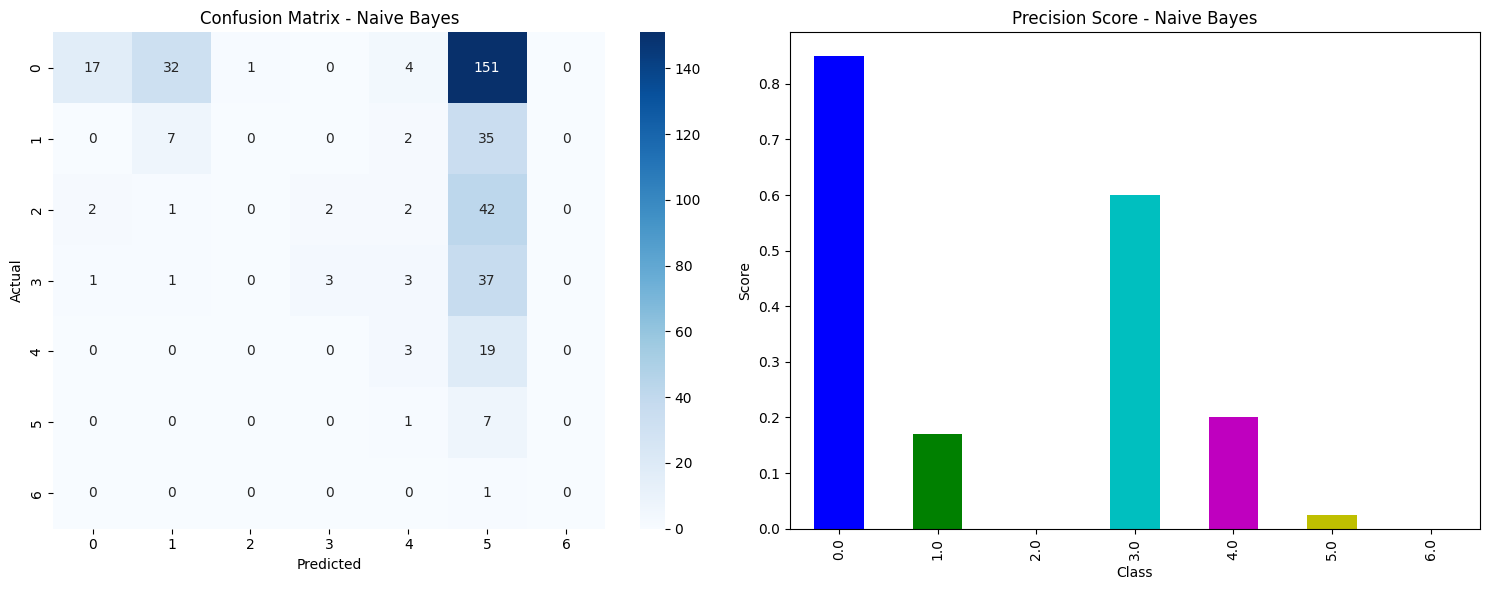

Accuracy: 0.10
Mean Squared Error (MSE): 13.46
Execution Time: 0.01 seconds


Evaluating Gradient Boosting


Accuracy: 0.65
Mean Squared Error (MSE): 1.56
Execution Time: 3.33 seconds


Evaluating Hierarchical Gradient Boosting


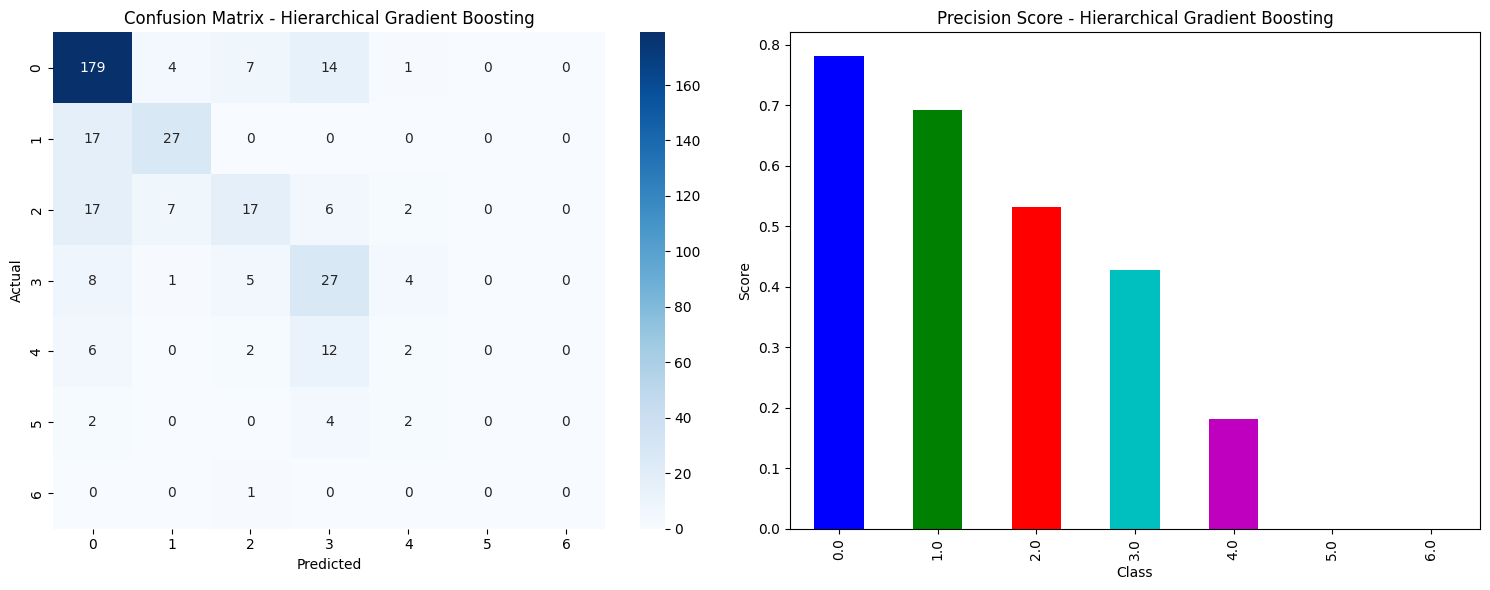

Accuracy: 0.67
Mean Squared Error (MSE): 1.51
Execution Time: 3.05 seconds


Evaluating XGBoost


Accuracy: 0.69
Mean Squared Error (MSE): 1.36
Execution Time: 0.89 seconds


Evaluating CatBoost


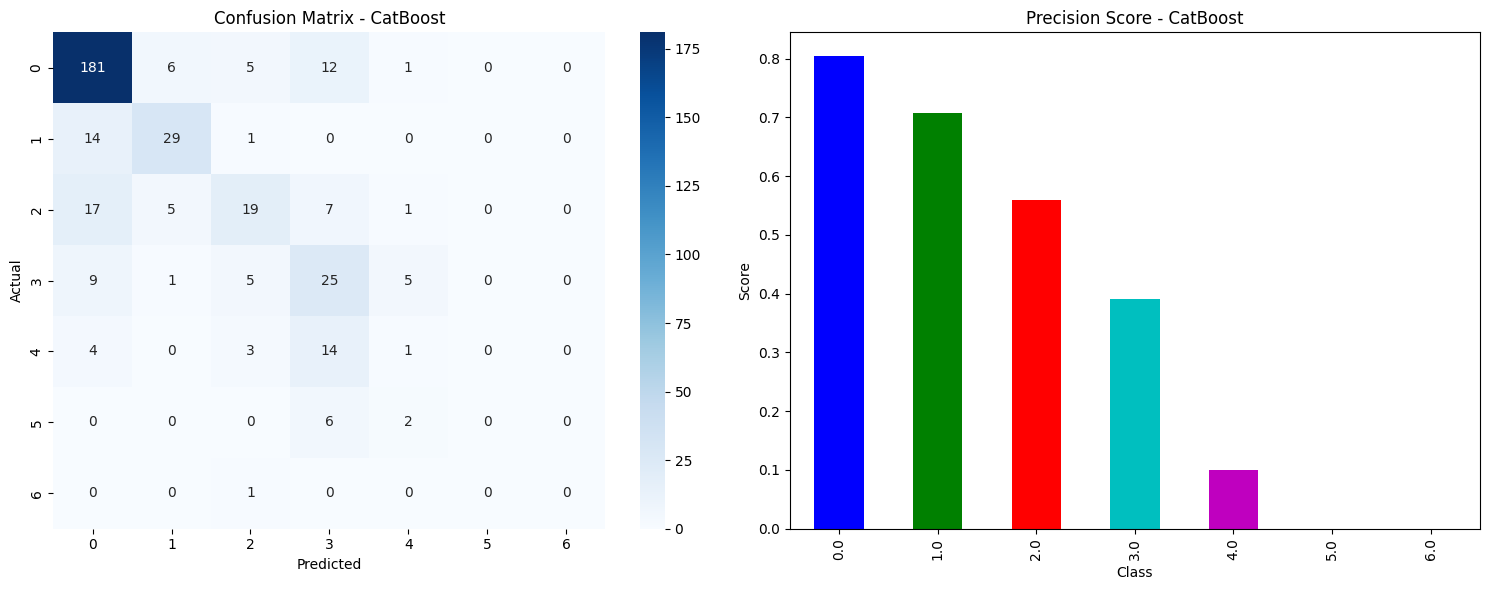

Accuracy: 0.68
Mean Squared Error (MSE): 1.27
Execution Time: 3.96 seconds


Evaluating AdaBoost


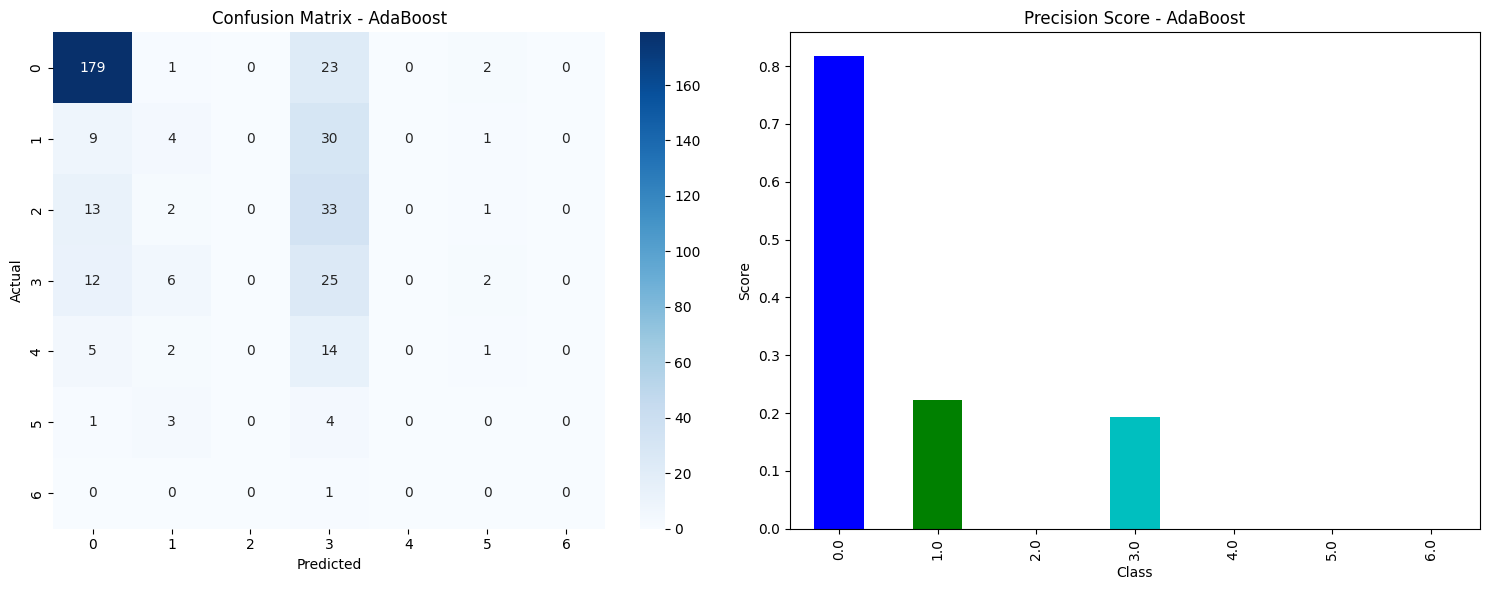

Accuracy: 0.56
Mean Squared Error (MSE): 2.27
Execution Time: 0.23 seconds




In [22]:
for target in target_columns:
    run_evals(dataset, target)

-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Logistic Regression


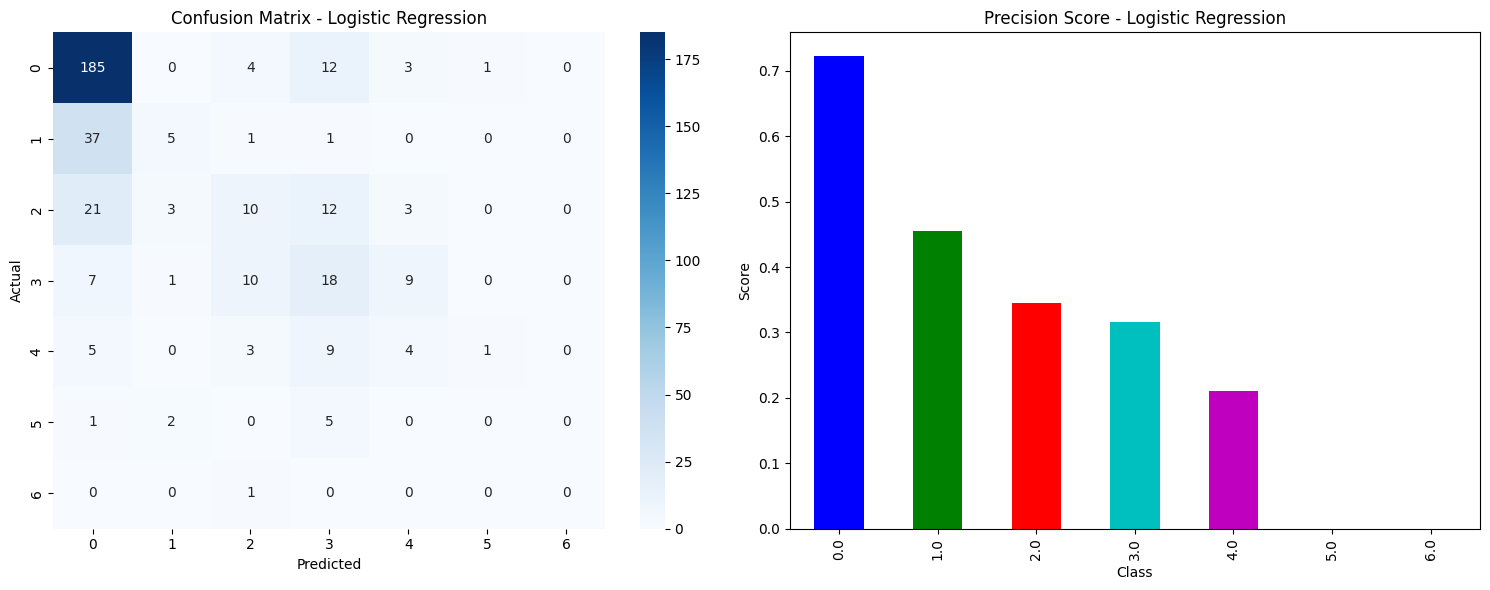

Accuracy: 0.59
Mean Squared Error (MSE): 1.69
Execution Time: 1.11 seconds


Evaluating Random Forest


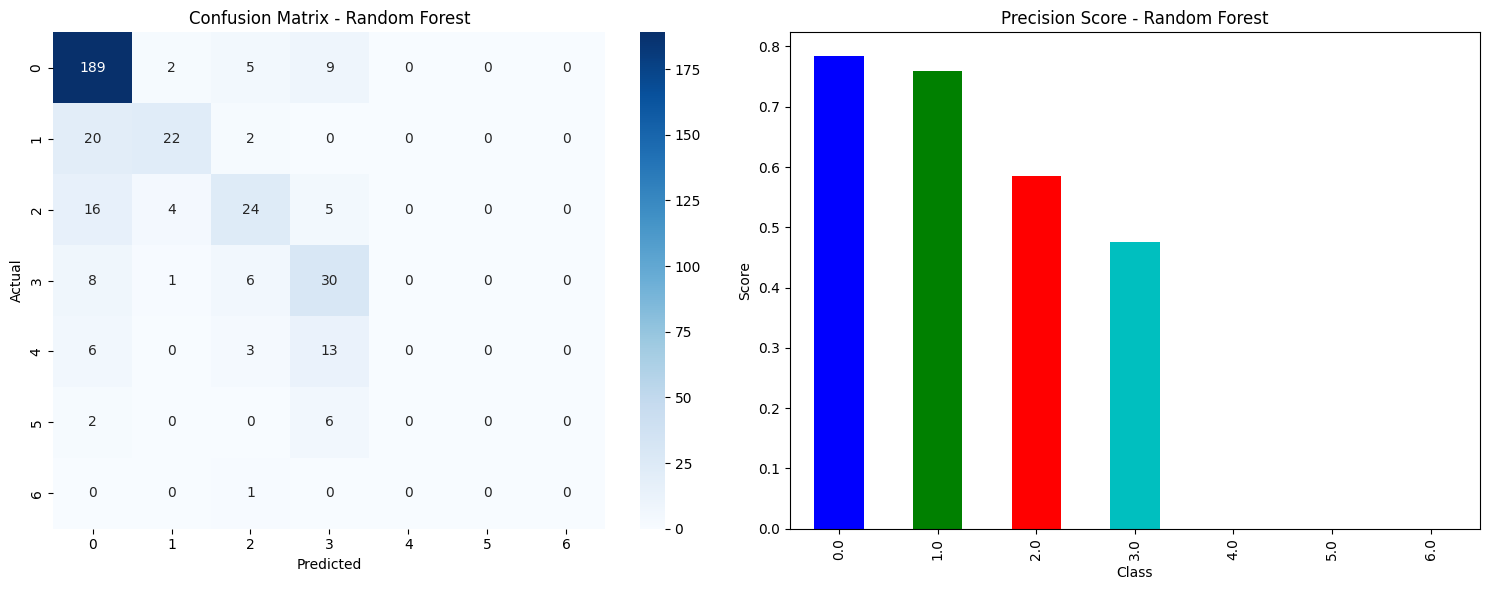

Accuracy: 0.71
Mean Squared Error (MSE): 1.31
Execution Time: 0.48 seconds


Evaluating SVM


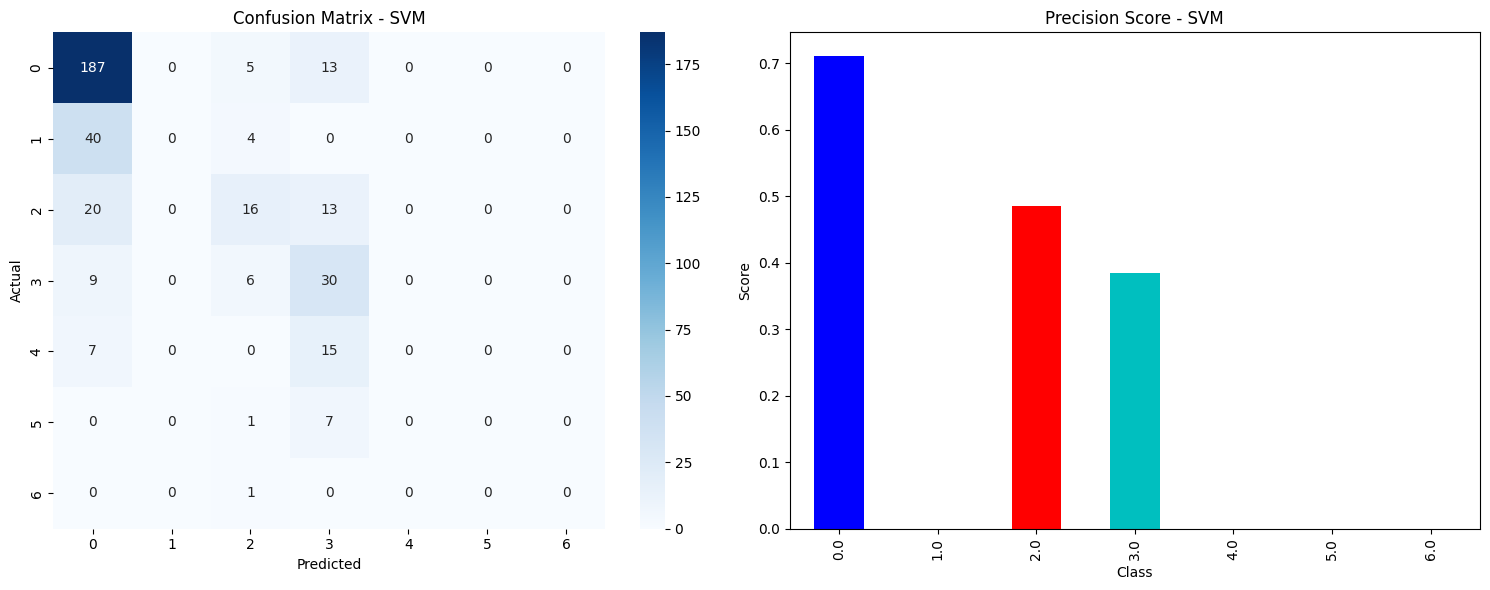

Accuracy: 0.62
Mean Squared Error (MSE): 1.45
Execution Time: 0.24 seconds


Evaluating Decision Tree


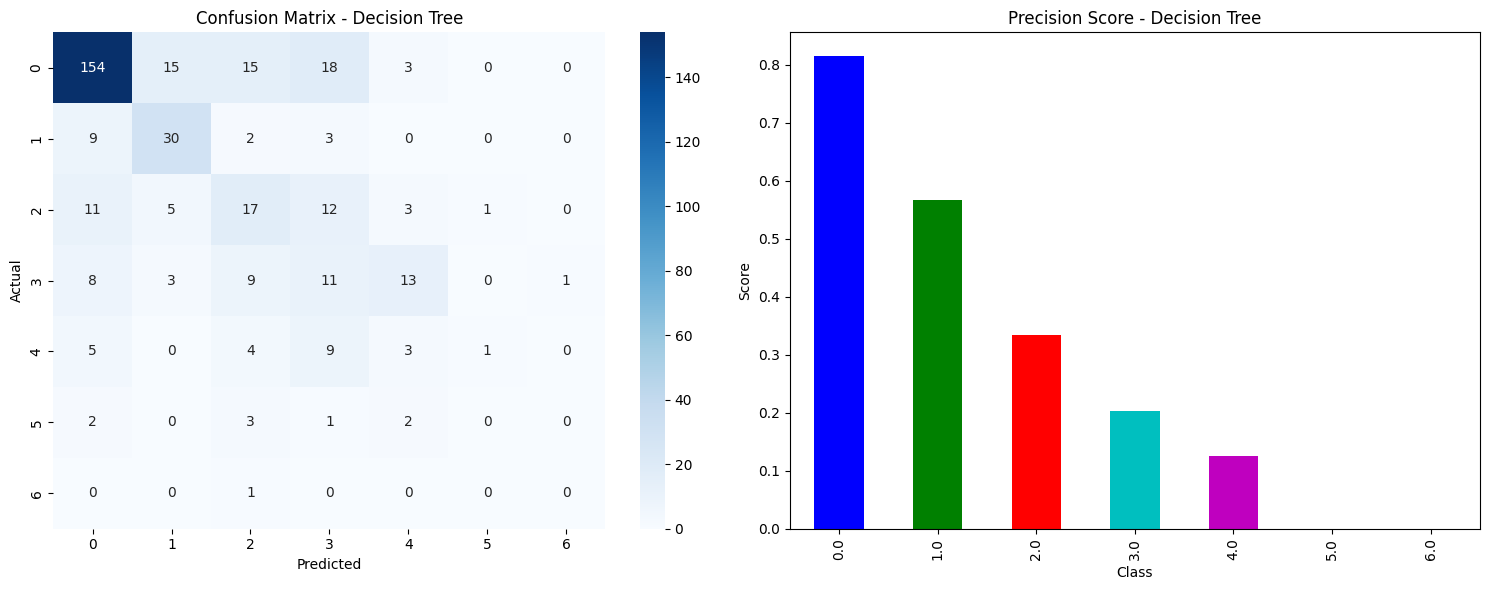

Accuracy: 0.57
Mean Squared Error (MSE): 1.90
Execution Time: 0.02 seconds


Evaluating KNN


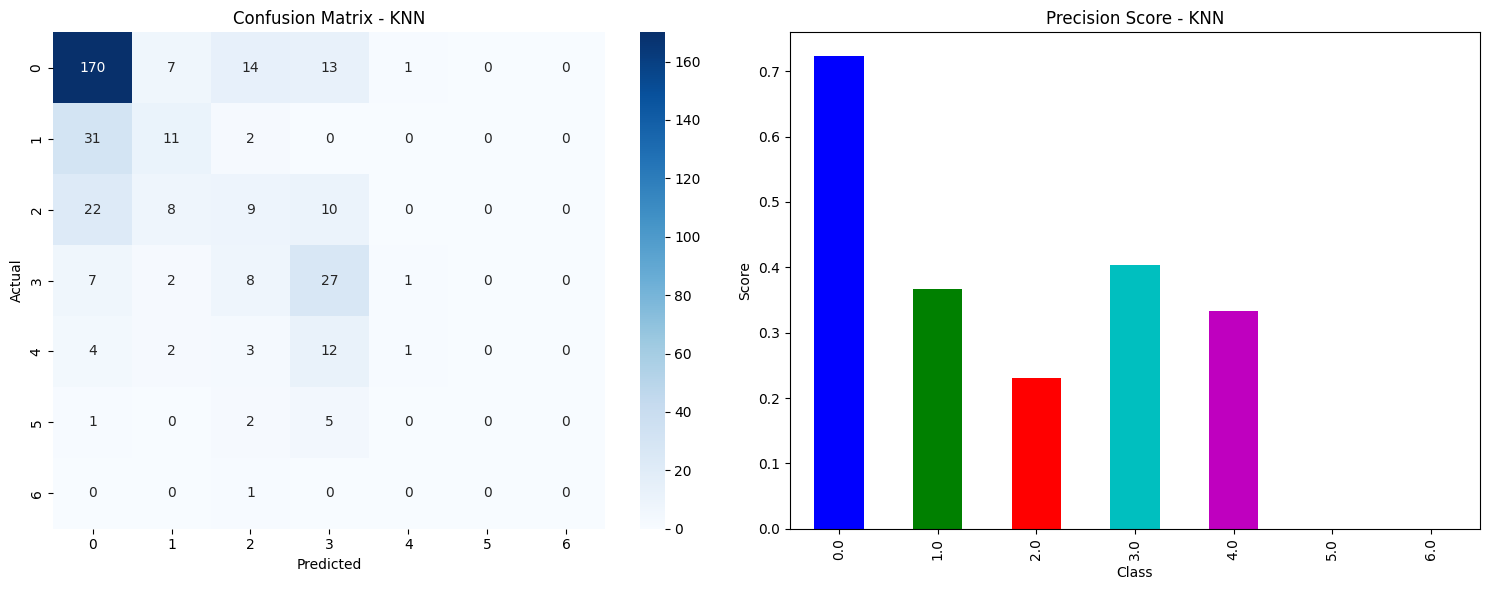

Accuracy: 0.58
Mean Squared Error (MSE): 1.60
Execution Time: 0.03 seconds


Evaluating Naive Bayes


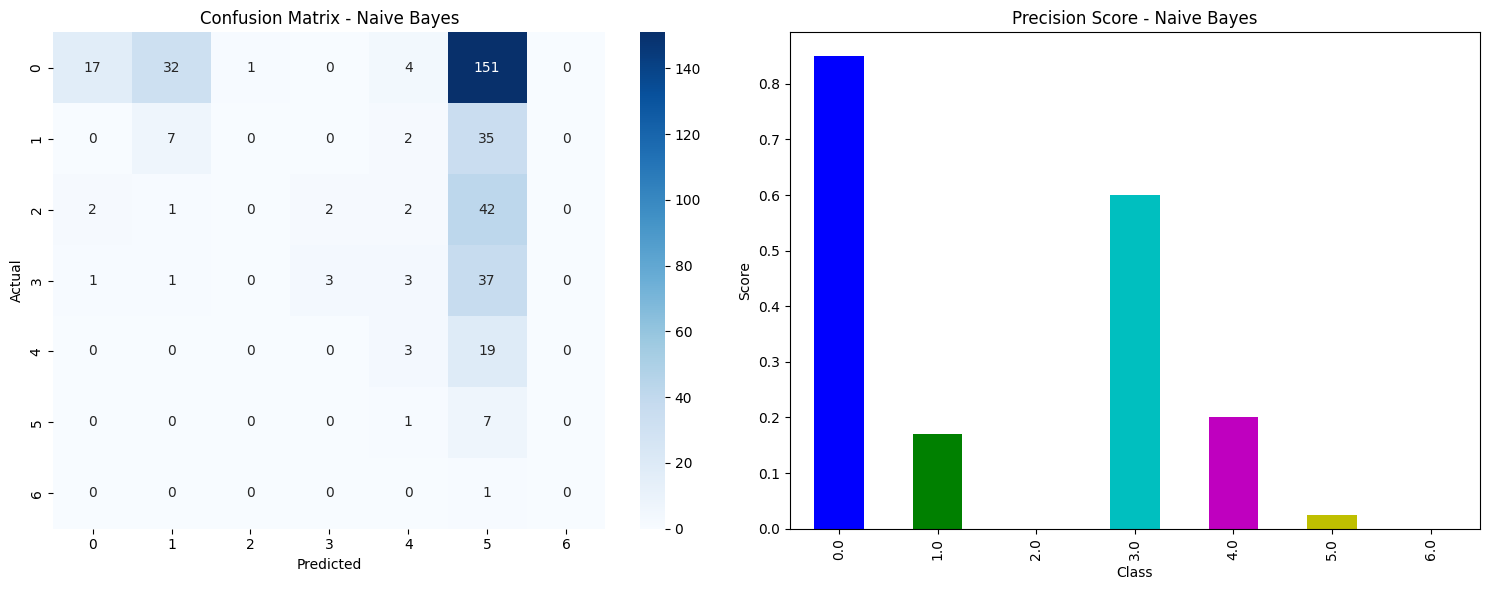

Accuracy: 0.10
Mean Squared Error (MSE): 13.46
Execution Time: 0.01 seconds


Evaluating Gradient Boosting


Accuracy: 0.65
Mean Squared Error (MSE): 1.56
Execution Time: 3.30 seconds


Evaluating Hierarchical Gradient Boosting


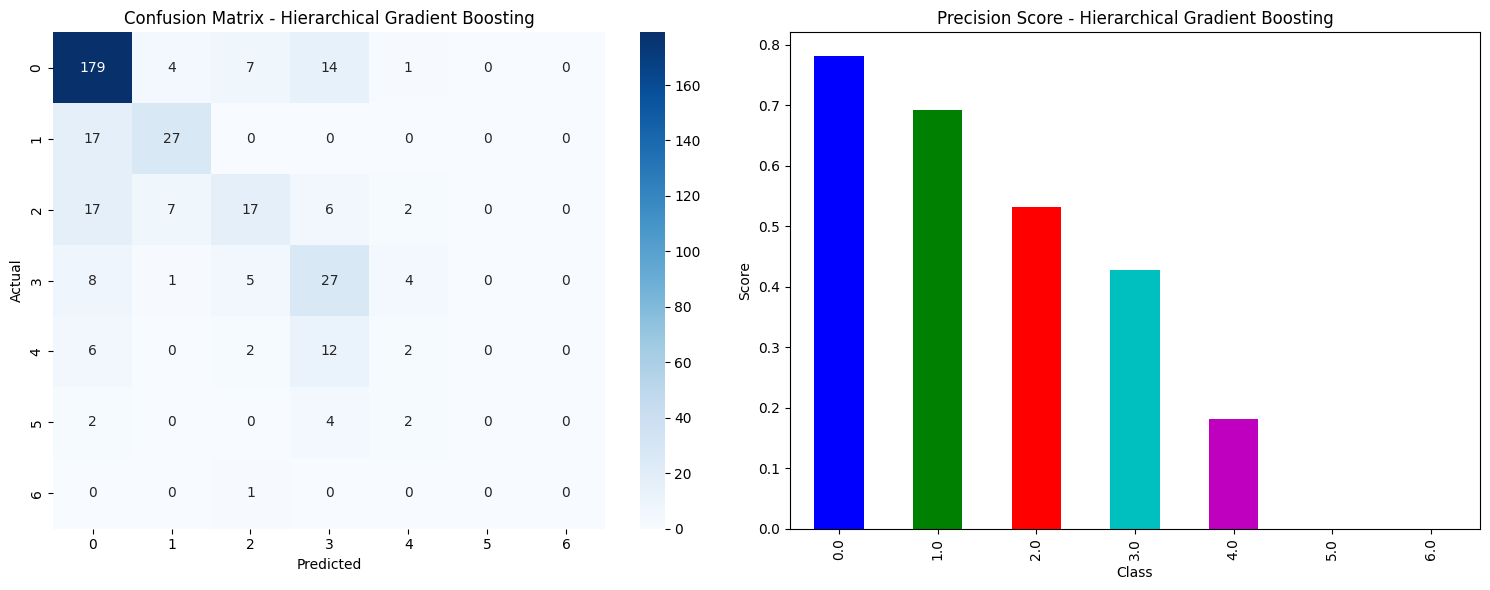

Accuracy: 0.67
Mean Squared Error (MSE): 1.51
Execution Time: 2.71 seconds


Evaluating XGBoost


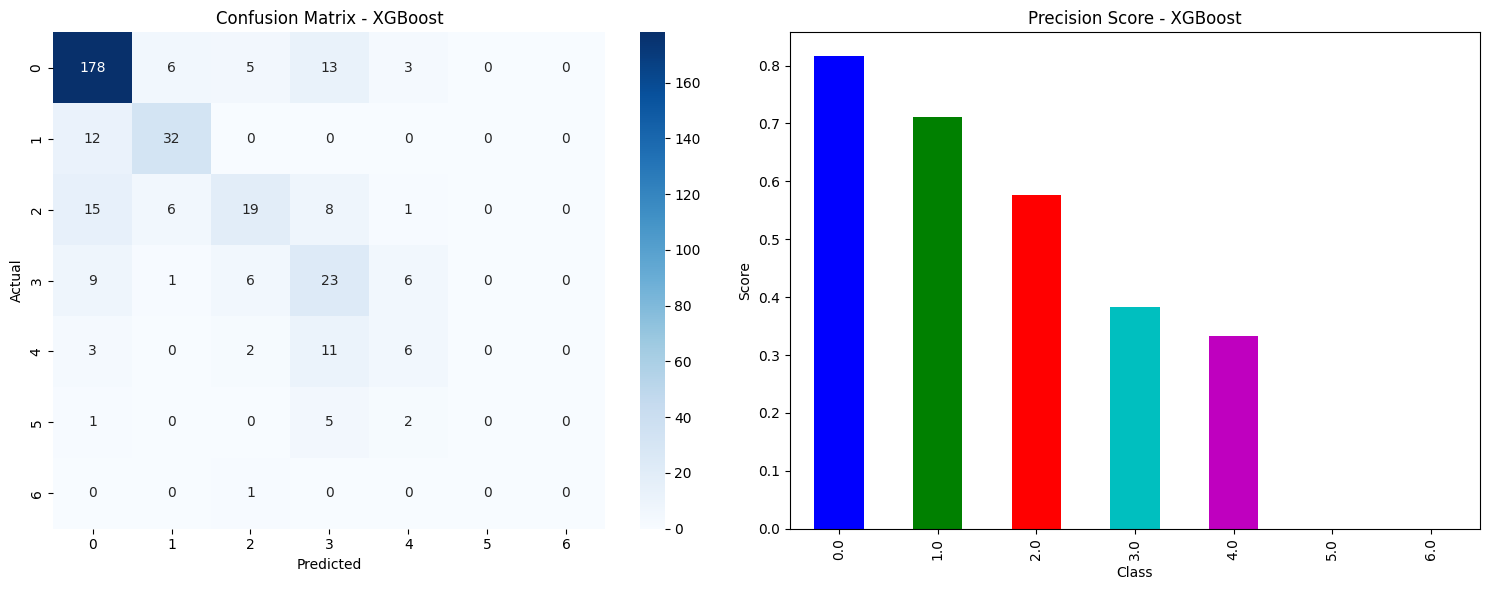

Accuracy: 0.69
Mean Squared Error (MSE): 1.36
Execution Time: 0.58 seconds


Evaluating CatBoost


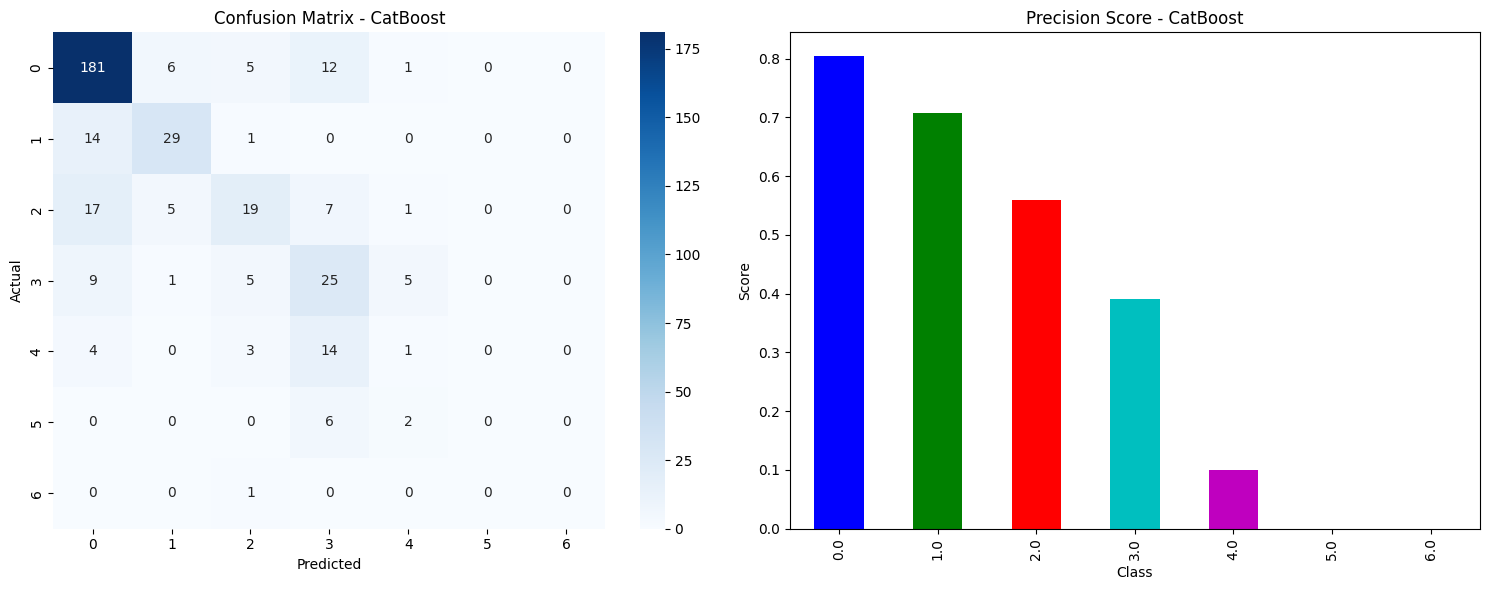

Accuracy: 0.68
Mean Squared Error (MSE): 1.27
Execution Time: 4.32 seconds


Evaluating AdaBoost


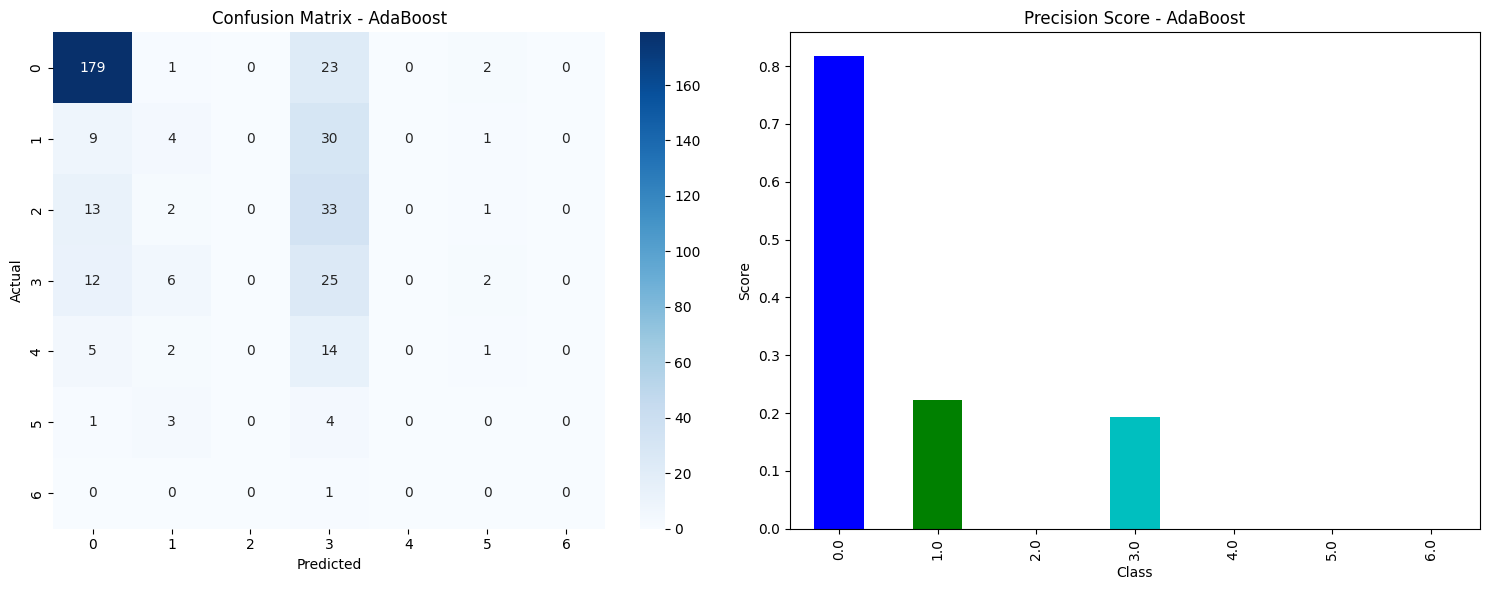

Accuracy: 0.56
Mean Squared Error (MSE): 2.27
Execution Time: 0.19 seconds




In [23]:
model_accuracy = {}
target = 'Mushrooms'
run_evals(dataset, target)

In [24]:
bright_light_colors = [
    '#FFB6C1',  # Light Pink
    '#FF7F50',  # Coral
    '#FFD700',  # Gold
    '#ADFF2F',  # Green Yellow
    '#7CFC00',  # Lawn Green
    '#00FA9A',  # Medium Spring Green
    '#87CEFA',  # Light Sky Blue
    '#6495ED',  # Cornflower Blue
    '#BA55D3',  # Medium Orchid
    '#EE82EE',  # Violet
    '#FF69B4'   # Hot Pink
]

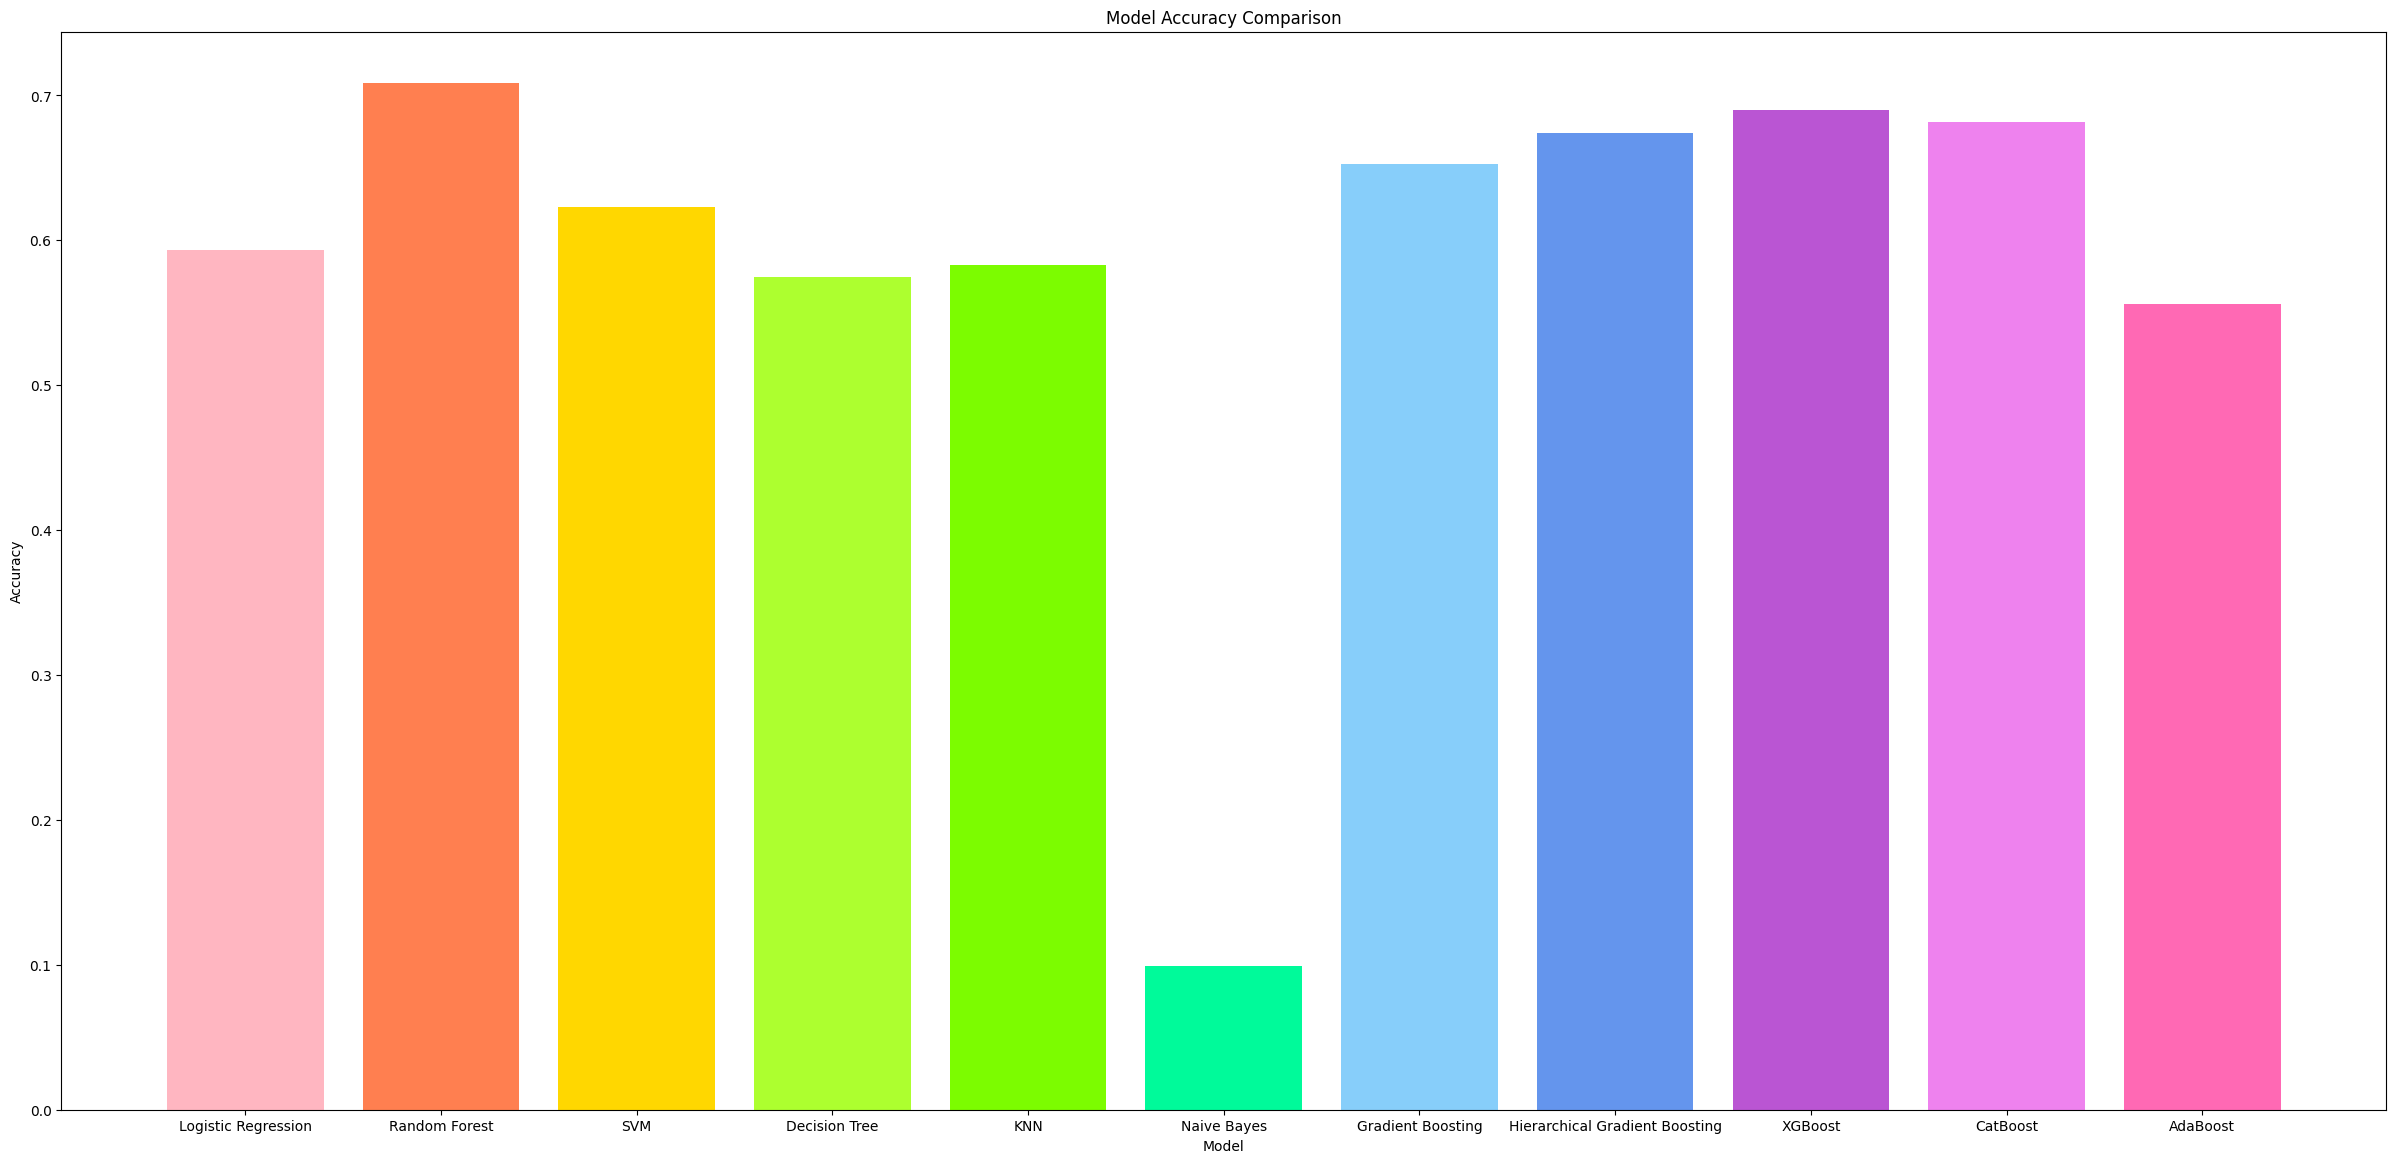

In [25]:
plt.figure(figsize=(30, 14))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=bright_light_colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

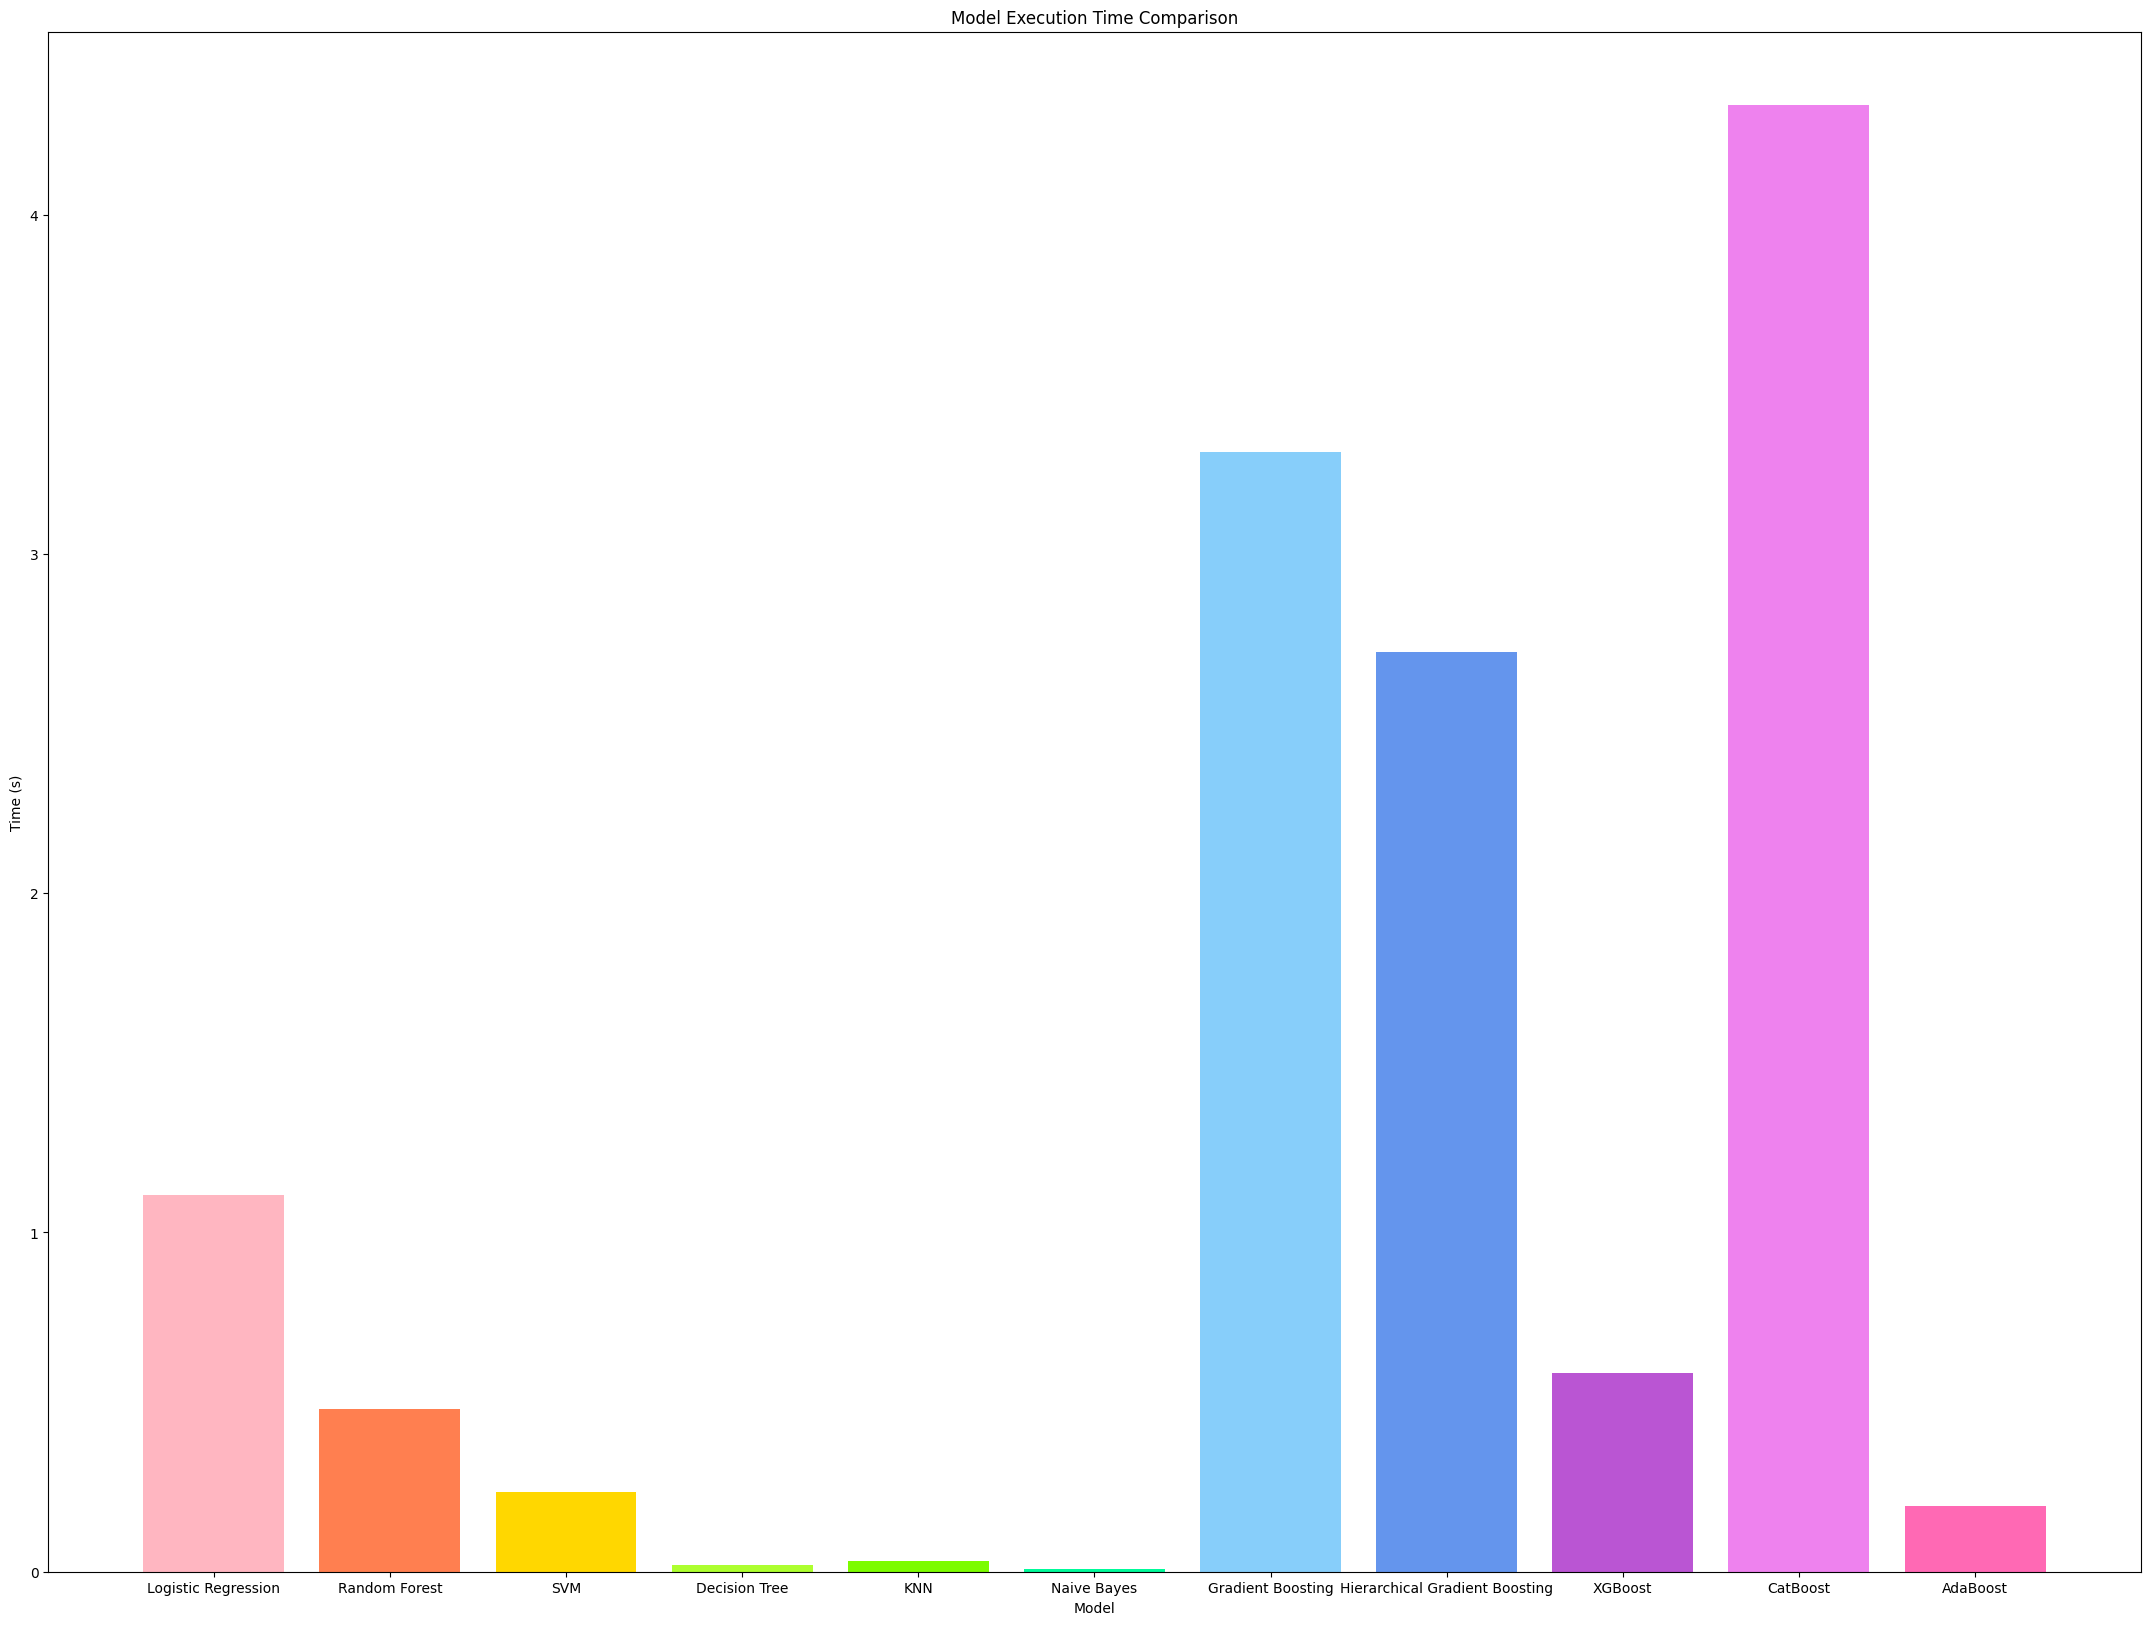

In [26]:
plt.figure(figsize=(27, 20))
plt.bar(model_execution_time.keys(), model_execution_time.values(), color=bright_light_colors)
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.title('Model Execution Time Comparison')
plt.show()

#### **Model Comparison**

As we can see above, the algorithms with the highest accuracy are:
* Random Forest
* Hierarchical Gradient Boosting
* XGBoost
* CatBoost

Also, the algorithm with the lowest mean squared error is CatBoost.

From now on, we will focus on these 3 models:
* Random Forest
* Hierarchical Gradient Boosting
* CatBoost


In [27]:
best_models = {
    'Random Forest' : RandomForestClassifier(),
    'Hierarchical Gradient Boosting': HistGradientBoostingClassifier(),
    'CatBoost' : CatBoostClassifier(verbose=0),
    'XGBoost': XGBClassifier(),
}

#### **Training and Testing the Best Models with Less Information**

Now, we will train and test the best models with less information. We will only use non-drug columns to predict the frequency of drug consumption of an individual.

-------------------------------------------------------------------- Cannabis --------------------------------------------------------------------


Evaluating Random Forest


Accuracy: 0.36
Mean Squared Error (MSE): 5.82
Execution Time: 0.42 seconds


Evaluating Hierarchical Gradient Boosting


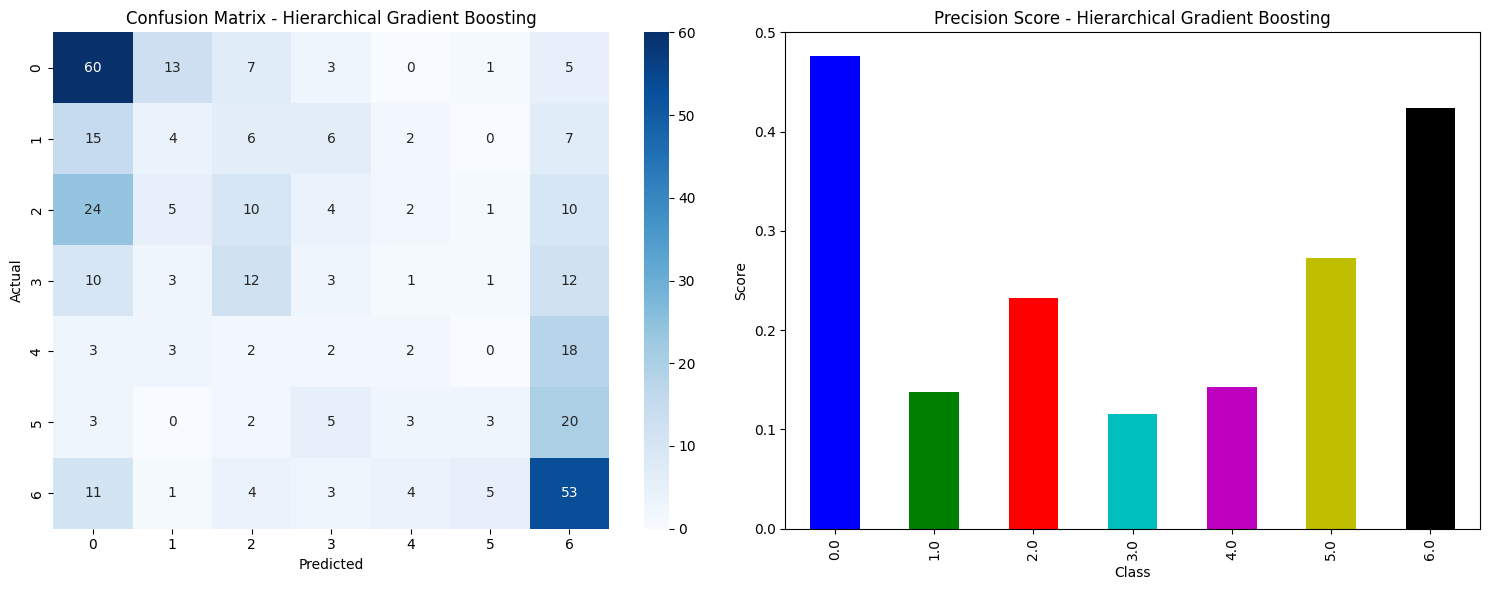

Accuracy: 0.36
Mean Squared Error (MSE): 4.94
Execution Time: 2.54 seconds


Evaluating CatBoost


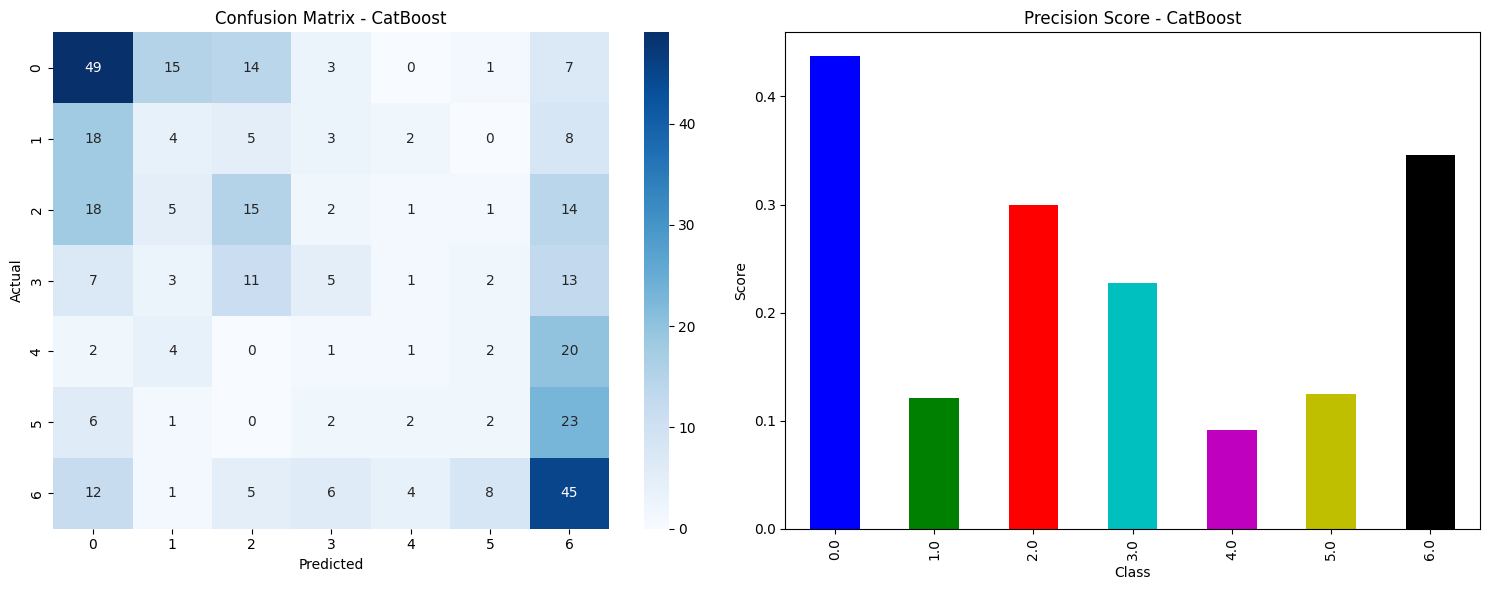

Accuracy: 0.32
Mean Squared Error (MSE): 5.67
Execution Time: 3.08 seconds


Evaluating XGBoost


Accuracy: 0.32
Mean Squared Error (MSE): 5.05
Execution Time: 0.78 seconds


-------------------------------------------------------------------- LSD --------------------------------------------------------------------


Evaluating Random Forest


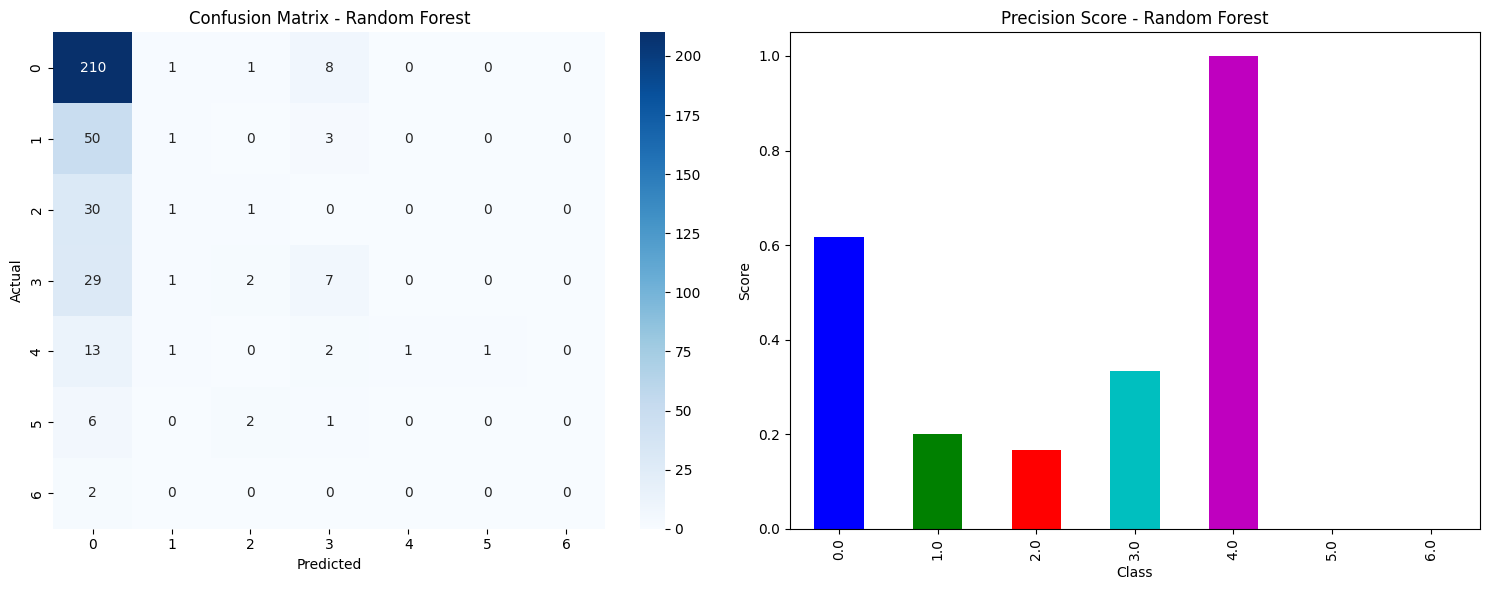

Accuracy: 0.59
Mean Squared Error (MSE): 2.65
Execution Time: 0.45 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.59
Mean Squared Error (MSE): 2.43
Execution Time: 2.88 seconds


Evaluating CatBoost


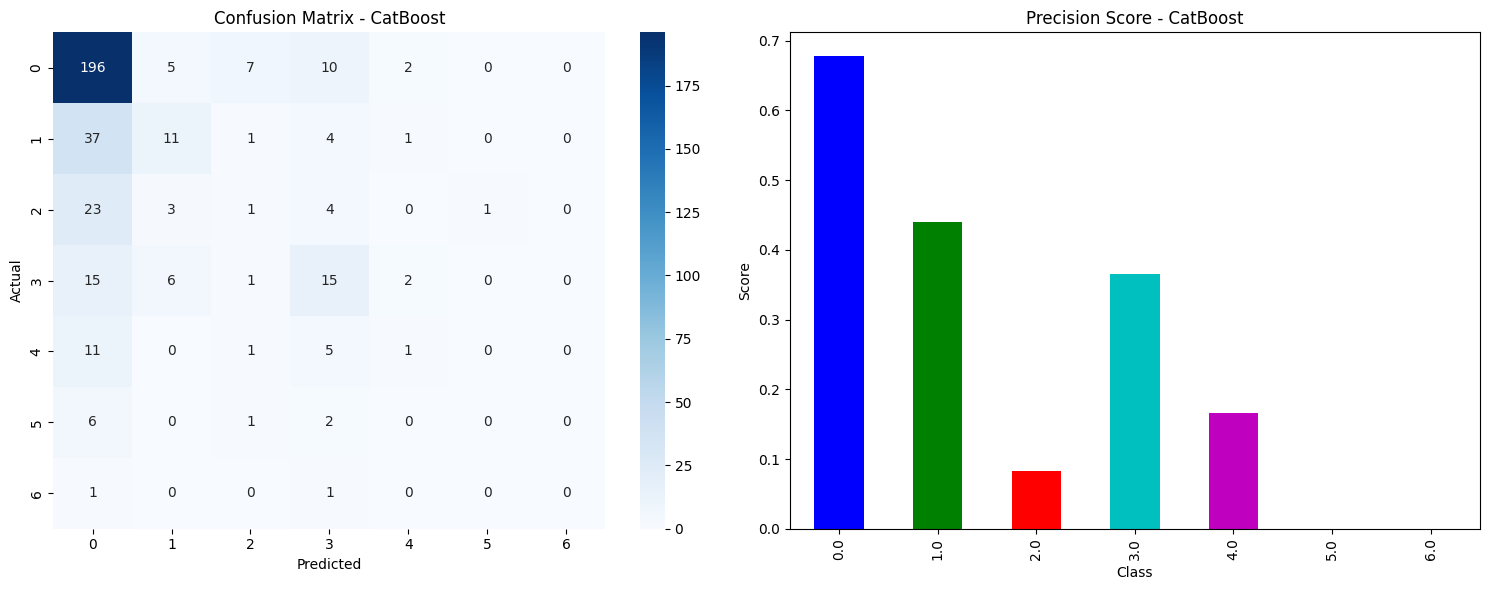

Accuracy: 0.60
Mean Squared Error (MSE): 2.37
Execution Time: 3.33 seconds


Evaluating XGBoost


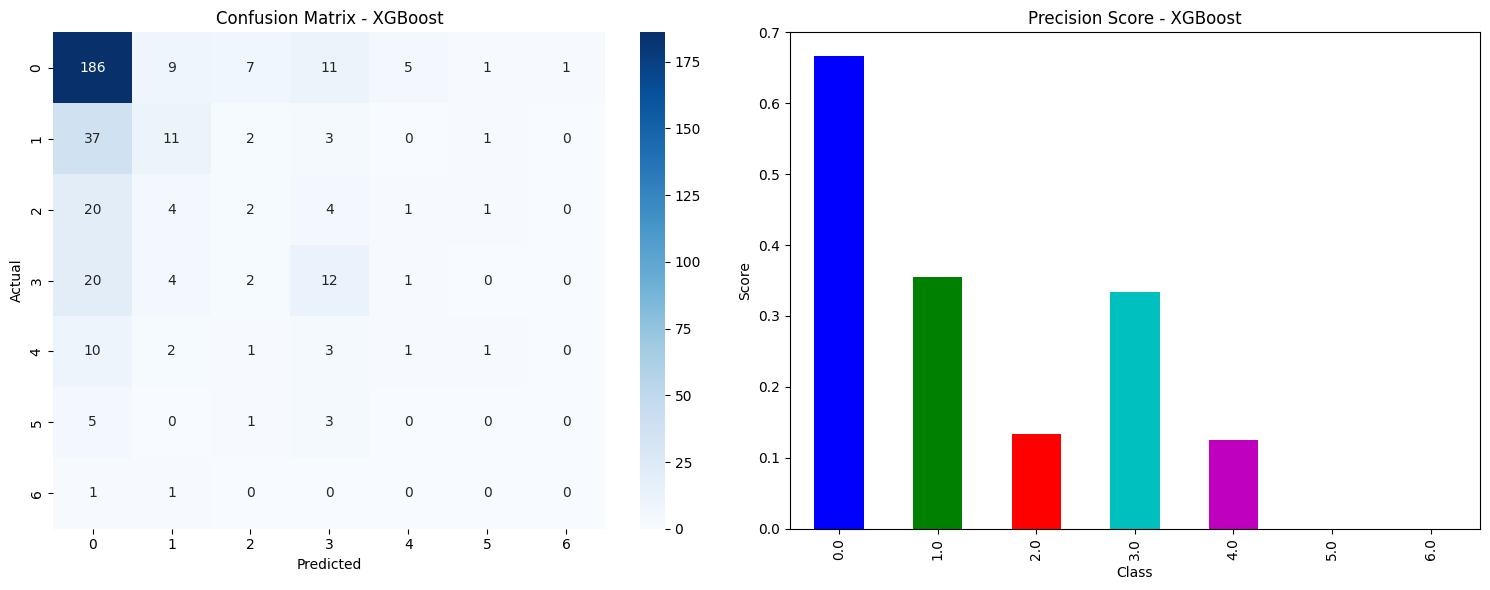

Accuracy: 0.57
Mean Squared Error (MSE): 2.77
Execution Time: 0.58 seconds


-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Random Forest


Accuracy: 0.52
Mean Squared Error (MSE): 2.80
Execution Time: 0.75 seconds


Evaluating Hierarchical Gradient Boosting


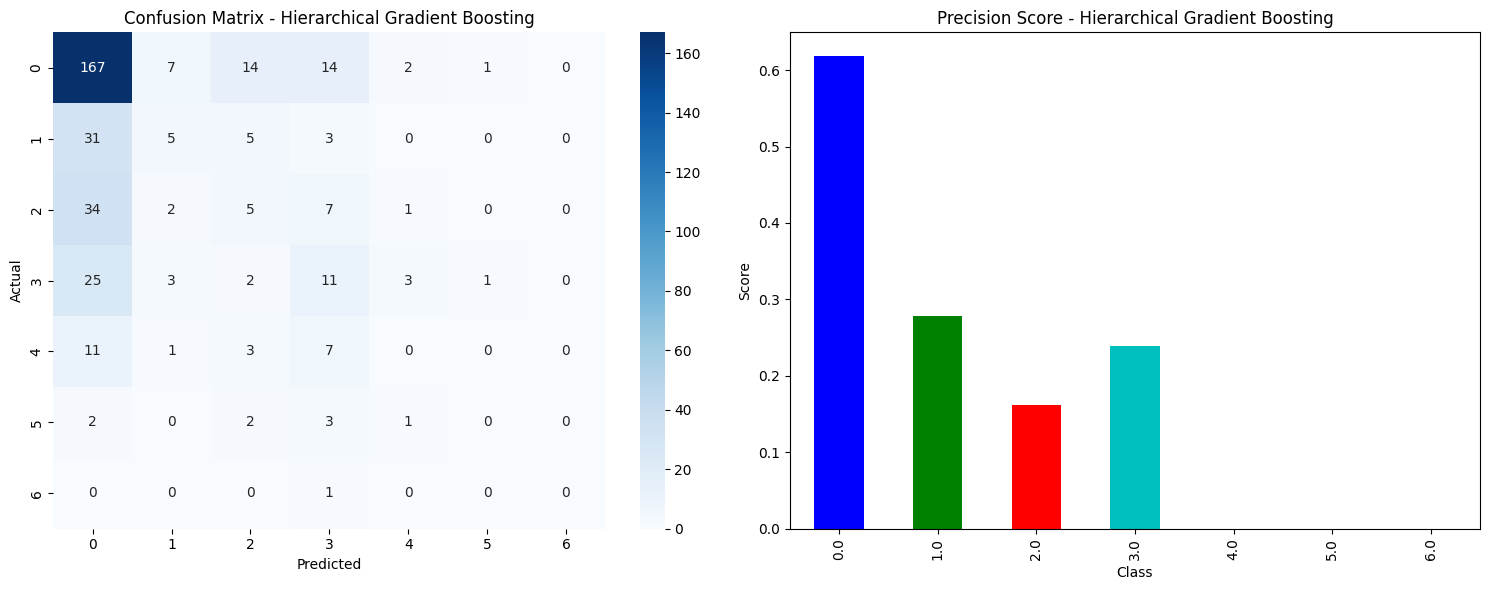

Accuracy: 0.50
Mean Squared Error (MSE): 2.63
Execution Time: 2.99 seconds


Evaluating CatBoost


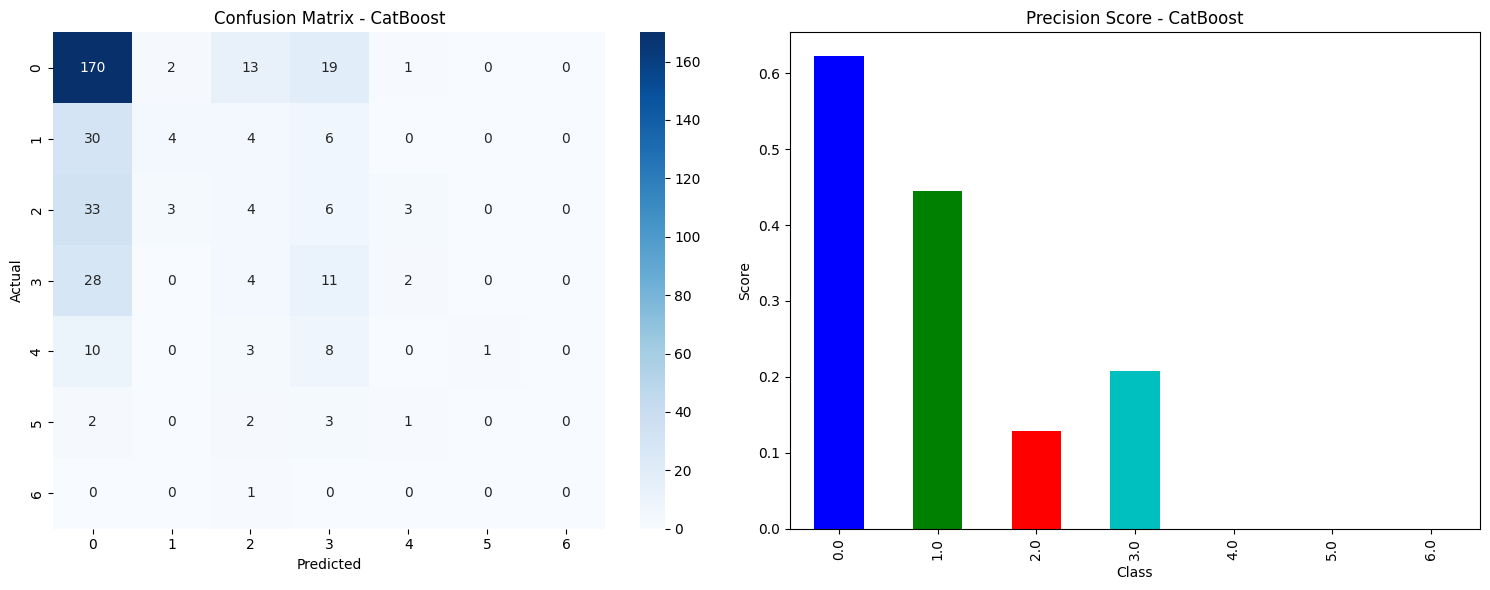

Accuracy: 0.51
Mean Squared Error (MSE): 2.64
Execution Time: 3.47 seconds


Evaluating XGBoost


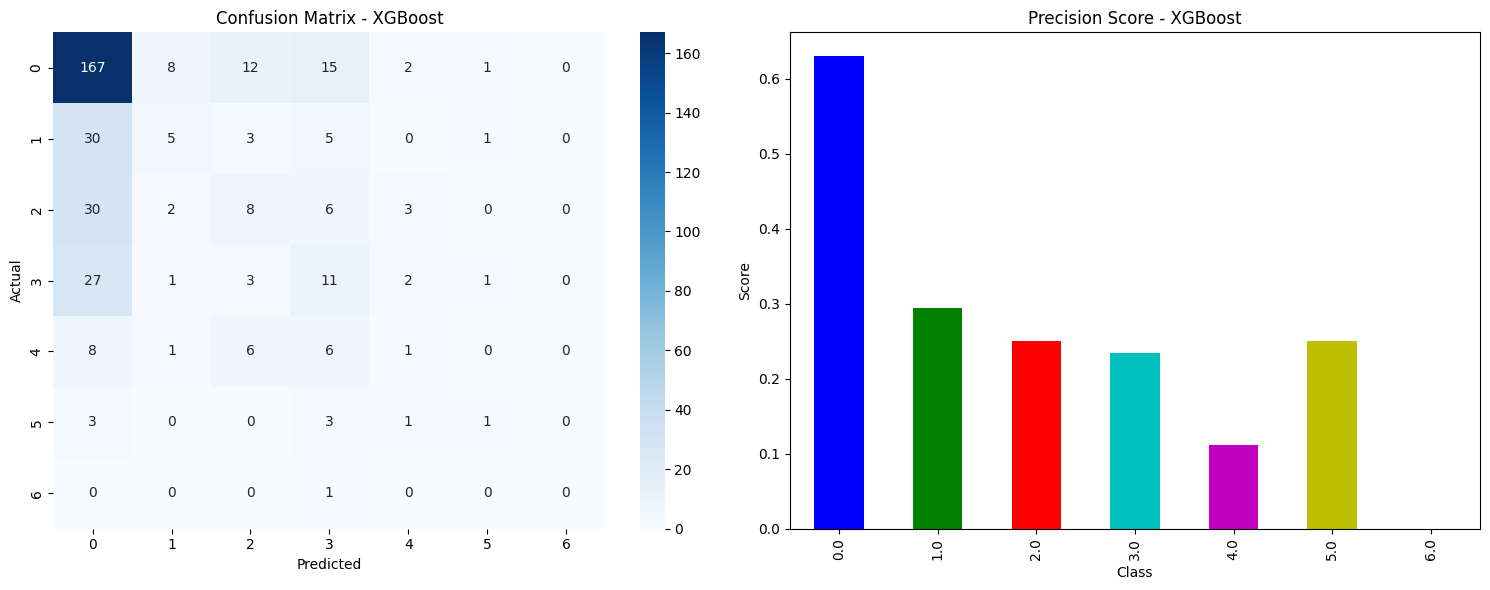

Accuracy: 0.52
Mean Squared Error (MSE): 2.61
Execution Time: 0.57 seconds




In [28]:
for target in target_columns:
    cut_dataset = dataset.copy()
    cut_dataset = cut_dataset.iloc[:, :37]
    cut_dataset[target] = dataset[target]
    run_evals(cut_dataset, target, models=best_models)    

-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Random Forest


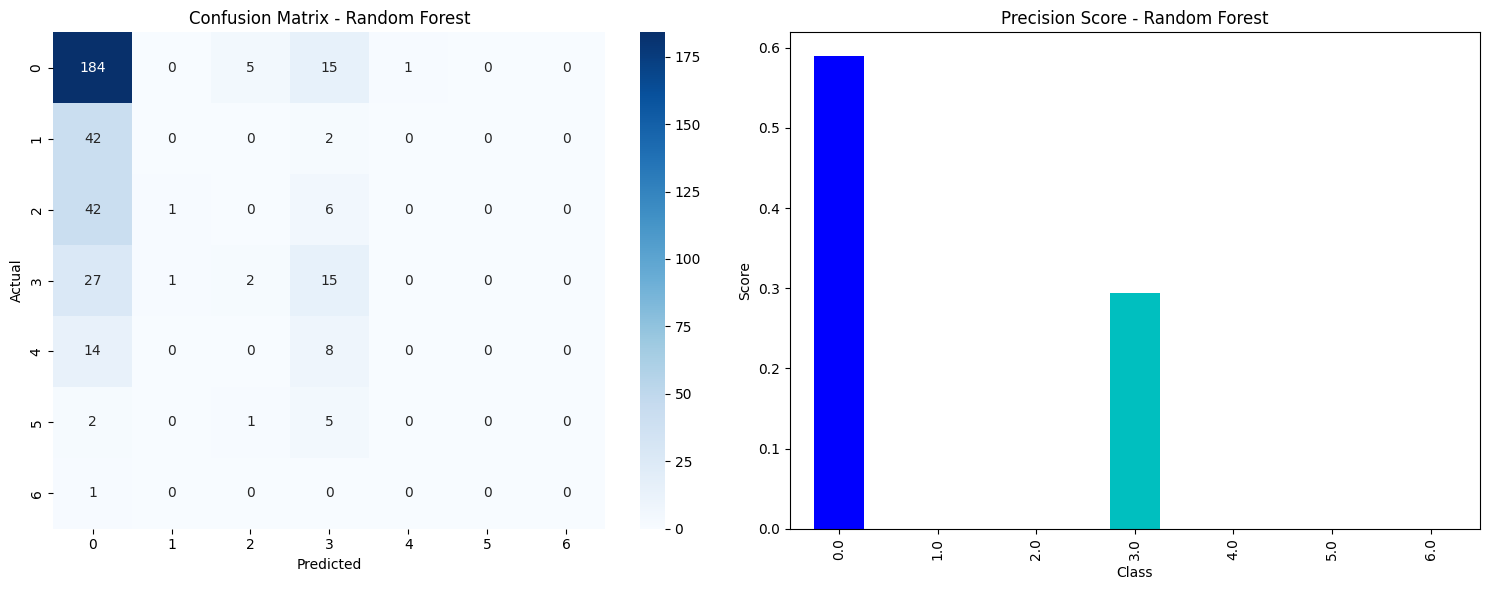

Accuracy: 0.53
Mean Squared Error (MSE): 2.65
Execution Time: 0.43 seconds


Evaluating Hierarchical Gradient Boosting


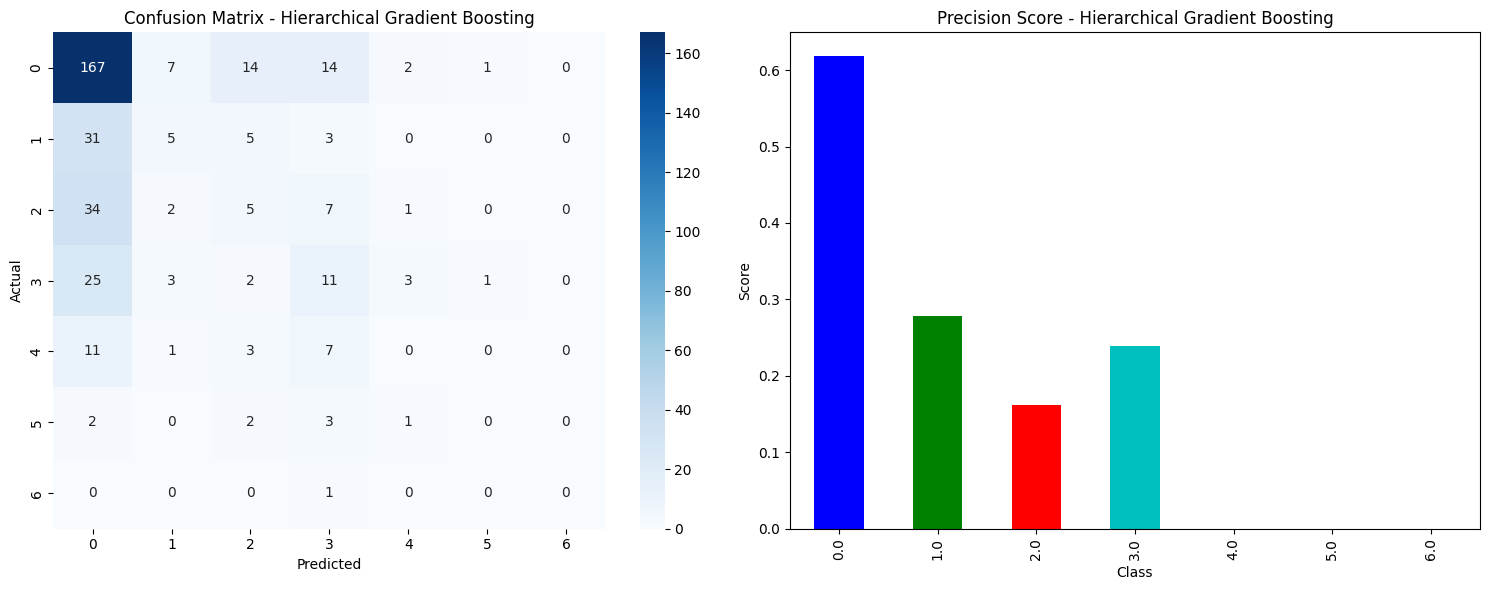

Accuracy: 0.50
Mean Squared Error (MSE): 2.63
Execution Time: 2.76 seconds


Evaluating CatBoost


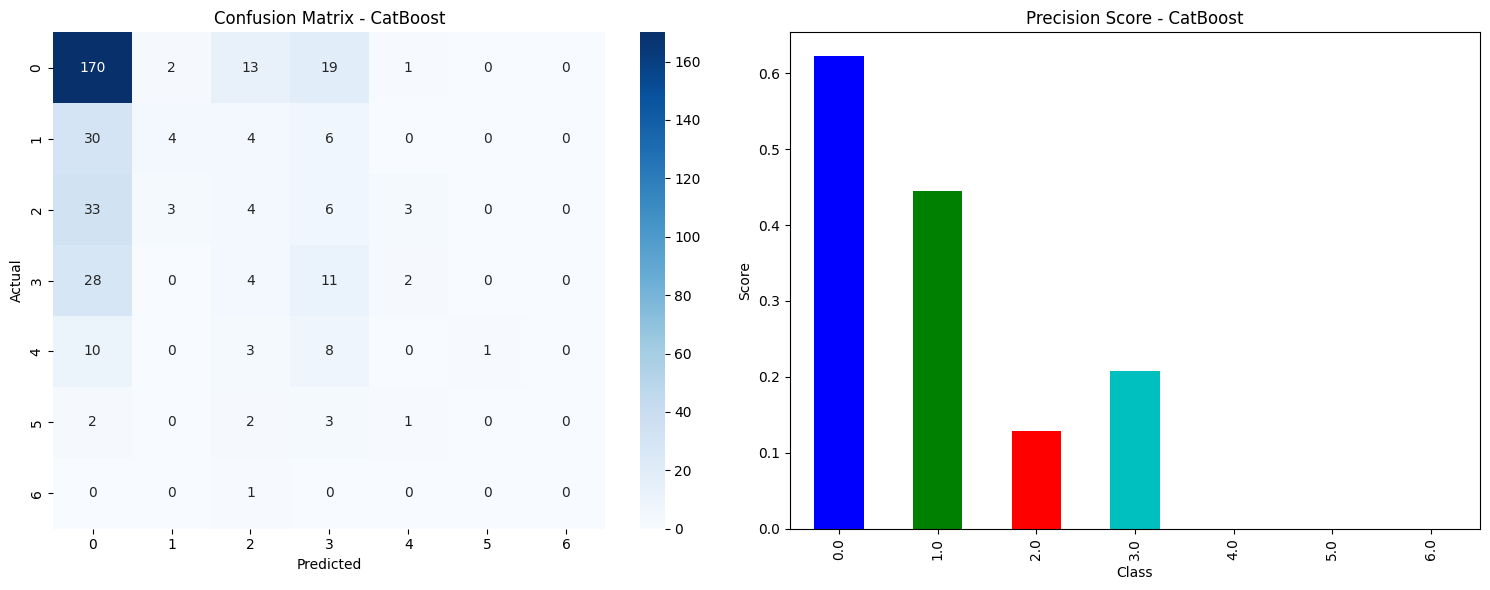

Accuracy: 0.51
Mean Squared Error (MSE): 2.64
Execution Time: 3.08 seconds


Evaluating XGBoost


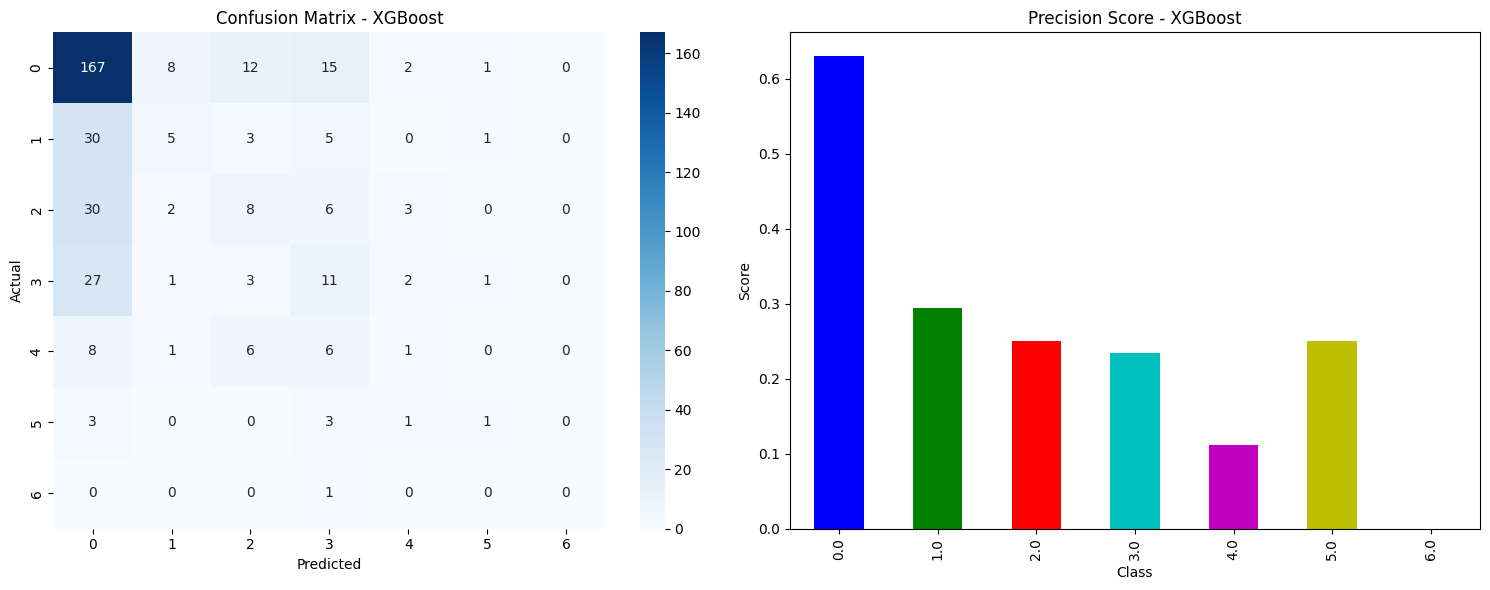

Accuracy: 0.52
Mean Squared Error (MSE): 2.61
Execution Time: 0.80 seconds




In [29]:
model_accuracy = {}
target = 'Mushrooms'
cut_dataset = dataset.copy()
cut_dataset = cut_dataset.iloc[:, :37]
cut_dataset[target] = dataset[target]
run_evals(cut_dataset, target, models=best_models)

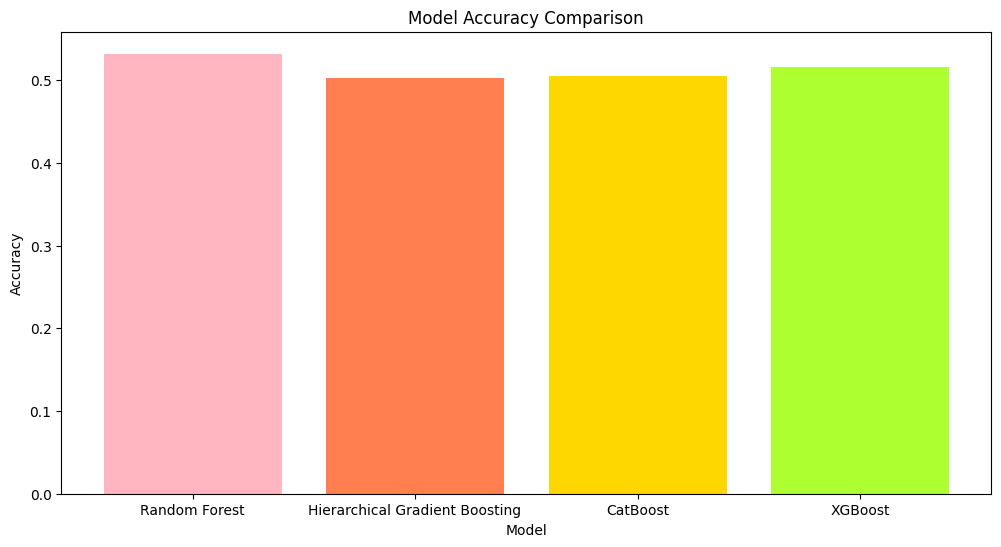

In [30]:
plt.figure(figsize=(12, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=bright_light_colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

#### **Model Comparison with Less Information**

As we can see above, all models have a lower accuracy and a higher mean squared error when using less information, which is expected.

#### **Training and Testing the Models for Different Target Values**

Now, we will change the drug columns in the dataset to predict if an individual has consumed a drug or not. We will train and test the models using the new dataset and compare their performance.

In [31]:
binary_dataset = dataset.copy()
for i in range(37, len(binary_dataset.columns)):
    binary_dataset.iloc[:, i] = binary_dataset.iloc[:, i].apply(lambda x: 1 if x > 0 else 0)

In [32]:
binary_dataset.head(10)

Age_18-24  Age_25 - 34  Age_35 - 44  Age_45 - 54  Age_55 - 64  Age_65+  \
0        0.0          0.0          1.0          0.0          0.0      0.0   
1        0.0          1.0          0.0          0.0          0.0      0.0   
2        0.0          0.0          1.0          0.0          0.0      0.0   
3        1.0          0.0          0.0          0.0          0.0      0.0   
4        0.0          0.0          1.0          0.0          0.0      0.0   
5        0.0          0.0          0.0          0.0          0.0      1.0   
6        0.0          0.0          0.0          1.0          0.0      0.0   
7        0.0          0.0          1.0          0.0          0.0      0.0   
8        0.0          0.0          1.0          0.0          0.0      0.0   
9        0.0          0.0          0.0          0.0          1.0      0.0   

   Gender_Female  Education_Doctorate Degree  \
0            1.0                         0.0   
1            0.0                         1.0   
2            0.0                         0.0   
3            1.0                         0.0   
4            1.0                         1.0   
5            1.0                         0.0   
6            0.0                         0.0   
7            0.0                         0.0   
8            1.0                         0.0   
9            0.0                         0.0   

   Education_Left School Before 16 years  Education_Left School at 16 years  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                0.0   
4                                    0.0                                0.0   
5                                    0.0                                0.0   
6                                    0.0                                0.0   
7                                    0.0                                1.0   
8                                    0.0                                0.0   
9                                    0.0                                0.0   

   ...  Crack  Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  \
0  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        0.0   
1  ...    0.0      1.0     0.0       1.0     0.0  1.0   1.0        0.0   
2  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        1.0   
3  ...    0.0      0.0     0.0       1.0     0.0  0.0   0.0        0.0   
4  ...    0.0      1.0     0.0       0.0     1.0  0.0   0.0        1.0   
5  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        0.0   
6  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        0.0   
7  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        0.0   
8  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        0.0   
9  ...    0.0      0.0     0.0       0.0     0.0  0.0   0.0        0.0   

   Nicotine  VSA  
0       1.0  0.0  
1       1.0  0.0  
2       0.0  0.0  
3       1.0  0.0  
4       1.0  0.0  
5       1.0  0.0  
6       1.0  0.0  
7       0.0  0.0  
8       1.0  0.0  
9       1.0  0.0  

[10 rows x 55 columns]

In [33]:
new_best_models = best_models.copy()

new_best_models['XGBoost'] = XGBClassifier(is_fitted=True)

-------------------------------------------------------------------- Cannabis --------------------------------------------------------------------


Evaluating Random Forest


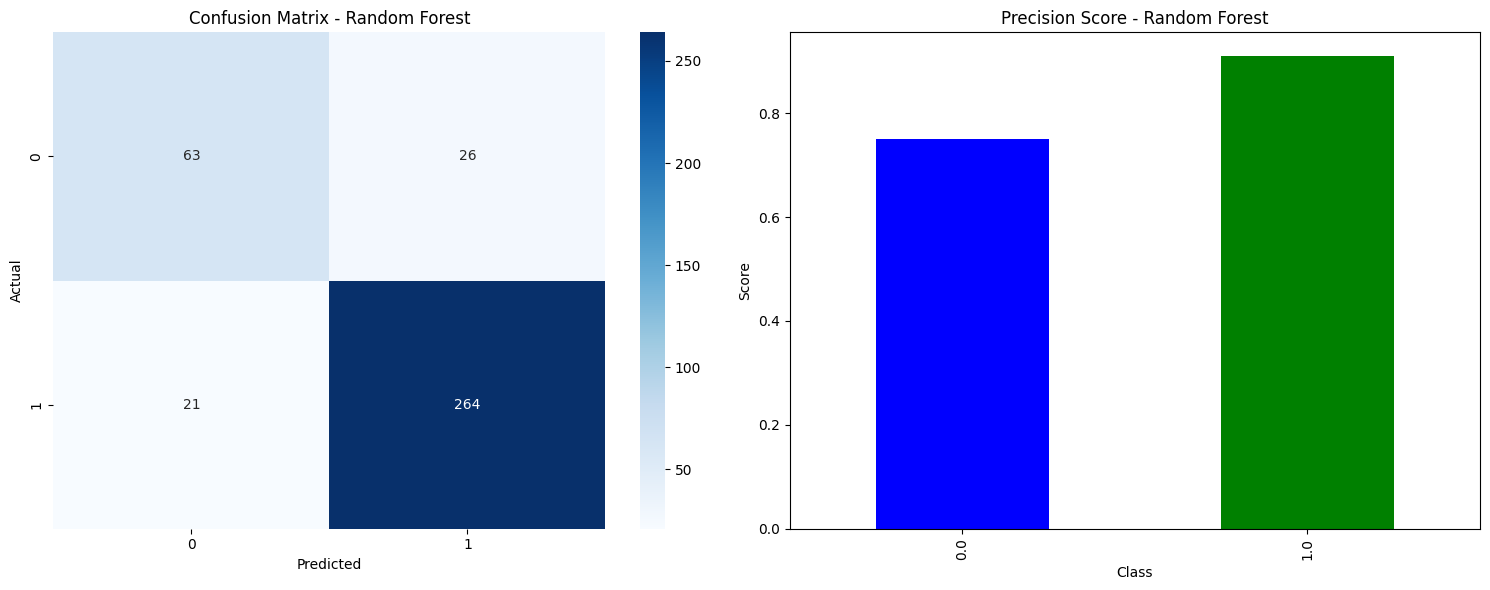

Accuracy: 0.87
Mean Squared Error (MSE): 0.13
Execution Time: 0.30 seconds


Evaluating Hierarchical Gradient Boosting


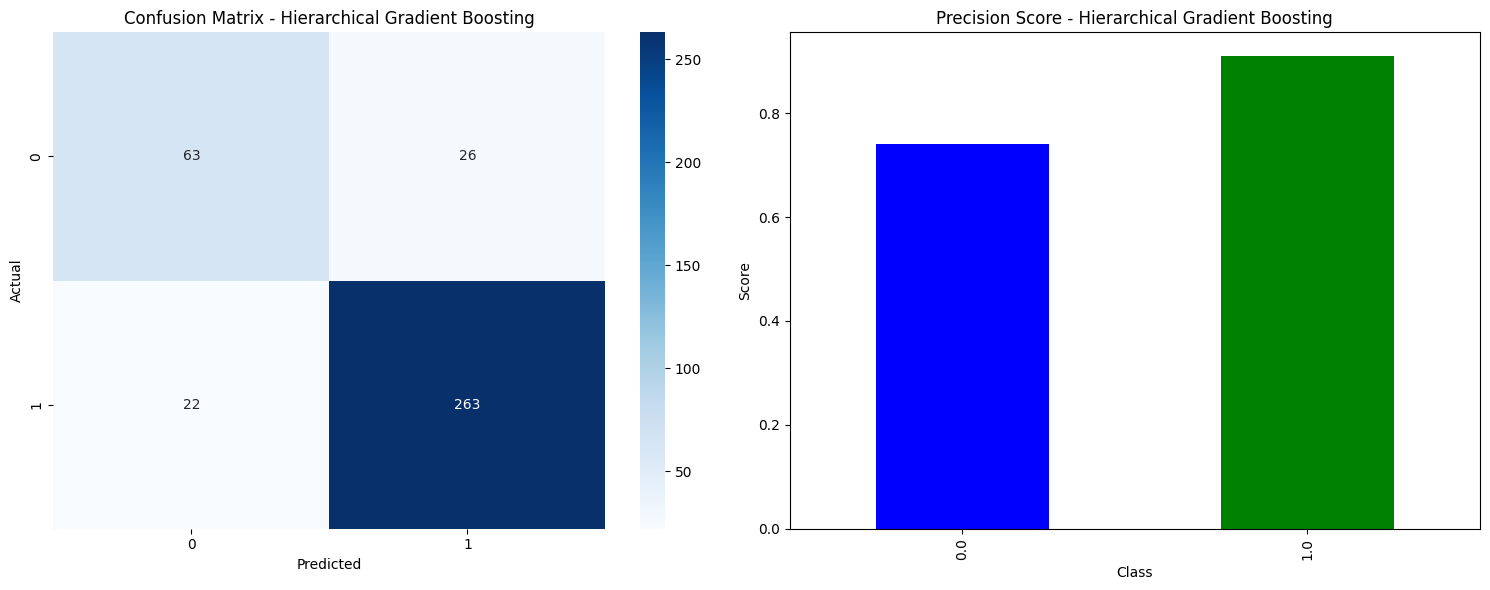

Accuracy: 0.87
Mean Squared Error (MSE): 0.13
Execution Time: 0.36 seconds


Evaluating CatBoost


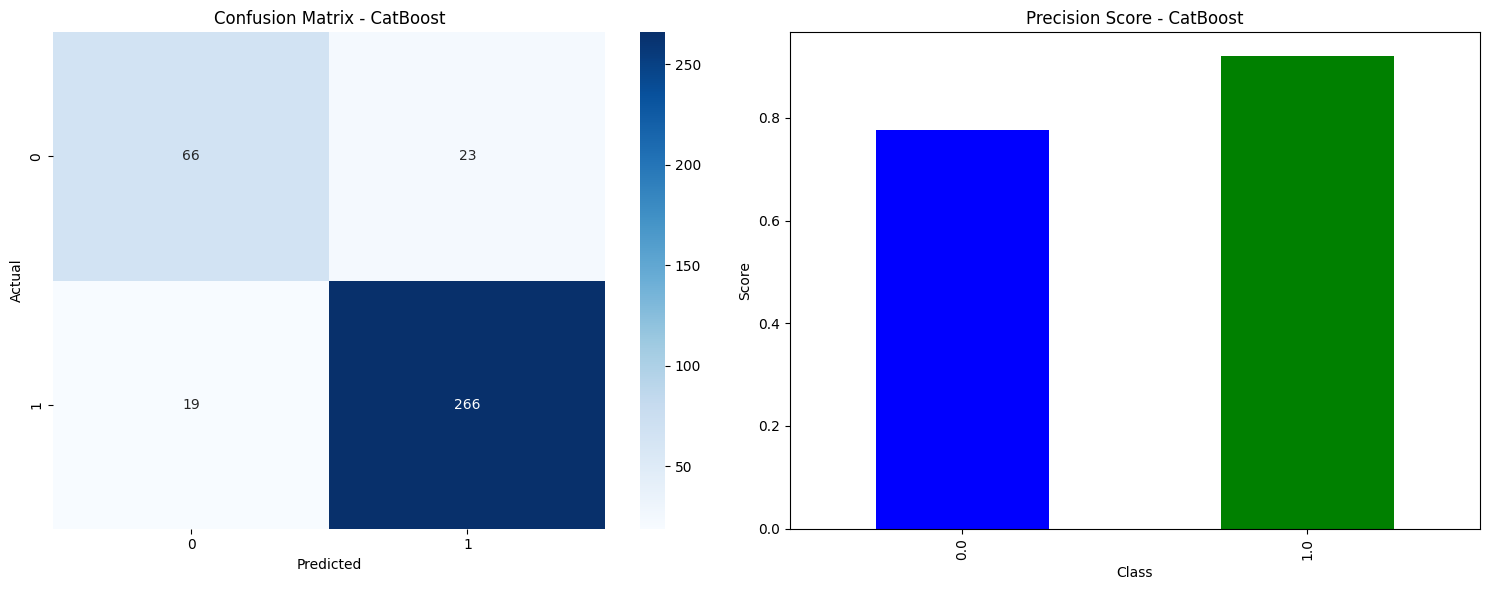

Accuracy: 0.89
Mean Squared Error (MSE): 0.11
Execution Time: 2.74 seconds


Evaluating XGBoost


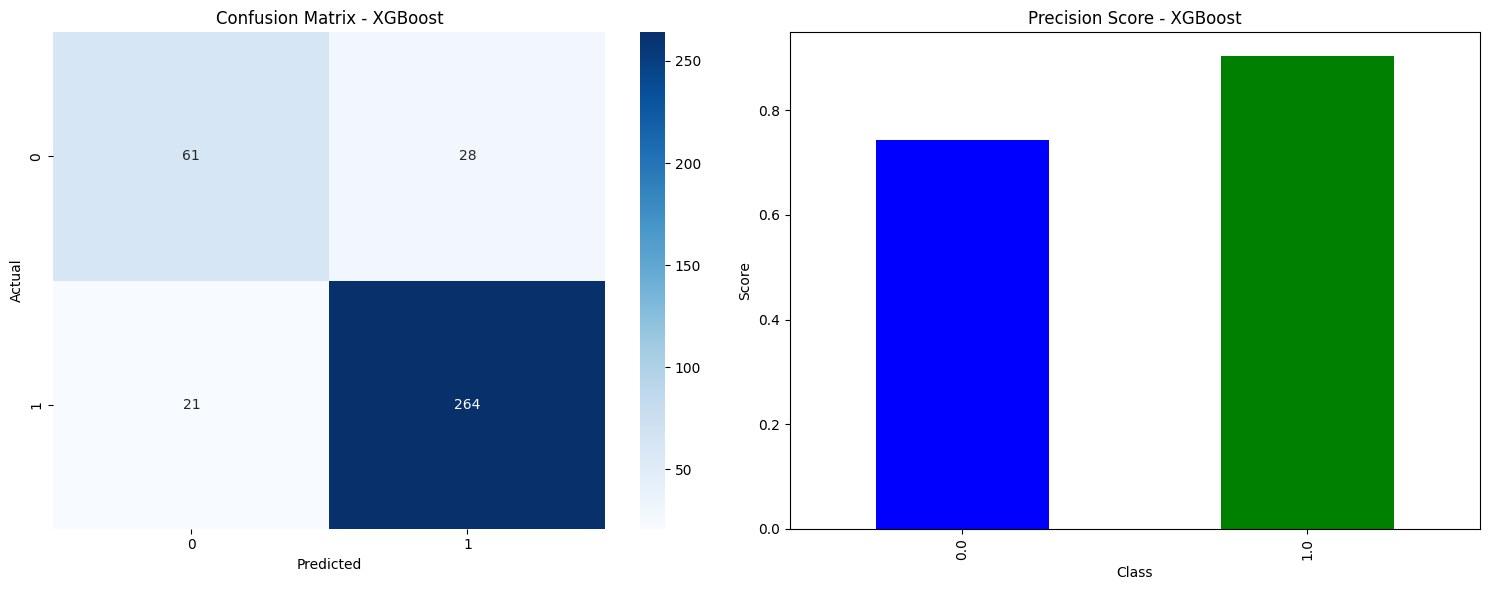

Accuracy: 0.87
Mean Squared Error (MSE): 0.13
Execution Time: 0.14 seconds


-------------------------------------------------------------------- LSD --------------------------------------------------------------------


Evaluating Random Forest


Accuracy: 0.84
Mean Squared Error (MSE): 0.16
Execution Time: 0.32 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.84
Mean Squared Error (MSE): 0.16
Execution Time: 0.36 seconds


Evaluating CatBoost


Accuracy: 0.82
Mean Squared Error (MSE): 0.18
Execution Time: 2.43 seconds


Evaluating XGBoost


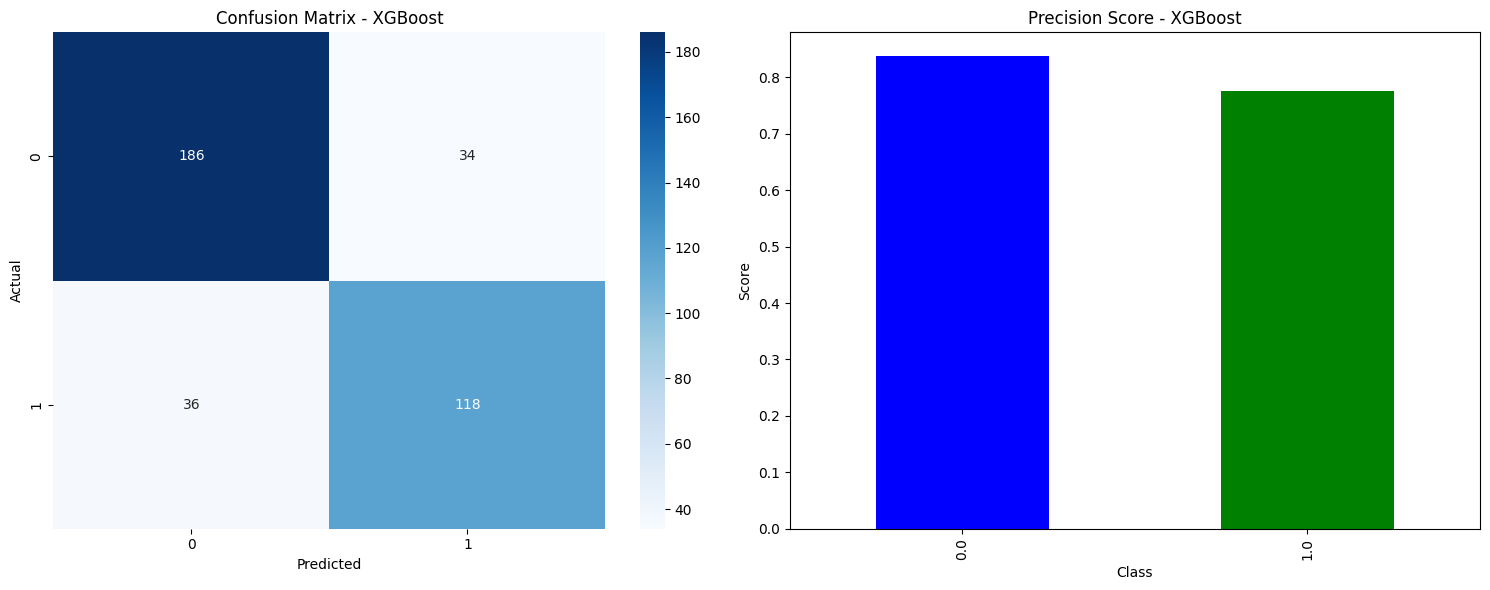

Accuracy: 0.81
Mean Squared Error (MSE): 0.19
Execution Time: 0.15 seconds


-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Random Forest


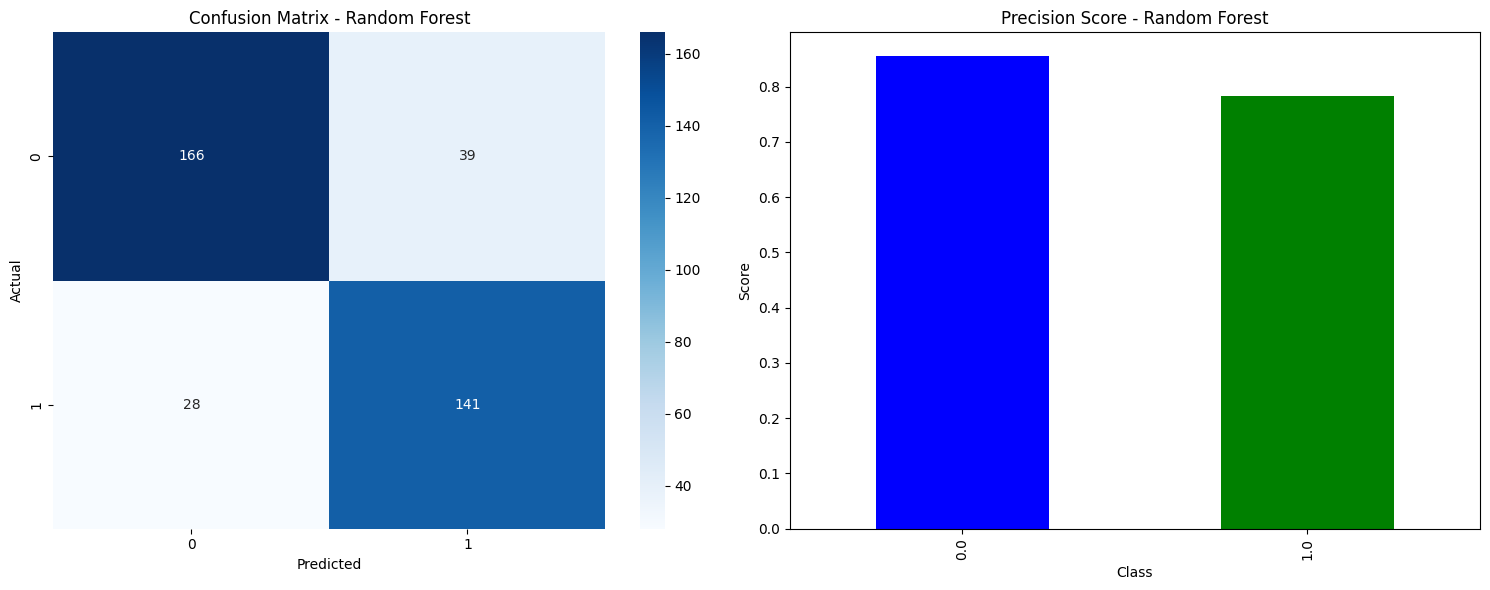

Accuracy: 0.82
Mean Squared Error (MSE): 0.18
Execution Time: 0.31 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.81
Mean Squared Error (MSE): 0.19
Execution Time: 0.69 seconds


Evaluating CatBoost


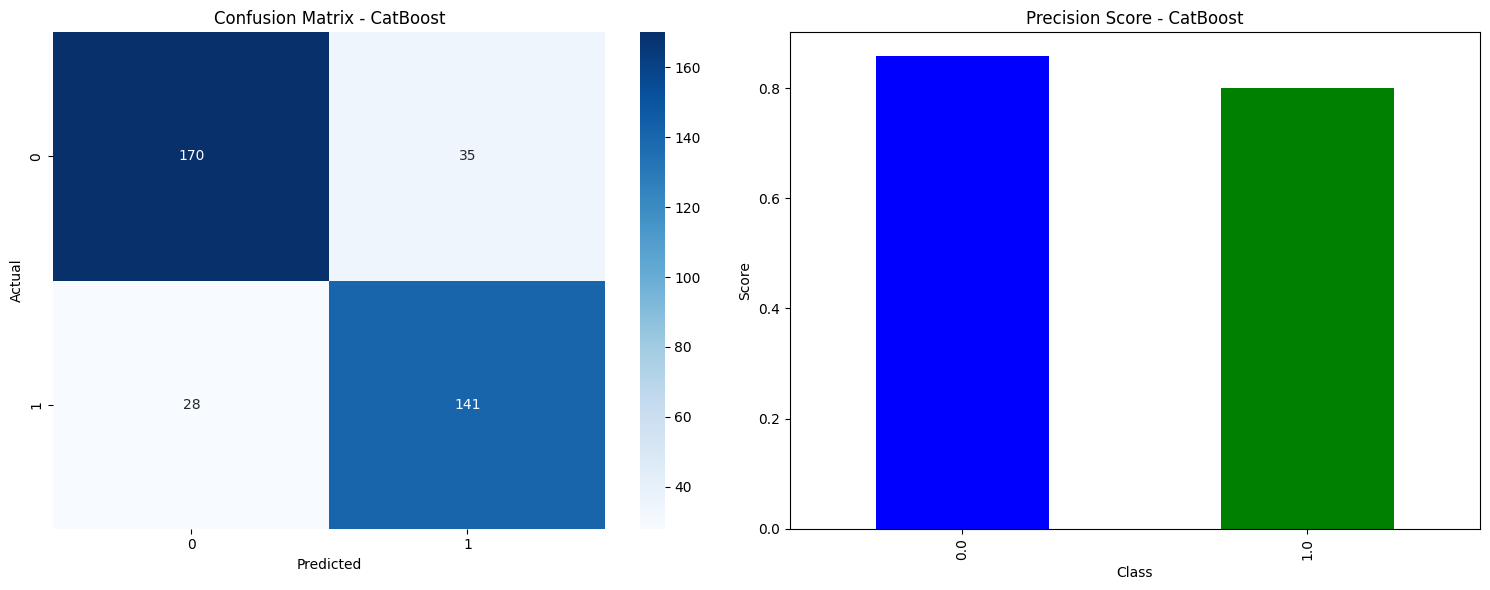

Accuracy: 0.83
Mean Squared Error (MSE): 0.17
Execution Time: 2.49 seconds


Evaluating XGBoost


Accuracy: 0.80
Mean Squared Error (MSE): 0.20
Execution Time: 0.14 seconds




In [34]:
for target in target_columns:
    run_evals(binary_dataset, target, new_best_models)

-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Random Forest


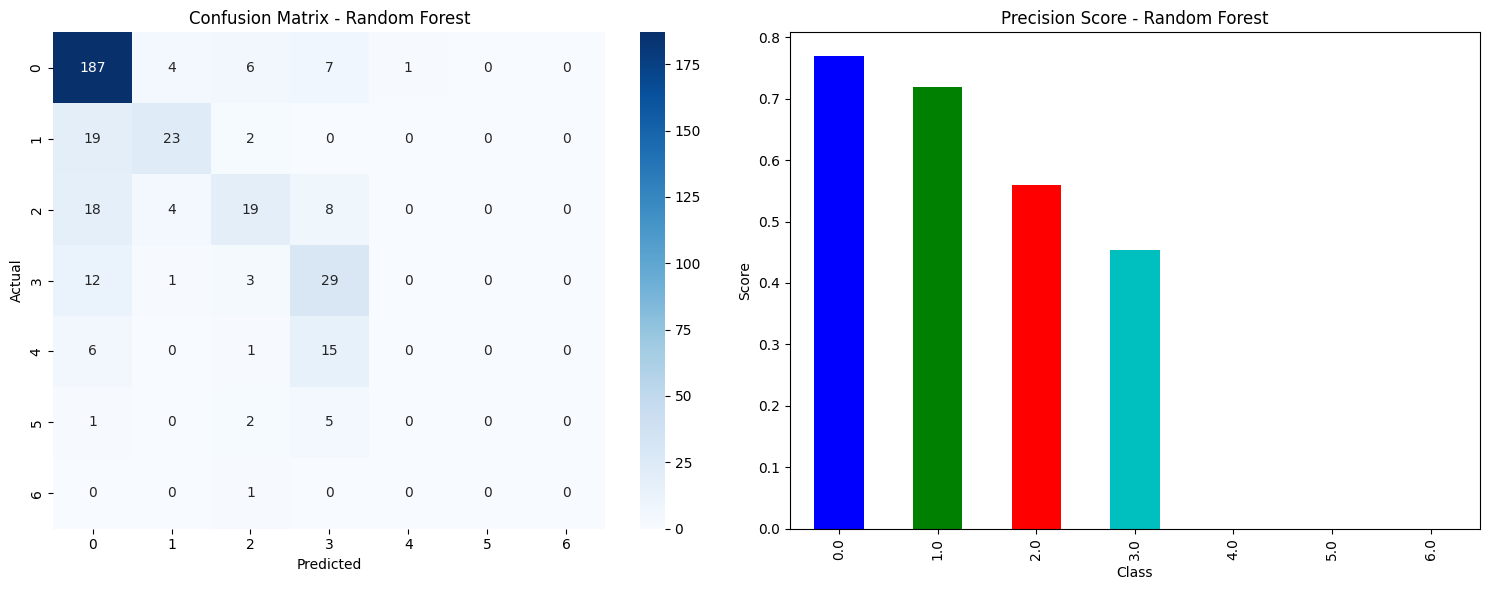

Accuracy: 0.69
Mean Squared Error (MSE): 1.39
Execution Time: 0.39 seconds


Evaluating Hierarchical Gradient Boosting


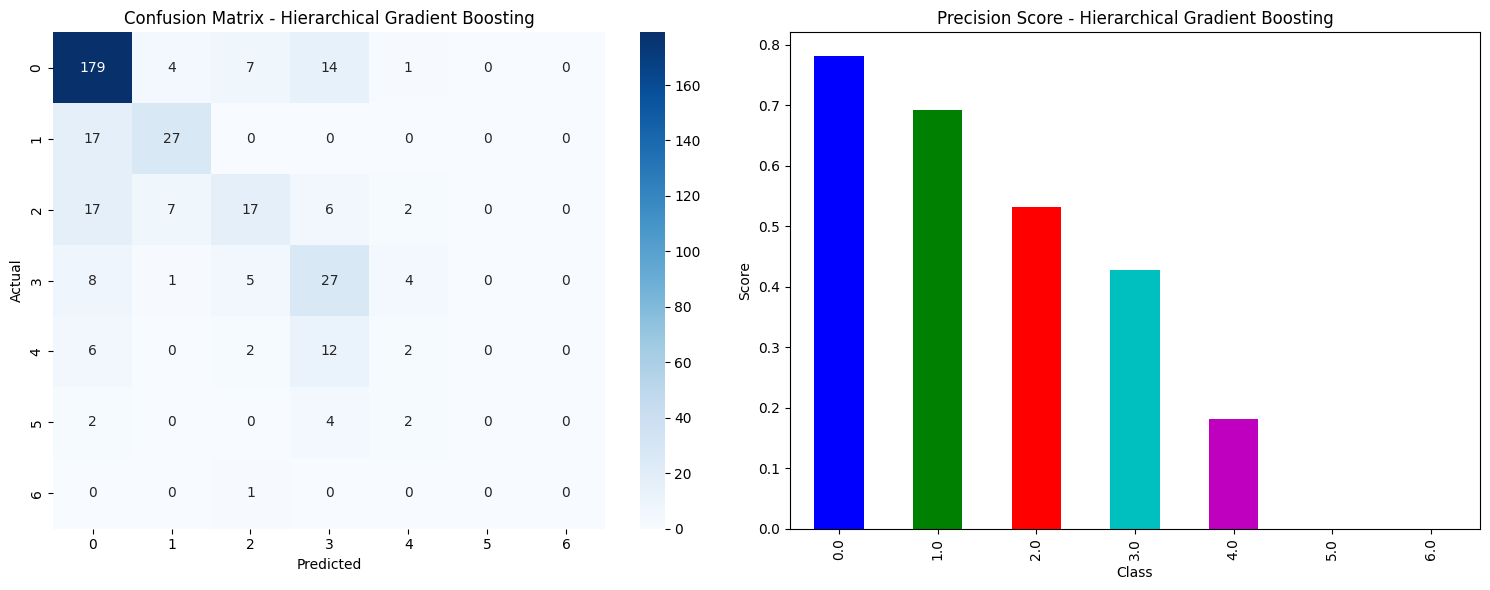

Accuracy: 0.67
Mean Squared Error (MSE): 1.51
Execution Time: 3.01 seconds


Evaluating CatBoost


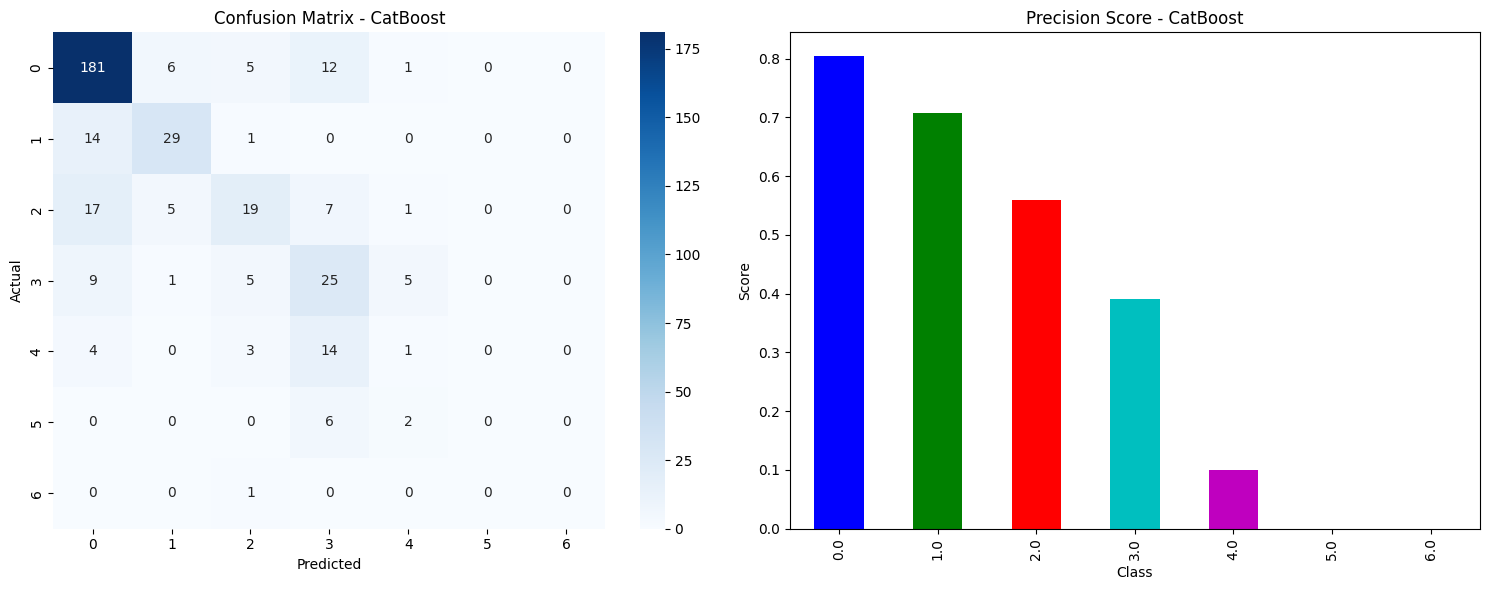

Accuracy: 0.68
Mean Squared Error (MSE): 1.27
Execution Time: 3.91 seconds


Evaluating XGBoost


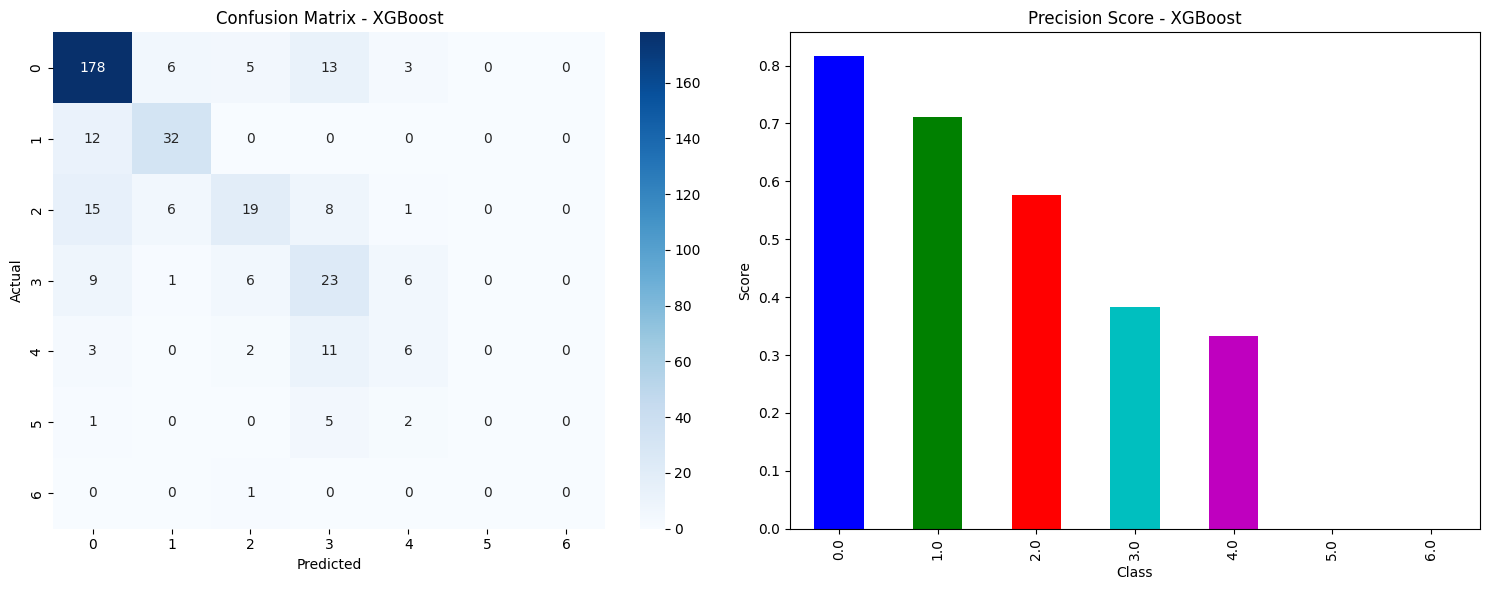

Accuracy: 0.69
Mean Squared Error (MSE): 1.36
Execution Time: 0.60 seconds




In [35]:
model_accuracy = {}
target = 'Mushrooms'

run_evals(dataset, target, models=best_models)

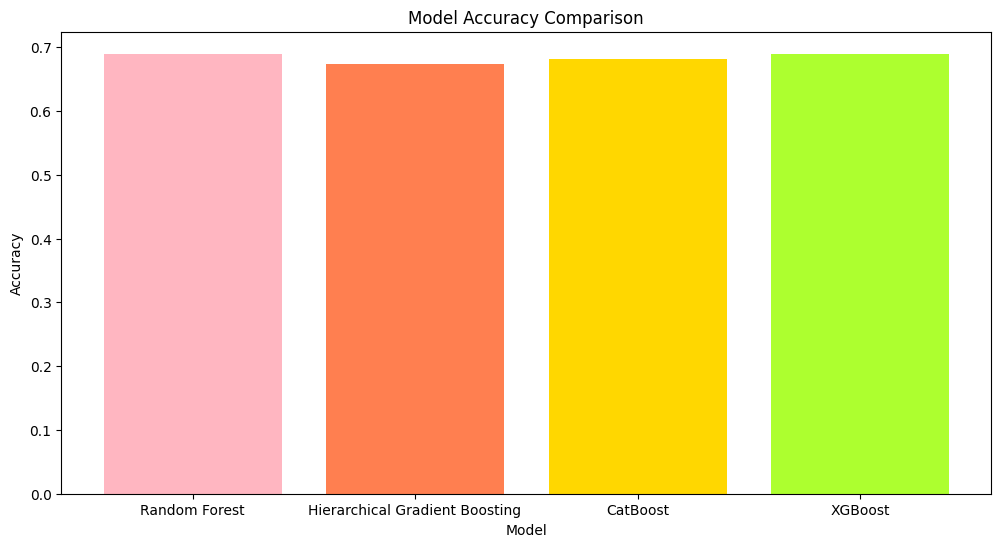

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=bright_light_colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

#### **Model Comparison for Different Target Values with Less Information**

Now, we will train and test the best models with less information to predict if an individual has consumed a drug or not.

-------------------------------------------------------------------- Mushrooms --------------------------------------------------------------------


Evaluating Random Forest


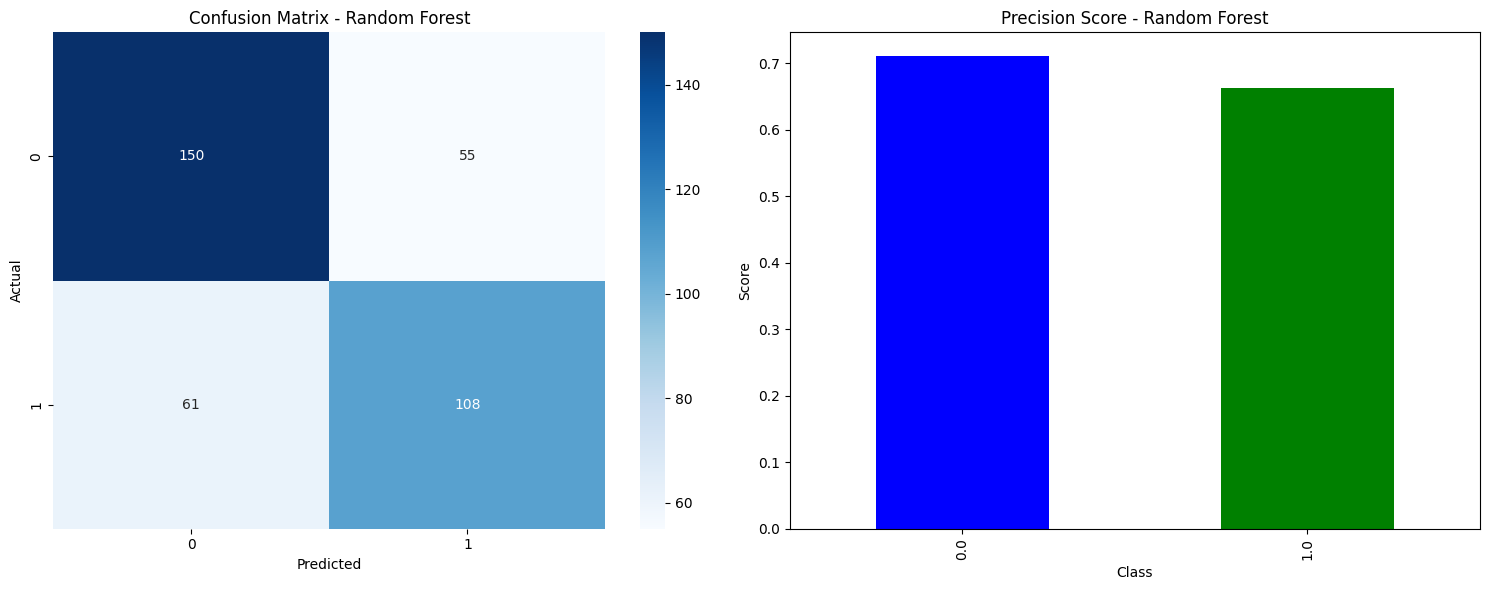

Accuracy: 0.69
Mean Squared Error (MSE): 0.31
Execution Time: 0.42 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.65
Mean Squared Error (MSE): 0.35
Execution Time: 0.32 seconds


Evaluating CatBoost


Accuracy: 0.70
Mean Squared Error (MSE): 0.30
Execution Time: 1.72 seconds


Evaluating XGBoost


Accuracy: 0.64
Mean Squared Error (MSE): 0.36
Execution Time: 0.13 seconds




In [37]:
model_accuracy = {}
target = 'Mushrooms'
cut_dataset = binary_dataset.copy()
cut_dataset = cut_dataset.iloc[:, :37]
cut_dataset[target] = binary_dataset[target]

run_evals(cut_dataset, target, new_best_models)

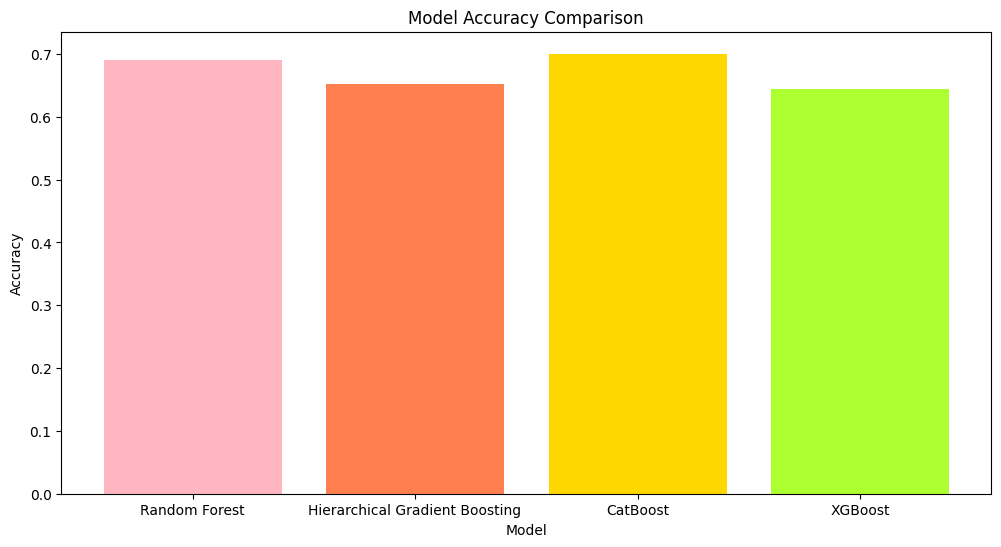

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=bright_light_colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

As expected, the accuracy of the models is lower when predicting if an individual has consumed a drug or not using less information.

#### **Model Comparison for Different Target Values**

As expected, the models have a much higher accuracy and a lower mean squared error when predicting if an individual has consumed a drug or not. The best model seems to be CatBoost, because it tends to have the highest accuracy and the lowest mean squared error.

#### **Training and Testing Models with Target Variables that are Hard to Predict**

Now, we will use the original dataset and the new dataset, but change the target column to columns that have low correlation with the rest of the features.

Using the original dataset:

-------------------------------------------------------------------- Alcohol --------------------------------------------------------------------


Evaluating Random Forest


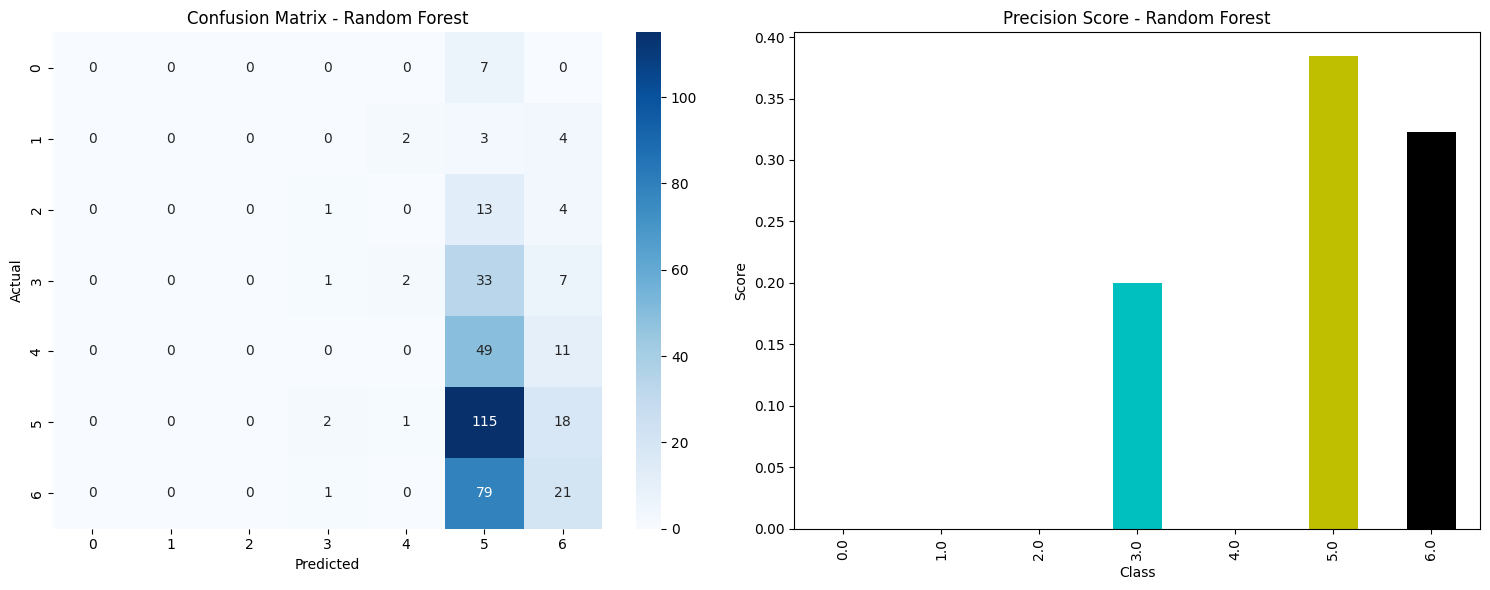

Accuracy: 0.37
Mean Squared Error (MSE): 2.48
Execution Time: 0.58 seconds


Evaluating Hierarchical Gradient Boosting


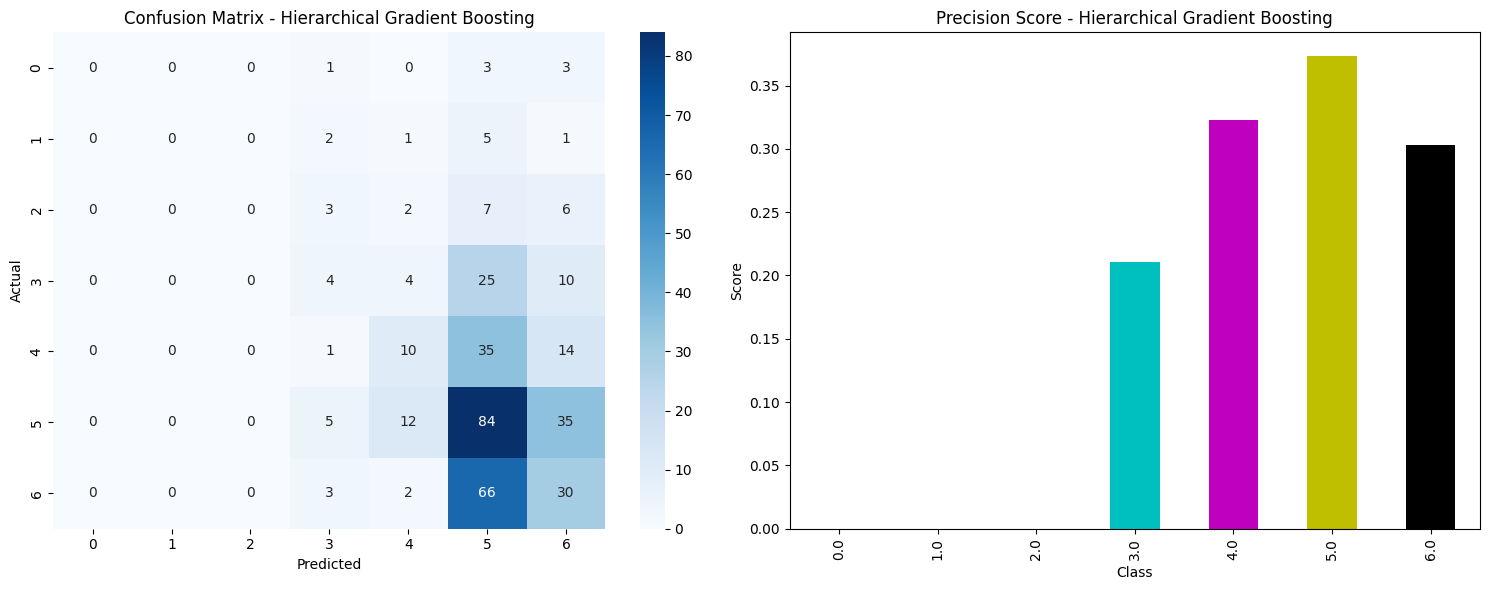

Accuracy: 0.34
Mean Squared Error (MSE): 2.51
Execution Time: 3.42 seconds


Evaluating CatBoost


Accuracy: 0.34
Mean Squared Error (MSE): 2.56
Execution Time: 5.70 seconds


Evaluating XGBoost


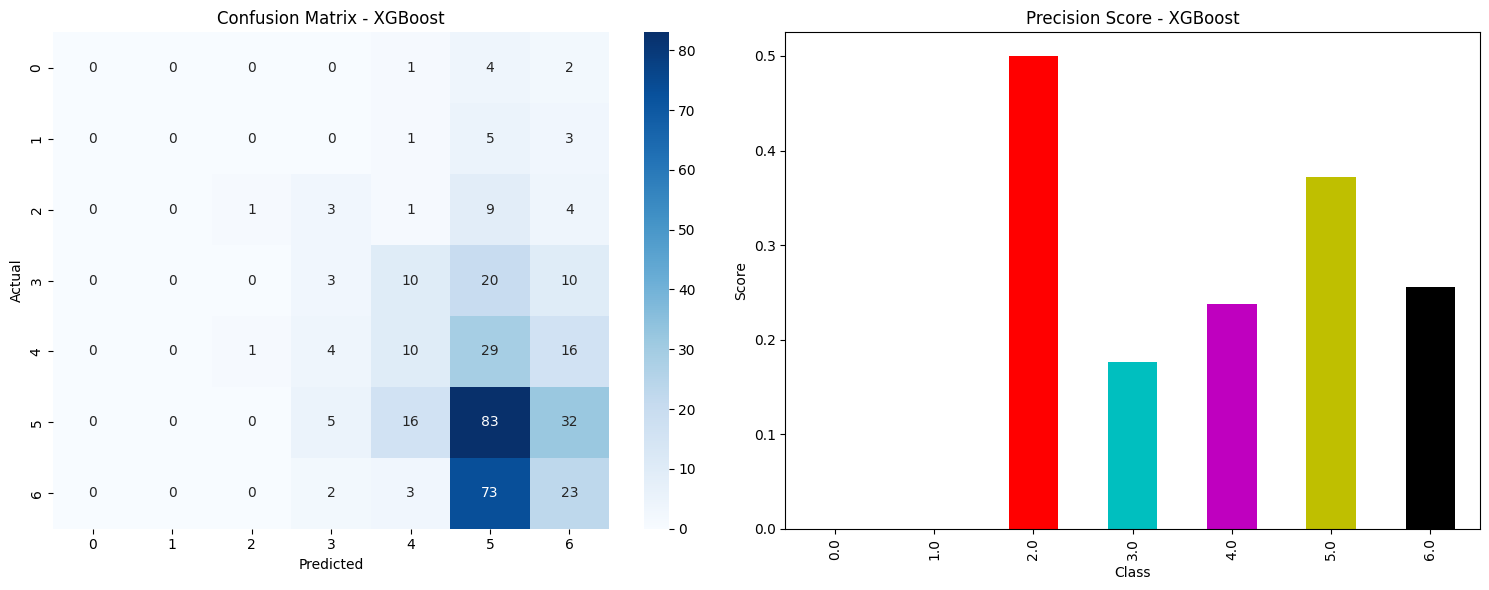

Accuracy: 0.32
Mean Squared Error (MSE): 2.56
Execution Time: 2.17 seconds


-------------------------------------------------------------------- Caff --------------------------------------------------------------------


Evaluating Random Forest


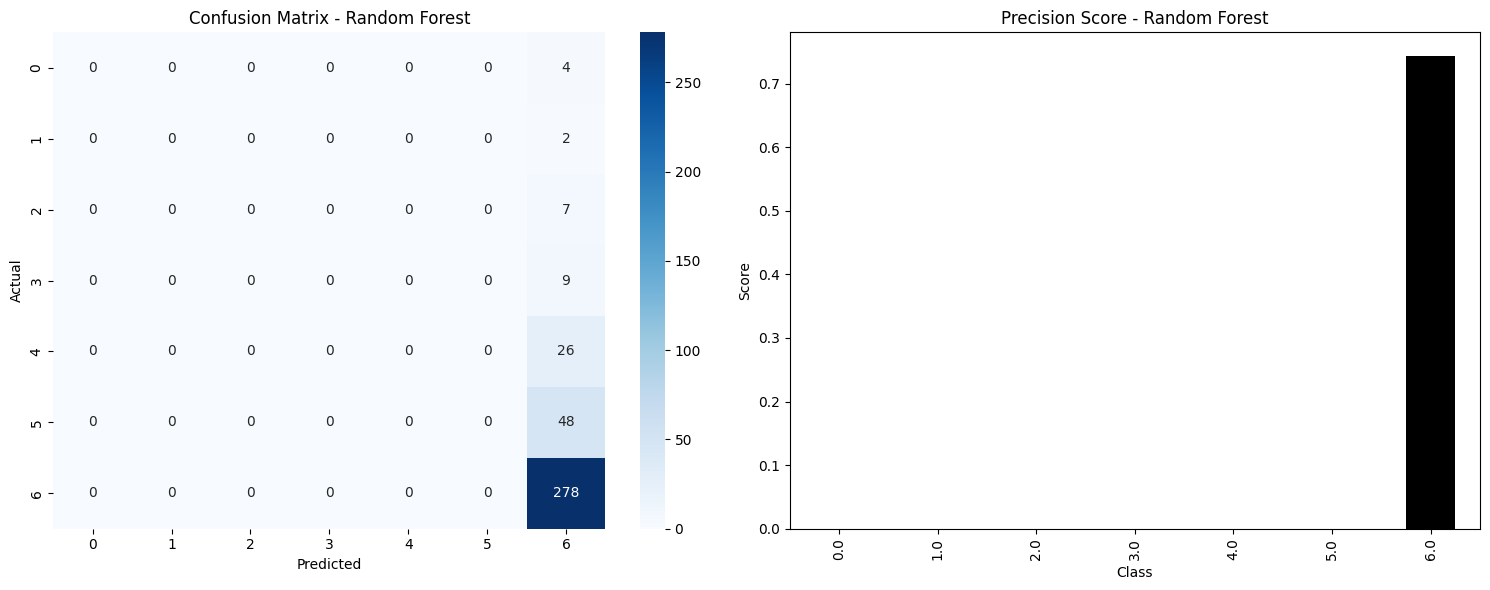

Accuracy: 0.74
Mean Squared Error (MSE): 1.44
Execution Time: 0.71 seconds


Evaluating Hierarchical Gradient Boosting


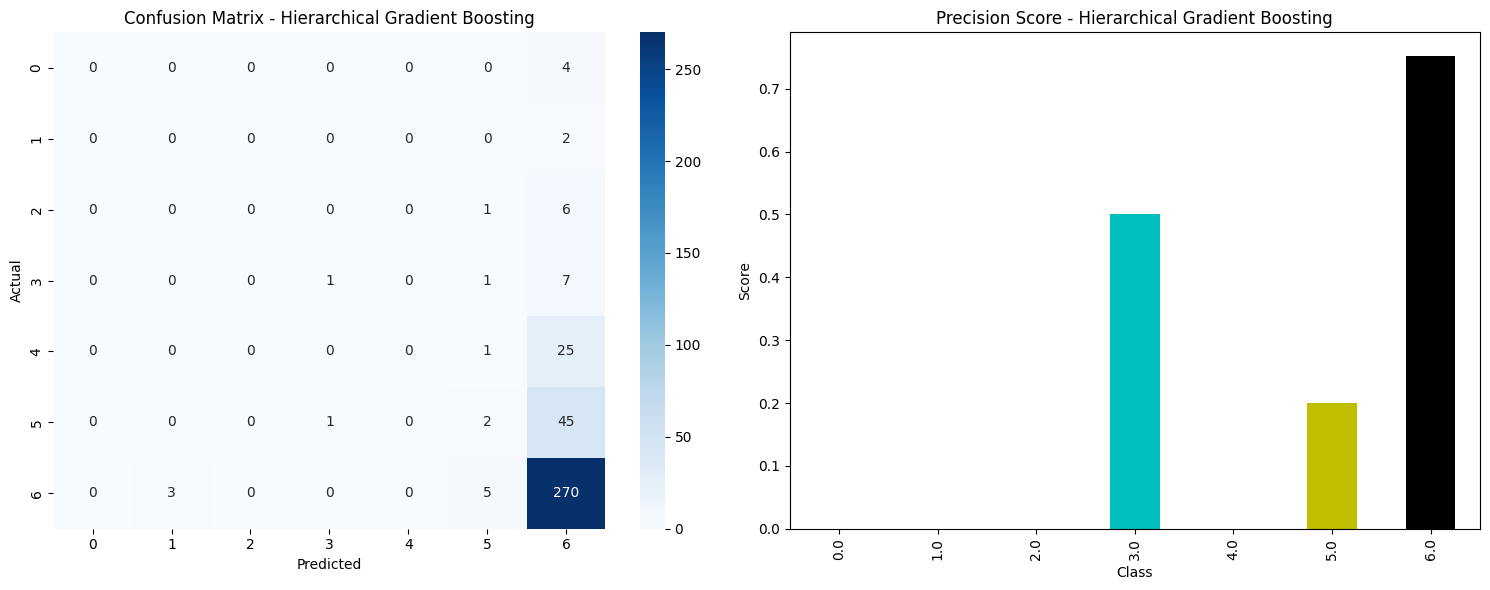

Accuracy: 0.73
Mean Squared Error (MSE): 1.59
Execution Time: 4.71 seconds


Evaluating CatBoost


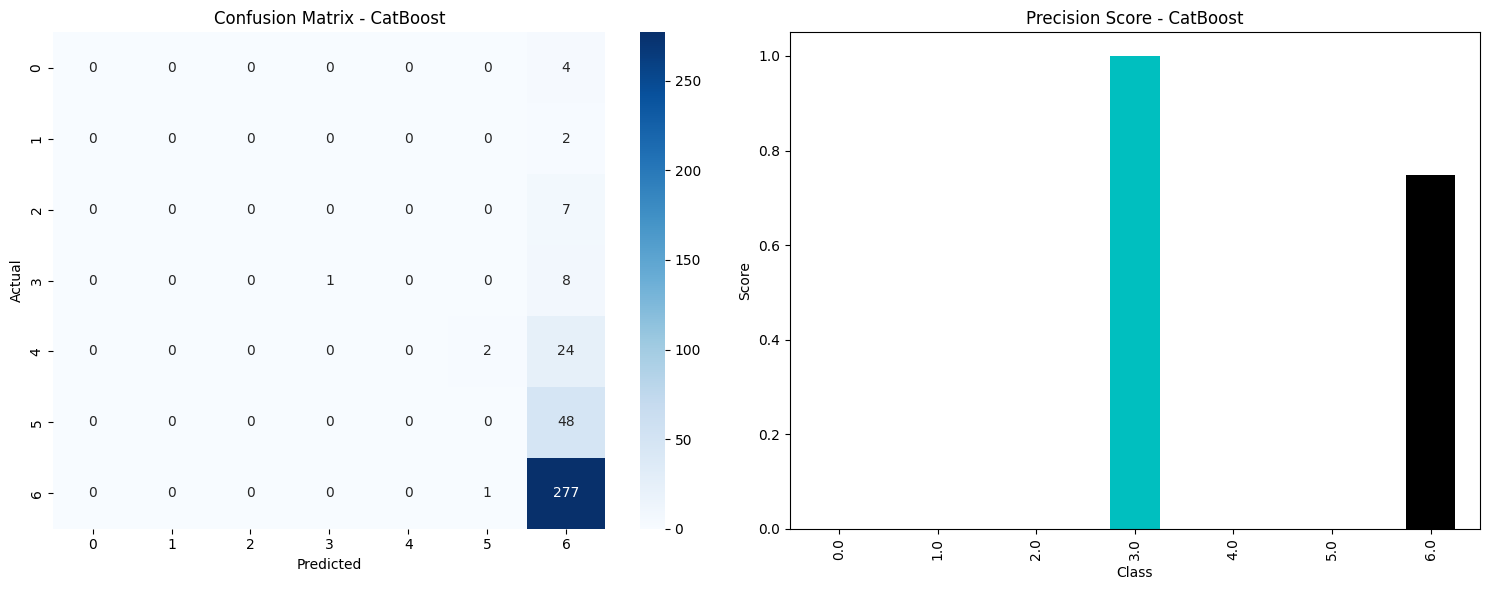

Accuracy: 0.74
Mean Squared Error (MSE): 1.40
Execution Time: 5.97 seconds


Evaluating XGBoost


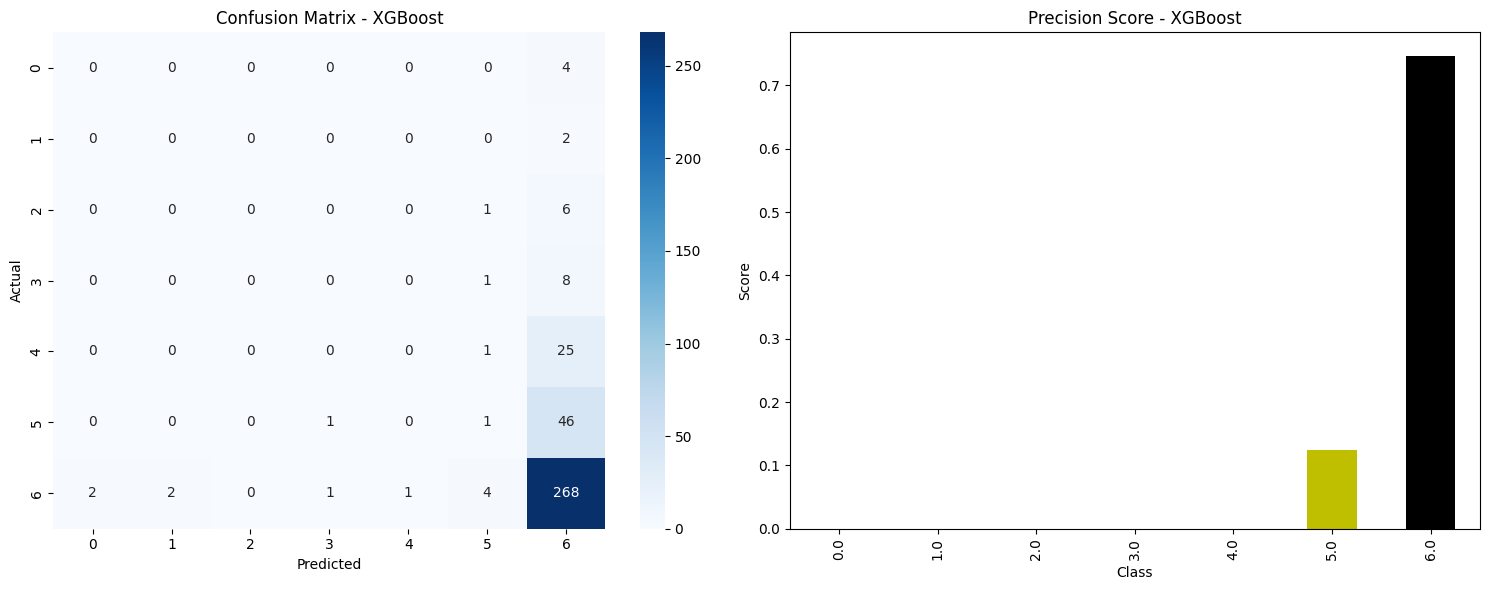

Accuracy: 0.72
Mean Squared Error (MSE): 1.78
Execution Time: 0.94 seconds


-------------------------------------------------------------------- Choc --------------------------------------------------------------------


Evaluating Random Forest


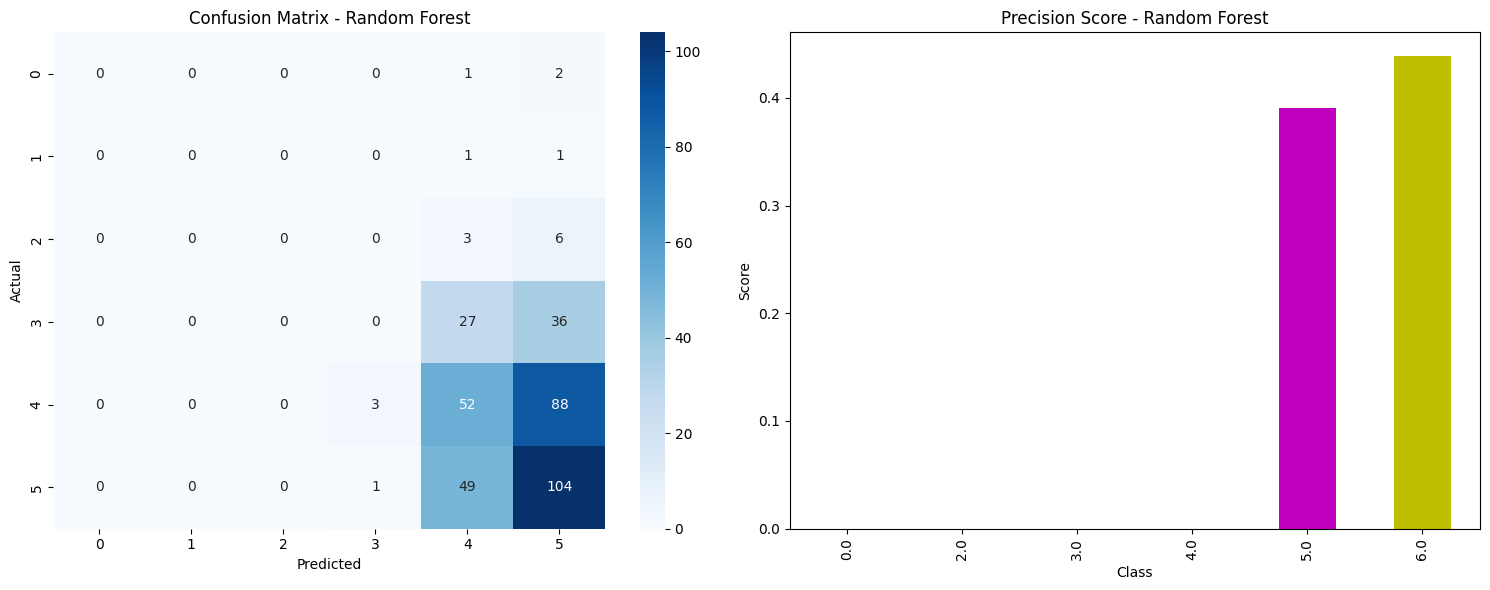

Accuracy: 0.42
Mean Squared Error (MSE): 1.34
Execution Time: 0.68 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.39
Mean Squared Error (MSE): 1.42
Execution Time: 3.66 seconds


Evaluating CatBoost


Accuracy: 0.39
Mean Squared Error (MSE): 1.31
Execution Time: 4.74 seconds


Evaluating XGBoost


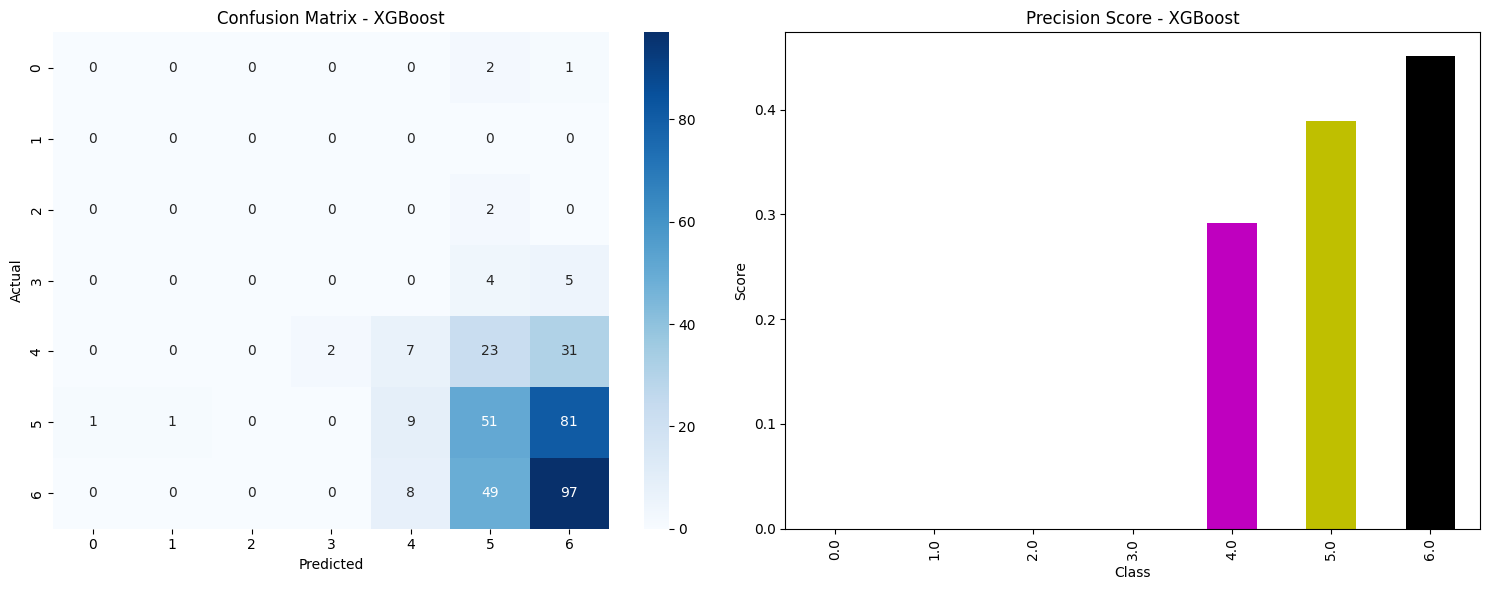

Accuracy: 0.41
Mean Squared Error (MSE): 1.41
Execution Time: 0.72 seconds




In [39]:
new_target_columns = ['Alcohol', 'Caff', 'Choc']

for target in new_target_columns:
    run_evals(dataset, target, models=best_models)

Using the new dataset:

-------------------------------------------------------------------- Alcohol --------------------------------------------------------------------


Evaluating Random Forest


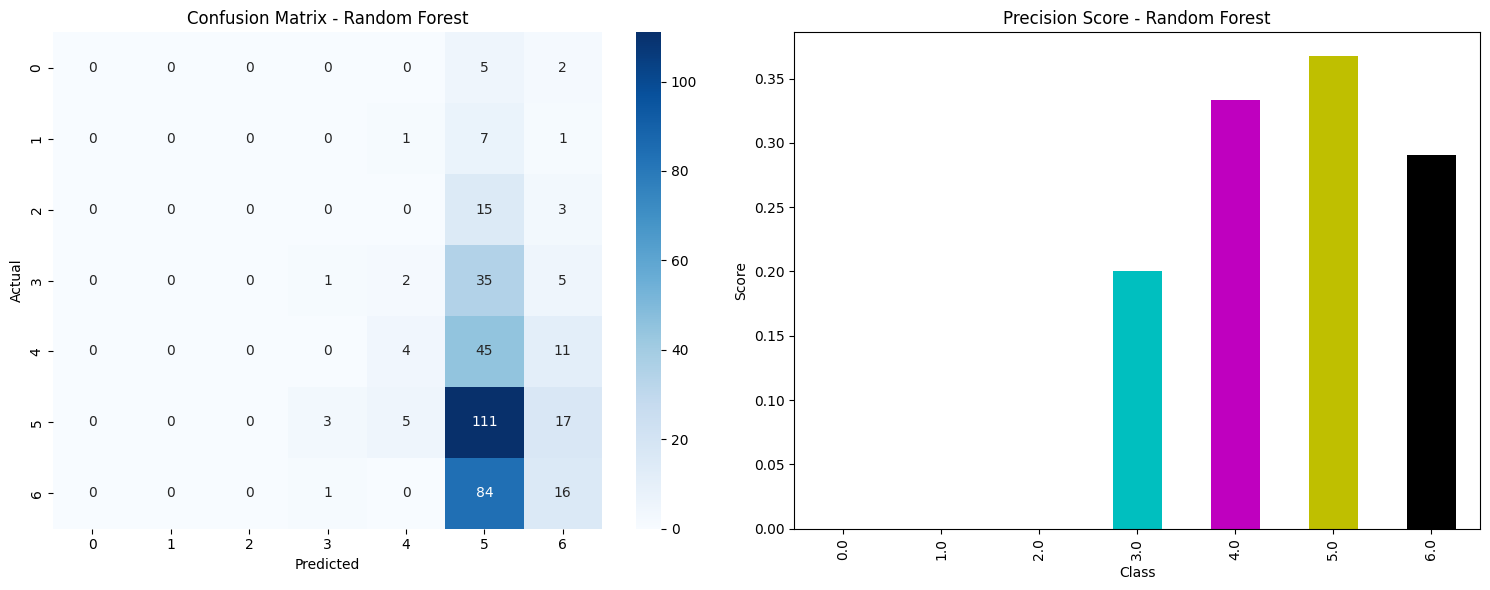

Accuracy: 0.35
Mean Squared Error (MSE): 2.48
Execution Time: 0.47 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.33
Mean Squared Error (MSE): 2.67
Execution Time: 3.18 seconds


Evaluating CatBoost


Accuracy: 0.33
Mean Squared Error (MSE): 2.83
Execution Time: 3.55 seconds


Evaluating XGBoost


Accuracy: 0.33
Mean Squared Error (MSE): 2.94
Execution Time: 0.90 seconds


-------------------------------------------------------------------- Caff --------------------------------------------------------------------


Evaluating Random Forest


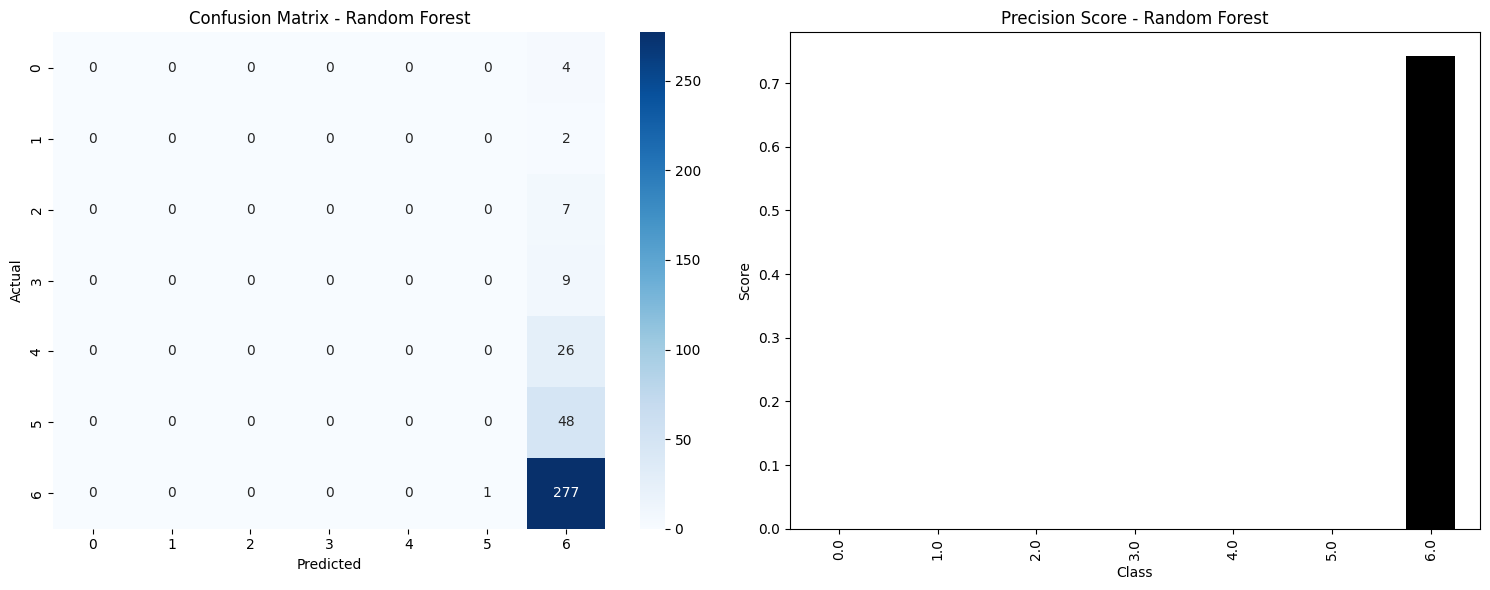

Accuracy: 0.74
Mean Squared Error (MSE): 1.44
Execution Time: 0.76 seconds


Evaluating Hierarchical Gradient Boosting


Accuracy: 0.72
Mean Squared Error (MSE): 1.49
Execution Time: 4.94 seconds


Evaluating CatBoost


Accuracy: 0.72
Mean Squared Error (MSE): 1.44
Execution Time: 4.51 seconds


Evaluating XGBoost


Accuracy: 0.73
Mean Squared Error (MSE): 1.44
Execution Time: 0.74 seconds


-------------------------------------------------------------------- Choc --------------------------------------------------------------------


Evaluating Random Forest


Accuracy: 0.41
Mean Squared Error (MSE): 1.33
Execution Time: 0.60 seconds


Evaluating Hierarchical Gradient Boosting


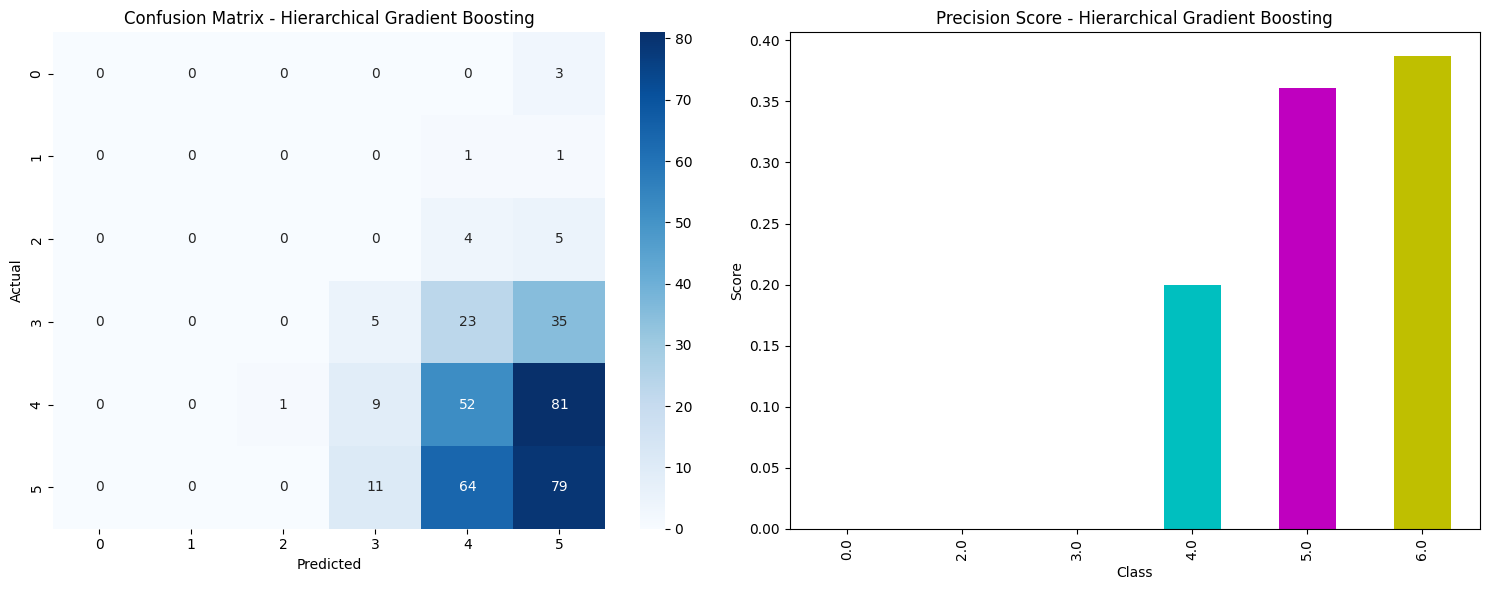

Accuracy: 0.36
Mean Squared Error (MSE): 1.49
Execution Time: 4.00 seconds


Evaluating CatBoost


Accuracy: 0.37
Mean Squared Error (MSE): 1.42
Execution Time: 4.79 seconds


Evaluating XGBoost


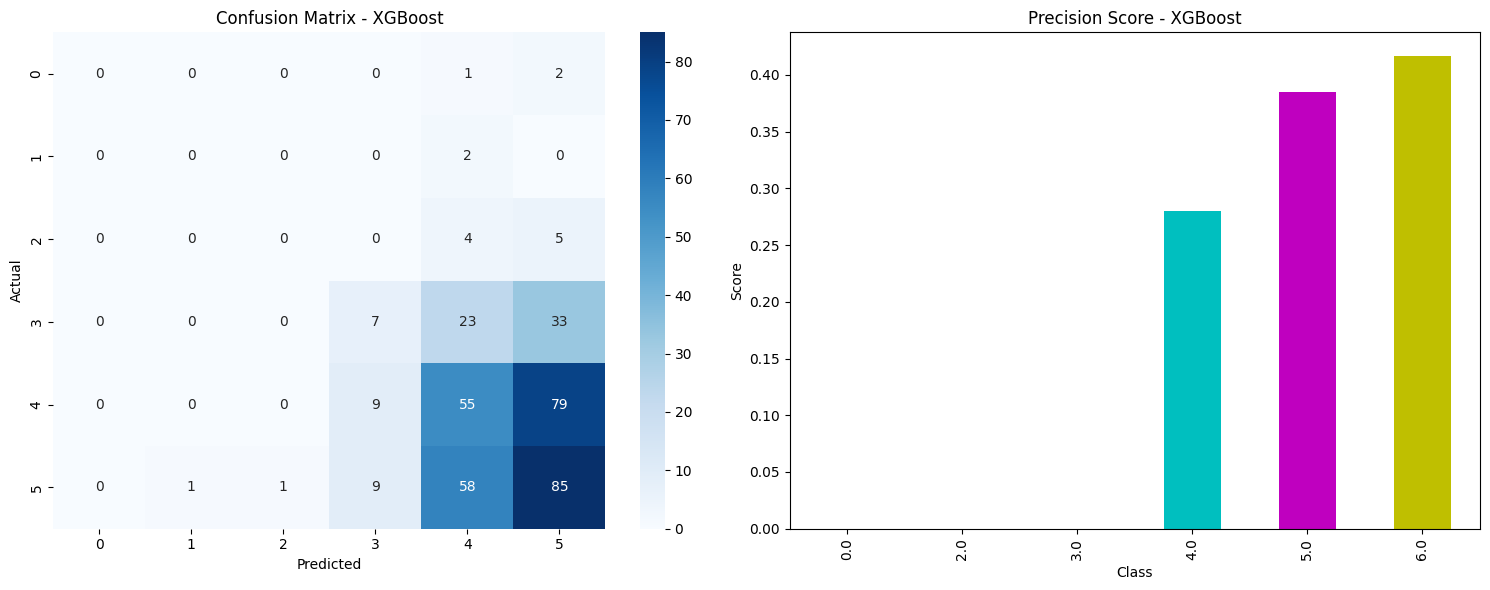

Accuracy: 0.39
Mean Squared Error (MSE): 1.44
Execution Time: 1.21 seconds




In [40]:
for target in new_target_columns:
    cut_dataset = dataset.copy()
    cut_dataset = cut_dataset.iloc[:, :37]
    cut_dataset[target] = dataset[target]
    run_evals(cut_dataset, target, models=new_best_models)